# Import



In [ ]:
%pip install geopandas
%pip install contextily

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 51.0 MB/s 
     |████████████████████████████████| 16.7 MB 409 kB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import geopandas as gpd
import descartes
import contextily as ctx


pd.options.mode.chained_assignment = None  # default='warn'
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + "horizons-drishti"

#root_dir = "/content/gdrive/My Drive/"
#base_dir = root_dir + "UCLA/other/horizons-drishti" ## change this directory

In [ ]:
def concat_dataframes(start_number, stop_number, phase):

    df = pd.DataFrame()

    for i in range(start_number, stop_number+1):

        week_number = i

        if i < 10:
            week_number = f"0{i}"

        if  i >= 22:
            file_name = f"{base_dir}/Data/pulse2021_puf_{week_number}.csv"
        else:
          file_name = f"{base_dir}/Data/pulse2020_puf_{week_number}.csv"

        week = pd.read_csv(file_name)

        week["week_number"] = i
        week["phase"] = phase


        df = df.append(week, ignore_index=True)

    return df

In [ ]:
phase1 = concat_dataframes(1, 12, "phase1")
phase2 = concat_dataframes(13, 17, "phase2")
phase3 = concat_dataframes(18, 27, "phase3")
phase3_1 = concat_dataframes(28, 33, "phase3.1")
phase3_2 = concat_dataframes(34, 39, "phase3.2")

In [ ]:
phase1["race_recoded"] = np.where(phase1["RHISPANIC"] == 2, 5, phase1["RRACE"])

In [ ]:
phase1["anxiety_binary"] = np.where(phase1["ANXIOUS"].isin([1, 2]), "low anxiety", "high anxiety")

In [ ]:
phase1["anxiety_ternary"] = np.where(phase1["ANXIOUS"] == 1, "low anxiety",
                                     np.where(phase1["ANXIOUS"].isin([2, 3]), "medium anxiety", "high anxiety"))

In [ ]:
phase1["anxiety_ternary"]

0            high anxiety
1          medium anxiety
2             low anxiety
3            high anxiety
4          medium anxiety
                ...      
1088309       low anxiety
1088310      high anxiety
1088311      high anxiety
1088312    medium anxiety
1088313    medium anxiety
Name: anxiety_ternary, Length: 1088314, dtype: object

In [ ]:
first_phases=pd.concat([phase1, phase2])

In [ ]:
first_phases

SCRAM  WEEK  ...  PSWHYCHG8  PSWHYCHG9
0       V010000001S10011099370111     1  ...        NaN        NaN
1       V010000001S10011900470112     1  ...        NaN        NaN
2       V010000001S18010744940111     1  ...        NaN        NaN
3       V010000001S37010301340112     1  ...        NaN        NaN
4       V010000001S37010480340111     1  ...        NaN        NaN
...                           ...   ...  ...        ...        ...
502687  V179950006S70560353800021    17  ...      -88.0      -88.0
502688  V179950006S73560433600011    17  ...      -88.0      -88.0
502689  V179950006S73560595210021    17  ...      -88.0      -88.0
502690  V179950006S91560161900021    17  ...      -88.0      -88.0
502691  V179950006S92560685110011    17  ...      -88.0      -88.0

[1591006 rows x 207 columns]

In [ ]:
#pd.concat(phase1[ (list of columns to keep) ], phase2[ (list of columns to keep) ])

In [ ]:
all_phases=pd.concat([phase1[["EGENDER", "RRACE"]], phase2[["EGENDER", "RRACE"]]], ignore_index=True, axis=0)


In [ ]:
all_phases

EGENDER  RRACE
0              2      1
1              1      1
2              2      4
3              1      1
4              2      1
...          ...    ...
1591001        1      1
1591002        2      1
1591003        1      1
1591004        1      1
1591005        2      1

[1591006 rows x 2 columns]

In [ ]:
all_phases=pd.concat([phase1, phase2, phase3, phase3_1, phase3_2])

In [ ]:
phase1


NameError: ignored

In [ ]:
df1.loc[0]

SCRAM       V010000001S10011099370111
WEEK                                1
EST_ST                             47
EST_MSA                           NaN
PWEIGHT                       1973.49
                      ...            
INTRNT2                             1
INTRNT3                           -99
TSCHLHRS                            2
TTCH_HRS                            4
INCOME                              4
Name: 0, Length: 82, dtype: object

# Phases Info

Phase 1

In [ ]:
df2 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_02.csv")
df3 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_03.csv")
df4 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_04.csv")
df5 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_05.csv")
df6 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_06.csv")
df7 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_07.csv")
df8 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_08.csv")
df9 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_09.csv")
df10 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_10.csv")
df11 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_11.csv")
df12 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_12.csv")

NameError: ignored

Phase 2

In [ ]:
df13 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_13.csv")
df14 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_14.csv")
df15 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_15.csv")
df16 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_16.csv")
df17 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_17.csv")

NameError: ignored

Phase 3

In [ ]:
df18 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_18.csv")
df19 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_19.csv")
df20 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_20.csv")
df21 = pd.read_csv(f"{base_dir}/Data/pulse2020_puf_21.csv")
df22 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_22.csv")
df23 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_23.csv")
df24 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_24.csv")
df25 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_25.csv")
df26 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_26.csv")
df27 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_27.csv")

Phase 3.1

In [ ]:
df28 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_28.csv")
df29 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_29.csv")
df30 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_30.csv")
df31 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_31.csv")
df32 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_32.csv")
df33 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_33.csv")

Phase 3.2

In [ ]:
len(list(df1))

In [ ]:
df34 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_34.csv")
df35 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_35.csv")
df36 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_36.csv")
df37 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_37.csv")
df38 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_38.csv")
df39 = pd.read_csv(f"{base_dir}/Data/pulse2021_puf_39.csv")

In [ ]:
sns.histplot(x="TBIRTH_YEAR", data=df1, bins=100, color="magenta")
plt.xlabel("birth year")
plt.ylabel("number of respondents")
plt.show()

sns.histplot(x="TBIRTH_YEAR", data=df2, bins=100, color="green")
plt.xlabel("birth year")
plt.ylabel("number of respondents")
plt.show()

In [ ]:
sns.histplot(x="EST_ST", data=df1, bins=100, color="magenta")
plt.xlabel("state")
plt.ylabel("number of respondents")
plt.show()

sns.histplot(x="EST_ST", data=df39, bins=100, color="green")
plt.xlabel("state")
plt.ylabel("number of respondents")
plt.show()

# Demographic Analysis

In [ ]:
phase1_id_count = phase1.groupby("EST_ST")["SCRAM"].nunique().reset_index()

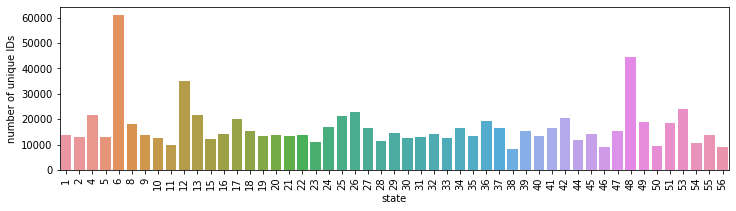

In [ ]:
plt.figure(figsize=(12, 3))
sns.barplot(x="EST_ST", y="SCRAM", data=phase1_id_count)
plt.xticks(rotation=90)
plt.xlabel("state")
plt.ylabel("number of unique IDs")
# plt.tight_layout()
plt.show()

In [ ]:
phase1_id_count

EST_ST  SCRAM
0        1  13744
1        2  13072
2        4  21598
3        5  13001
4        6  61139
5        8  18291
6        9  13986
7       10  12760
8       11   9722
9       12  35010
10      13  21514
11      15  12211
12      16  14133
13      17  20024
14      18  15219
15      19  13385
16      20  13826
17      21  13290
18      22  13730
19      23  11224
20      24  17033
21      25  21242
22      26  22824
23      27  16389
24      28  11428
25      29  14700
26      30  12642
27      31  13146
28      32  14037
29      33  12811
30      34  16370
31      35  13336
32      36  19452
33      37  16524
34      38   8182
35      39  15200
36      40  13292
37      41  16513
38      42  20508
39      44  11881
40      45  14002
41      46   8961
42      47  15269
43      48  44630
44      49  18734
45      50   9272
46      51  18523
47      53  24223
48      54  10616
49      55  13991
50      56   8915

In [ ]:

test = phase1[phase1["EST_ST"] == 1].head(n=100)


In [ ]:
test["EGENDER"]

1       1
3       1
4       2
5       2
6       2
       ..
6941    2
7341    2
7342    2
7343    2
7344    1
Name: EGENDER, Length: 100, dtype: int64

In [ ]:
def get_proportion(values, nums):
    proportions = values.value_counts(normalize=True).reset_index()
    proportions.columns = ["sex", "proportions"]
    prop2 = proportions[proportions["sex"] == nums]["proportions"].values[0]

    return prop2

In [ ]:
prop_2_df = phase1.groupby("EST_ST")["EGENDER"].apply(get_proportion, nums=2).reset_index()

In [ ]:
prop_2_df.columns = ["state", "proportion = 2"]

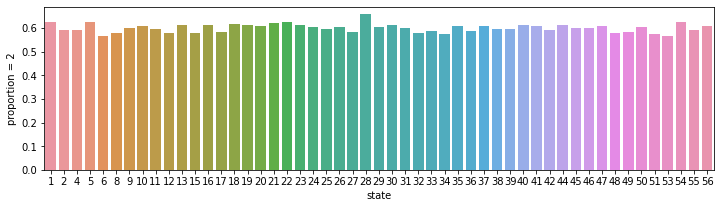

In [ ]:
plt.figure(figsize=(12, 3))
sns.barplot(x="state", y="proportion = 2", data=prop_2_df)

In [ ]:
def get_proportions(values):
    proportions = values.value_counts(normalize=True).reset_index()
    proportions.columns = ["sex", "proportions"]
    # print(proportions)

    prop2 = proportions[proportions["sex"] == 2]["proportions"].values[0]
    # print(proportions[proportions["sex"] == 2]["proportions"].values[0])
    # print(prop2.value)
    # print()

    return prop2

In [ ]:
prop_2_df = phase1.groupby(["EST_ST", "RRACE"])["EGENDER"].apply(get_proportion).reset_index()

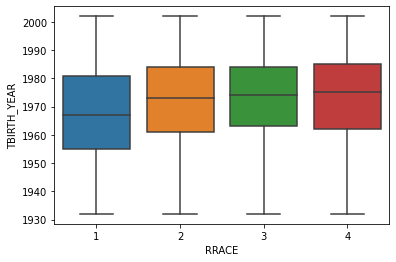

In [ ]:
sns.boxplot(x="RRACE", y="TBIRTH_YEAR", data=phase1)

In [ ]:
phase1.groupby(["EST_ST", "RRACE", "EGENDER"])["TBIRTH_YEAR"].mean().reset_index()

EST_ST  RRACE  EGENDER  TBIRTH_YEAR
0         1      1        1  1965.910721
1         1      1        2  1968.208790
2         1      2        1  1972.845519
3         1      2        2  1974.187446
4         1      3        1  1977.193103
..      ...    ...      ...          ...
403      56      2        2  1973.378378
404      56      3        1  1967.564103
405      56      3        2  1974.844444
406      56      4        1  1968.358852
407      56      4        2  1971.080153

[408 rows x 4 columns]

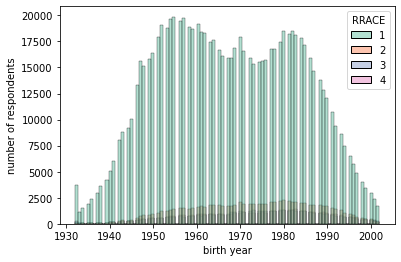

In [ ]:
sns.histplot(x="TBIRTH_YEAR", hue="RRACE",  data=phase1, bins=100, palette=sns.color_palette("Set2", phase1["RRACE"].nunique()))
plt.xlabel("birth year")
plt.ylabel("number of respondents")
plt.show()

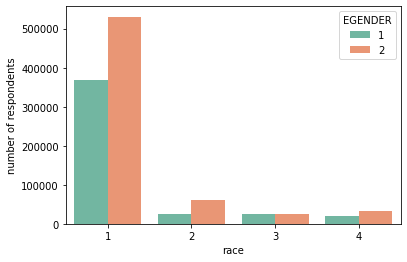

In [ ]:
sns.countplot(x="RRACE", hue="EGENDER",  data=phase1, palette=sns.color_palette("Set2", phase1["EGENDER"].nunique()))
plt.xlabel("race")
plt.ylabel("number of respondents")
plt.show()

In [ ]:
phase1[phase1["EST_ST"] == 1]

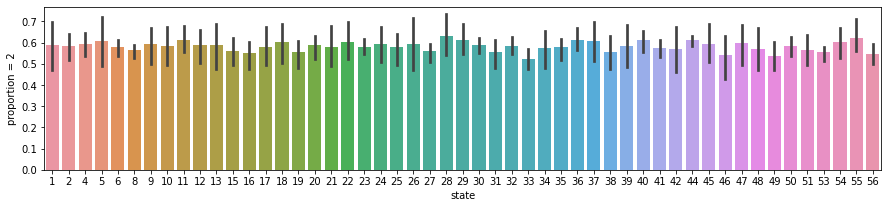

In [ ]:
prop_r2_df = phase1.groupby(["EST_ST", "RRACE"])["EGENDER"].apply(get_proportion).reset_index()
prop_r2_df.columns = ["state", "race", "proportion = 2"]
plt.figure(figsize=(15, 3))
sns.barplot(x="state", y="proportion = 2", data=prop_r2_df)

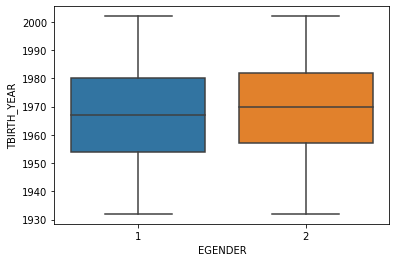

In [ ]:
sns.boxplot(x="EGENDER", y="TBIRTH_YEAR", data=phase1)

In [ ]:
prop_hispanic_df = phase1.groupby("EST_ST")["RHISPANIC"].apply(get_proportion).reset_index()

In [ ]:
prop_hispanic_df.columns = ["state", "proportion = 2"]

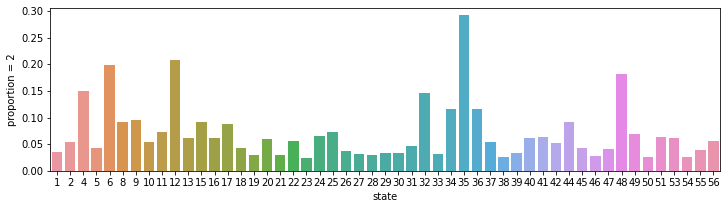

In [ ]:
plt.figure(figsize=(12, 3))
sns.barplot(x="state", y="proportion = 2", data=prop_hispanic_df)

In [ ]:
phase1.groupby(["EST_ST", "RRACE", "EGENDER"])["ANXIOUS"].mean().reset_index()

EST_ST  RRACE  EGENDER    ANXIOUS
0         1      1        1  -6.268801
1         1      1        2  -6.743312
2         1      2        1 -11.290094
3         1      2        2 -10.300000
4         1      3        1  -6.855172
..      ...    ...      ...        ...
403      56      2        2 -12.270270
404      56      3        1  -7.384615
405      56      3        2 -10.022222
406      56      4        1 -11.612440
407      56      4        2  -3.942748

[408 rows x 4 columns]

In [ ]:
df = phase1[~phase1["ANXIOUS"].isin([-99, -88])]
df.groupby(["EST_ST", "RRACE", "EGENDER"])["ANXIOUS"].median().reset_index()

EST_ST  RRACE  EGENDER  ANXIOUS
0         1      1        1      1.0
1         1      1        2      2.0
2         1      2        1      2.0
3         1      2        2      2.0
4         1      3        1      2.0
..      ...    ...      ...      ...
403      56      2        2      2.0
404      56      3        1      2.0
405      56      3        2      2.0
406      56      4        1      2.0
407      56      4        2      2.0

[408 rows x 4 columns]

In [ ]:
prop_hispanicS_df = phase1.groupby("TBIRTH_YEAR")["RHISPANIC"].apply(get_proportion).reset_index()
prop_hispanicS_df.columns = ["year", "proportion = 2"]

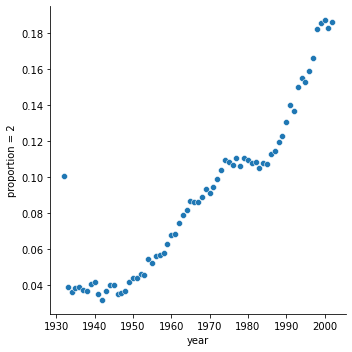

In [ ]:
sns.relplot(x="year", y="proportion = 2", data=prop_hispanicS_df);

In [ ]:
prop_hispanicS_df = phase1.groupby("TBIRTH_YEAR")["race_recoded"].apply(get_proportion).reset_index()


In [ ]:
prop_sex = phase1.groupby("TBIRTH_YEAR")["EGENDER"].apply(get_proportions).reset_index()
prop_sex.columns = ["year", "proportion = 2"]
prop_sex_male=phase1.groupby("TBIRTH_YEAR")["EGENDER"].apply(get_proportion, nums=1).reset_index()
prop_sex_male.columns = ["year", "proportion = 1"]

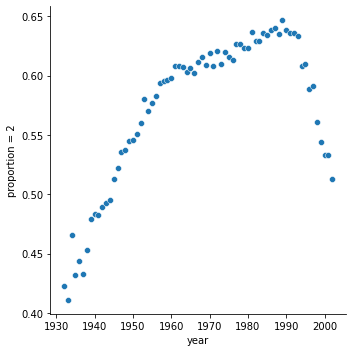

In [ ]:
sns.relplot(x="year", y="proportion = 2", data=prop_sex);

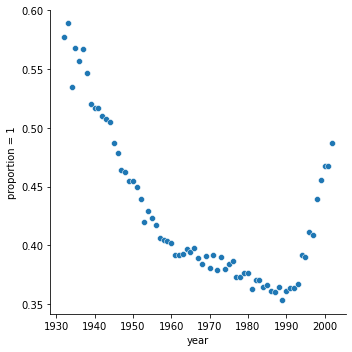

In [ ]:
sns.relplot(x="year", y="proportion = 1", data=prop_sex_male);

In [ ]:
phase1_mean_age=phase1.groupby("EST_ST")["TBIRTH_YEAR"].mean().reset_index()
phase1_mean_age.columns = ["state", "mean age"]

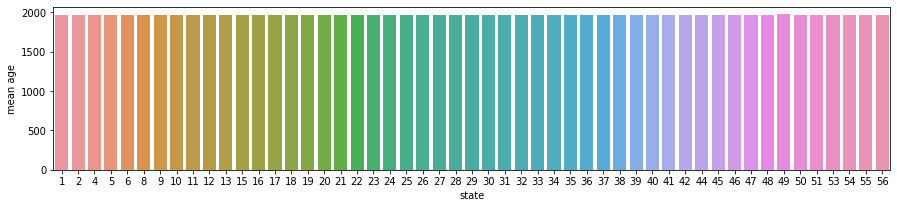

In [ ]:
plt.figure(figsize=(15, 3))
sns.barplot(x="state", y="mean age", data=phase1_mean_age)

In [ ]:
phase1_mean_age

state     mean age
0       1  1968.806474
1       2  1970.434785
2       4  1966.721842
3       5  1968.793651
4       6  1969.058989
5       8  1969.338940
6       9  1967.925210
7      10  1965.598472
8      11  1970.452667
9      12  1965.479561
10     13  1969.209111
11     15  1965.142424
12     16  1968.678880
13     17  1969.943305
14     18  1969.634382
15     19  1967.927393
16     20  1969.579511
17     21  1968.453989
18     22  1968.955062
19     23  1966.158773
20     24  1968.322609
21     25  1968.464768
22     26  1967.888236
23     27  1969.774821
24     28  1969.144940
25     29  1968.698188
26     30  1967.304443
27     31  1969.107418
28     32  1967.691891
29     33  1965.793313
30     34  1968.093010
31     35  1965.780270
32     36  1970.241399
33     37  1968.447869
34     38  1968.933340
35     39  1968.859705
36     40  1968.785970
37     41  1968.708001
38     42  1968.280067
39     44  1967.170171
40     45  1966.994456
41     46  1968.736616
42     47  1969.506636
43     48  1969.675996
44     49  1971.899331
45     50  1966.059990
46     51  1968.582586
47     53  1968.872535
48     54  1967.967548
49     55  1968.944642
50     56  1967.357833

In [ ]:
phase1_med_age=phase1.groupby("EST_ST")["TBIRTH_YEAR"].median().reset_index()
phase1_med_age.columns = ["state", "median age"]

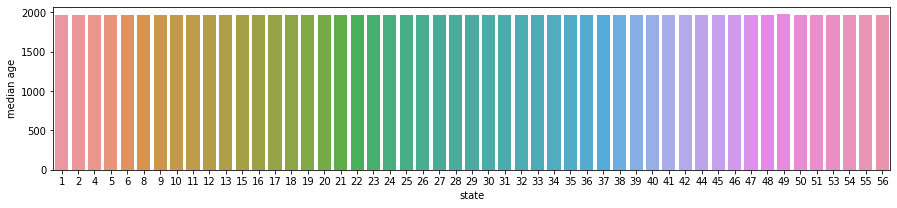

In [ ]:
plt.figure(figsize=(15, 3))
sns.barplot(x="state", y="median age", data=phase1_med_age)

In [ ]:
def race_proportions (phase, var_num):
  prop_temp=pd.DataFrame()
  prop_temp=phase.groupby("EST_ST")["race_recoded"].apply(get_proportion, nums=var_num).reset_index()
  return prop_temp

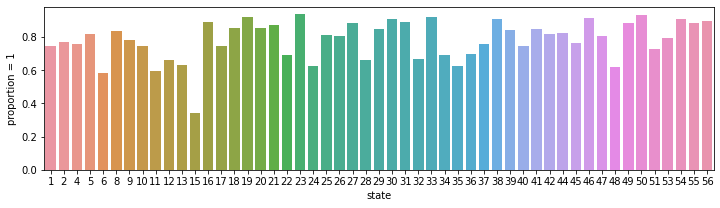

In [ ]:
prop_race1=phase1.groupby("EST_ST")["race_recoded"].apply(get_proportion, nums=1).reset_index()
prop_race1.columns=["state","proportion = 1"]
plt.figure(figsize=(12, 3))
sns.barplot(x="state", y="proportion = 1", data=prop_race1)

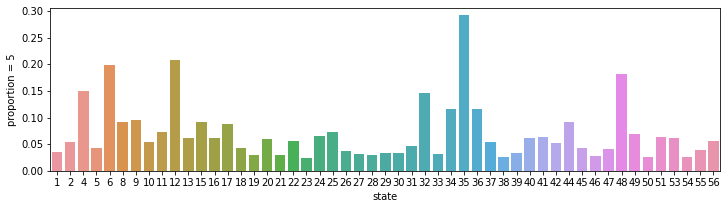

In [ ]:
prop_race5 = race_proportions(phase1, 5)
prop_race5.columns=["state","proportion = 5"]
plt.figure(figsize=(12, 3))
sns.barplot(x="state", y="proportion = 5", data=prop_race5)

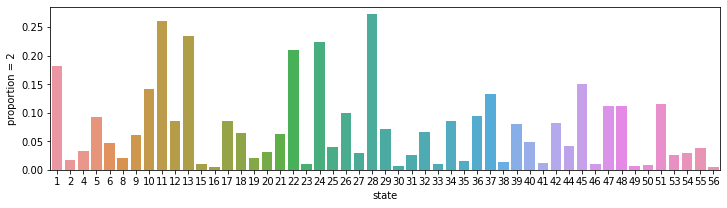

In [ ]:
prop_race2 = race_proportions(phase1, 2)
prop_race2.columns=["state","proportion = 2"]
plt.figure(figsize=(12, 3))
sns.barplot(x="state", y="proportion = 2", data=prop_race2)

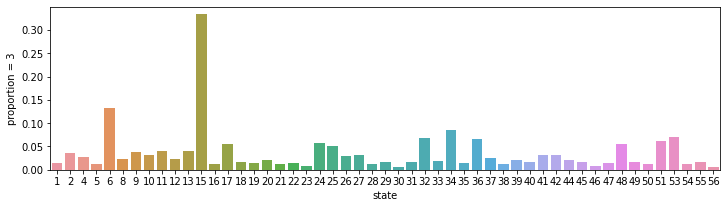

In [ ]:
prop_race3 = race_proportions(phase1, 3)
prop_race3.columns=["state","proportion = 3"]
plt.figure(figsize=(12, 3))
sns.barplot(x="state", y="proportion = 3", data=prop_race3)

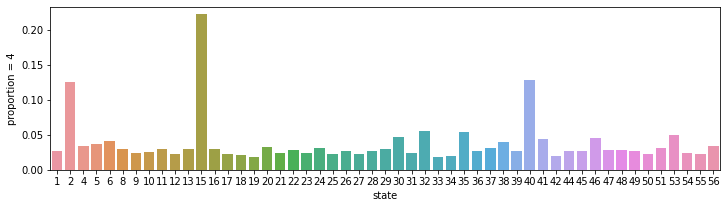

In [ ]:
prop_race4 = race_proportions(phase1, 4)
prop_race4.columns=["state","proportion = 4"]
plt.figure(figsize=(12, 3))
sns.barplot(x="state", y="proportion = 4", data=prop_race4)

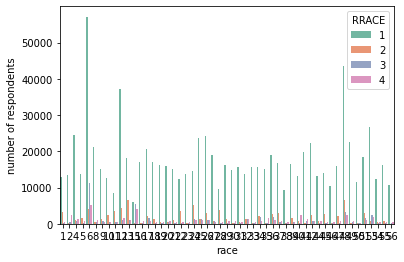

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

In [ ]:
sns.countplot(x="EST_ST", hue="RRACE",  data=phase1, palette=sns.color_palette("Set2", phase1["RRACE"].nunique()))
plt.xlabel("race")
plt.ylabel("number of respondents")
plt.show()

In [ ]:
def race_proportionsbyyear (phase, var_num):
  prop_temp=pd.DataFrame()
  prop_temp=phase.groupby("TBIRTH_YEAR")["race_recoded"].apply(get_proportion, nums=var_num).reset_index()
  return prop_temp

<Figure size 864x216 with 0 Axes>

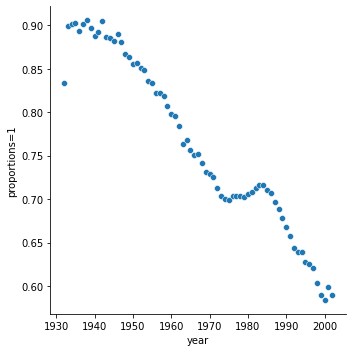

In [ ]:
prop_agerace1=race_proportionsbyyear(phase1, 1)
prop_agerace1.columns=["year","proportions=1"]
plt.figure(figsize=(12, 3))
sns.relplot(x="year", y="proportions=1", data=prop_agerace1)

<Figure size 864x216 with 0 Axes>

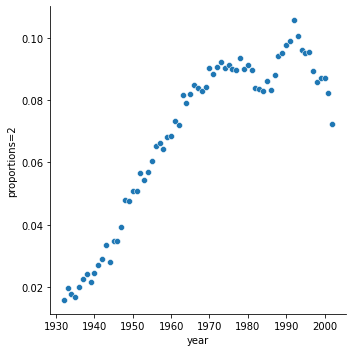

In [ ]:
prop_agerace2=race_proportionsbyyear(phase1, 2)
prop_agerace2.columns=["year","proportions=2"]
plt.figure(figsize=(12, 3))
sns.relplot(x="year", y="proportions=2", data=prop_agerace2)

<Figure size 864x216 with 0 Axes>

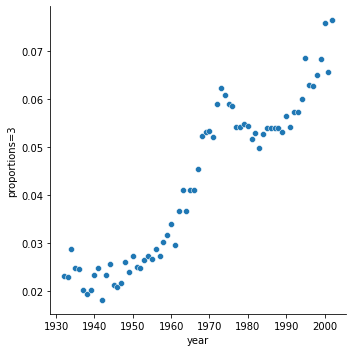

In [ ]:
prop_agerace3=race_proportionsbyyear(phase1, 3)
prop_agerace3.columns=["year","proportions=3"]
plt.figure(figsize=(12, 3))
sns.relplot(x="year", y="proportions=3", data=prop_agerace3)

<Figure size 864x216 with 0 Axes>

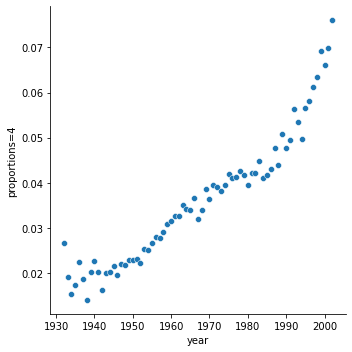

In [ ]:
prop_agerace4=race_proportionsbyyear(phase1, 4)
prop_agerace4.columns=["year","proportions=4"]
plt.figure(figsize=(12, 3))
sns.relplot(x="year", y="proportions=4", data=prop_agerace4)

<Figure size 864x216 with 0 Axes>

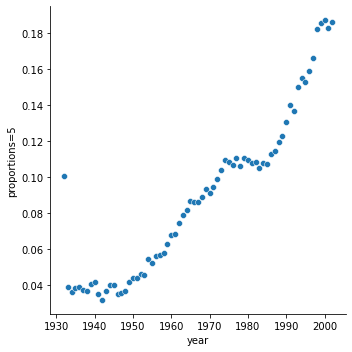

In [ ]:
prop_agerace5=race_proportionsbyyear(phase1, 5)
prop_agerace5.columns=["year","proportions=5"]
plt.figure(figsize=(12, 3))
sns.relplot(x="year", y="proportions=5", data=prop_agerace5)

# Anxiety

In [ ]:
phase1_cleaned=phase1[~phase1["ANXIOUS"].isin([-99, -88])]
prop_anxiety_sex2 = phase1_cleaned.groupby("ANXIOUS")["EGENDER"].apply(get_proportion, nums=2).reset_index()
prop_anxiety_sex2["name"]="female"
prop_anxiety_sex2

ANXIOUS   EGENDER    name
0        1  0.491572  female
1        2  0.633877  female
2        3  0.655465  female
3        4  0.681124  female

In [ ]:
prop_anxiety_sex1 = phase1_cleaned.groupby("ANXIOUS")["EGENDER"].apply(get_proportion, nums=1).reset_index()
prop_anxiety_sex1["name"]="male"
prop_anxiety_sex1

ANXIOUS   EGENDER  name
0        1  0.508428  male
1        2  0.366123  male
2        3  0.344535  male
3        4  0.318876  male

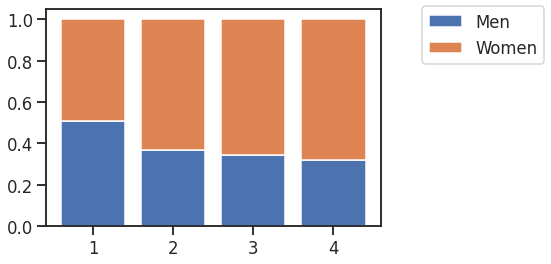

In [ ]:
plt.bar(prop_anxiety_sex1['ANXIOUS'], prop_anxiety_sex1['EGENDER'], label='Men')
plt.bar(prop_anxiety_sex2['ANXIOUS'], prop_anxiety_sex2['EGENDER'], bottom=prop_anxiety_sex1['EGENDER'], label='Women')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
females = phase1_cleaned[phase1_cleaned["EGENDER"] == 2]["ANXIOUS"].values
males = phase1_cleaned[phase1_cleaned["EGENDER"] == 1]["ANXIOUS"].values

In [ ]:
stats.ttest_ind(females, males)

Ttest_indResult(statistic=139.84664360513858, pvalue=0.0)

In [ ]:
phase1_cleaned=phase1[~phase1["ANXIOUS"].isin([-99, -88])]
phase1_cleaned["anxiety_ternary"] = np.where(phase1_cleaned["ANXIOUS"] == 1, "low anxiety",
                                     np.where(phase1_cleaned["ANXIOUS"].isin([2, 3]), "medium anxiety", "high anxiety"))

In [ ]:
prop_anxiety_sex2 = phase1_cleaned.groupby("anxiety_ternary")["EGENDER"].apply(get_proportion, nums=2).reset_index()
prop_anxiety_sex2["name"]="female"
prop_anxiety_sex2

anxiety_ternary   EGENDER    name
0    high anxiety  0.681124  female
1     low anxiety  0.491572  female
2  medium anxiety  0.639701  female

In [ ]:
prop_anxiety_sex1 = phase1_cleaned.groupby("anxiety_ternary")["EGENDER"].apply(get_proportion, nums=1).reset_index()
prop_anxiety_sex1["name"]="male"
prop_anxiety_sex1

anxiety_ternary   EGENDER  name
0    high anxiety  0.318876  male
1     low anxiety  0.508428  male
2  medium anxiety  0.360299  male

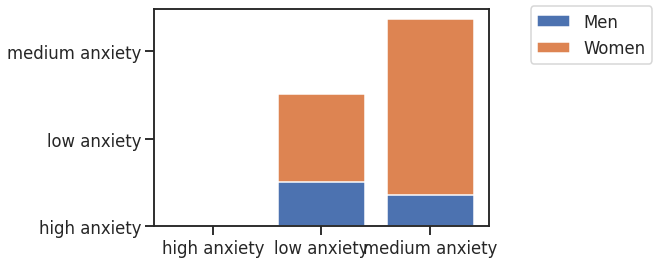

In [ ]:
plt.bar(prop_anxiety_sex1['anxiety_ternary'], prop_anxiety_sex1['anxiety_ternary'], label='Men')
plt.bar(prop_anxiety_sex2['anxiety_ternary'], prop_anxiety_sex2['anxiety_ternary'], bottom=prop_anxiety_sex1['EGENDER'], label='Women')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
phase1_cleaned=phase1[~phase1["DOWN"].isin([-99, -88])]
prop_depression_sex2 = phase1_cleaned.groupby("DOWN")["EGENDER"].apply(get_proportion, nums=2).reset_index()
prop_depression_sex2["name"]="female"
prop_depression_sex2

DOWN   EGENDER    name
0     1  0.546870  female
1     2  0.637484  female
2     3  0.650255  female
3     4  0.652645  female

In [ ]:
prop_depression_sex1 = phase1_cleaned.groupby("DOWN")["EGENDER"].apply(get_proportion, nums=1).reset_index()
prop_depression_sex1["name"]="male"
prop_depression_sex1

DOWN   EGENDER  name
0     1  0.453130  male
1     2  0.362516  male
2     3  0.349745  male
3     4  0.347355  male

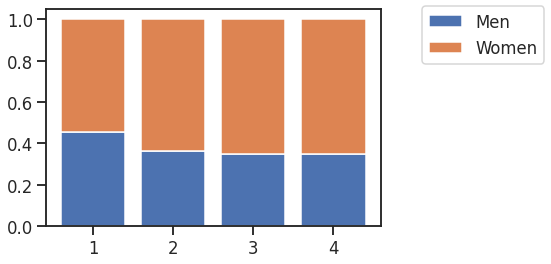

In [ ]:
plt.bar(prop_depression_sex1['DOWN'], prop_depression_sex1['EGENDER'], label='Men')
plt.bar(prop_depression_sex2['DOWN'], prop_depression_sex2['EGENDER'], bottom=prop_depression_sex1['EGENDER'], label='Women')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
phase1_cleaned_dep=phase1[~phase1["DOWN"].isin([-99, -88])]
females_dep = phase1_cleaned_dep[phase1_cleaned_dep["EGENDER"] == 2]["DOWN"].values
males_dep = phase1_cleaned_dep[phase1_cleaned_dep["EGENDER"] == 1]["DOWN"].values
stats.ttest_ind(females_dep, males_dep)

Ttest_indResult(statistic=84.68322181961771, pvalue=0.0)

In [ ]:
phase1_cleaned_dep=phase1[~phase1["DOWN"].isin([-99, -88])]
race1d=phase1_cleaned_dep[phase1_cleaned_dep["race_recoded"]==1]["DOWN"].values
race2d=phase1_cleaned_dep[phase1_cleaned_dep["race_recoded"]==2]["DOWN"].values
race3d=phase1_cleaned_dep[phase1_cleaned_dep["race_recoded"]==3]["DOWN"].values
race4d=phase1_cleaned_dep[phase1_cleaned_dep["race_recoded"]==4]["DOWN"].values
race5d=phase1_cleaned_dep[phase1_cleaned_dep["race_recoded"]==5]["DOWN"].values

In [ ]:
stats.f_oneway(race1d,race2d,race3d,race4d,race5d)

F_onewayResult(statistic=1301.344840182766, pvalue=0.0)

In [ ]:
phase1_cleaned_dep["dep_binary"] = np.where(phase1_cleaned_dep["DOWN"].isin([1, 2]), 1, 2)
prop_dep_high = phase1_cleaned_dep.groupby("race_recoded")["dep_binary"].apply(get_proportion, nums=2).reset_index()
prop_dep_high["name"]="high"
prop_dep_low = phase1_cleaned_dep.groupby("race_recoded")["dep_binary"].apply(get_proportion, nums=1).reset_index()
prop_dep_low["name"]="low"
prop_dep_low

race_recoded  dep_binary name
0             1    0.836240  low
1             2    0.789209  low
2             3    0.843204  low
3             4    0.755246  low
4             5    0.774755  low

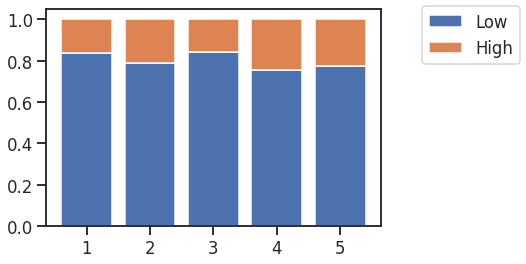

In [ ]:
plt.bar(prop_dep_low['race_recoded'], prop_dep_low['dep_binary'], label='Low')
plt.bar(prop_dep_high['race_recoded'], prop_dep_high['dep_binary'], bottom=prop_dep_low['dep_binary'], label='High')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
model = ols('DOWN ~ C(race_recoded) + C(EGENDER) + C(race_recoded):C(EGENDER)', data=phase1_cleaned_dep).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq        df            F        PR(>F)
C(race_recoded)               4147.990392       4.0  1198.431781  0.000000e+00
C(EGENDER)                    5848.409236       1.0  6758.857986  0.000000e+00
C(race_recoded):C(EGENDER)      46.451568       4.0    13.420724  6.136090e-11
Residual                    857660.108373  991176.0          NaN           NaN

In [ ]:
phase1_cleaned=phase1[~phase1["WORRY"].isin([-99, -88])]
prop_worry_sex2 = phase1_cleaned.groupby("WORRY")["EGENDER"].apply(get_proportion, nums=2).reset_index()
prop_worry_sex2["name"]="female"
prop_worry_sex2
prop_worry_sex1 = phase1_cleaned.groupby("WORRY")["EGENDER"].apply(get_proportion, nums=1).reset_index()
prop_worry_sex1["name"]="male"
prop_worry_sex1

WORRY   EGENDER  name
0      1  0.483338  male
1      2  0.351824  male
2      3  0.326847  male
3      4  0.313143  male

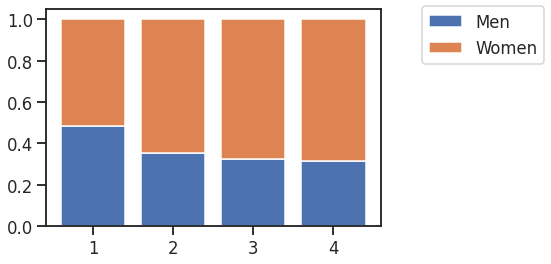

In [ ]:
plt.bar(prop_worry_sex1['WORRY'], prop_worry_sex1['EGENDER'], label='Men')
plt.bar(prop_worry_sex2['WORRY'], prop_worry_sex2['EGENDER'], bottom=prop_worry_sex1['EGENDER'], label='Women')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
phase1_cleaned_worry=phase1[~phase1["WORRY"].isin([-99, -88])]
females_worry = phase1_cleaned_worry[phase1_cleaned_worry["EGENDER"] == 2]["WORRY"].values
males_worry = phase1_cleaned_worry[phase1_cleaned_worry["EGENDER"] == 1]["WORRY"].values
stats.ttest_ind(females_worry, males_worry)

Ttest_indResult(statistic=133.14735321074443, pvalue=0.0)

In [ ]:
phase1_cleaned=phase1[~phase1["INTEREST"].isin([-99, -88])]
prop_interest_sex2 = phase1_cleaned.groupby("INTEREST")["EGENDER"].apply(get_proportion, nums=2).reset_index()
prop_interest_sex2["name"]="female"
prop_interest_sex2
prop_interest_sex1 = phase1_cleaned.groupby("INTEREST")["EGENDER"].apply(get_proportion, nums=1).reset_index()
prop_interest_sex1["name"]="male"
prop_interest_sex1

In [ ]:
plt.bar(prop_interest_sex1['INTEREST'], prop_interest_sex1['EGENDER'], label='Men')
plt.bar(prop_interest_sex2['INTEREST'], prop_interest_sex2['EGENDER'], bottom=prop_interest_sex1['EGENDER'], label='Women')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
phase1_cleaned_int=phase1[~phase1["INTEREST"].isin([-99, -88])]
females_int = phase1_cleaned_int[phase1_cleaned_int["EGENDER"] == 2]["INTEREST"].values
males_int = phase1_cleaned_int[phase1_cleaned_int["EGENDER"] == 1]["INTEREST"].values
stats.ttest_ind(females_int, males_int)

In [ ]:
phase1_cleaned_anxiety=phase1[~phase1["ANXIOUS"].isin([-99, -88])]
phase1_cleaned_anxiety["anxiety_binary"] = np.where(phase1_cleaned_anxiety["ANXIOUS"].isin([1, 2]), 1, 2)

In [ ]:
prop_anxiety_high = phase1_cleaned_anxiety.groupby("race_recoded")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
prop_anxiety_high["name"]="high"
prop_anxiety_low = phase1_cleaned_anxiety.groupby("race_recoded")["anxiety_binary"].apply(get_proportion, nums=1).reset_index()
prop_anxiety_low["name"]="low"
prop_anxiety_low

race_recoded  anxiety_binary name
0             1        0.718842  low
1             2        0.692208  low
2             3        0.768159  low
3             4        0.629113  low
4             5        0.652024  low

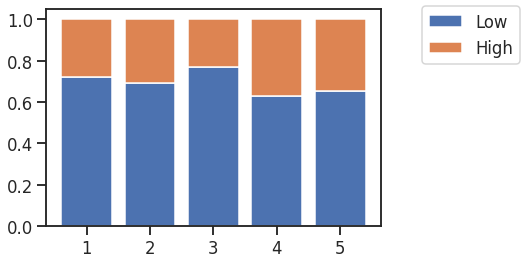

In [ ]:
plt.bar(prop_anxiety_low['race_recoded'], prop_anxiety_low['anxiety_binary'], label='Low')
plt.bar(prop_anxiety_high['race_recoded'], prop_anxiety_high['anxiety_binary'], bottom=prop_anxiety_low['anxiety_binary'], label='High')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
race1=phase1_cleaned_anxiety[phase1_cleaned_anxiety["race_recoded"]==1]["ANXIOUS"].values
race2=phase1_cleaned_anxiety[phase1_cleaned_anxiety["race_recoded"]==2]["ANXIOUS"].values
race3=phase1_cleaned_anxiety[phase1_cleaned_anxiety["race_recoded"]==3]["ANXIOUS"].values
race4=phase1_cleaned_anxiety[phase1_cleaned_anxiety["race_recoded"]==4]["ANXIOUS"].values
race5=phase1_cleaned_anxiety[phase1_cleaned_anxiety["race_recoded"]==5]["ANXIOUS"].values

In [ ]:
stats.f_oneway(race1,race2,race3,race4,race5)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('ANXIOUS ~ C(race_recoded) + C(EGENDER) + C(race_recoded):C(EGENDER)', data=phase1_cleaned_anxiety).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq        df             F        PR(>F)
C(race_recoded)             4.344507e+03       4.0   1001.779271  0.000000e+00
C(EGENDER)                  2.061559e+04       1.0  19014.604615  0.000000e+00
C(race_recoded):C(EGENDER)  1.218336e+02       4.0     28.093034  2.276805e-23
Residual                    1.074876e+06  991402.0           NaN           NaN

In [ ]:
#phase1_cleaned_anxiety=phase1[~phase1["ANXIOUS"].isin([-99, -88])]
#phase1_cleaned_anxiety["anxiety_binary"] = np.where(phase1_cleaned_anxiety["ANXIOUS"].isin([1, 2]), 1, 2)
prop_anxiety_df=phase1_cleaned_anxiety.groupby("EST_ST")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
prop_anxiety_df.columns=["state","proportion = 2 (high anxiety)"]
plt.figure(figsize=(12, 3))
sns.barplot(x="state", y="proportion = 2 (high anxiety)", data=prop_anxiety_df)

In [ ]:
phase1_year_anxiety=phase1[~phase1["ANXIOUS"].isin([-99, -88])]
phase1_year_anxiety["anxiety_binary"] = np.where(phase1_year_anxiety["ANXIOUS"].isin([1, 2]), 1, 2)
phase1_year_anxiety["generation"] = np.where(phase1_year_anxiety["TBIRTH_YEAR"].isin([1920,1945]), "silent",
                                      np.where(phase1_year_anxiety["TBIRTH_YEAR"].isin([1946,1964]), "baby",
                                                np.where(phase1_year_anxiety["TBIRTH_YEAR"].isin([1965,1979]),"gen x",
                                                 np.where(phase1_year_anxiety["TBIRTH_YEAR"].isin([1980,2000]), "millenial", "gen z"))))

In [ ]:
phase1_year_anxiety=phase1[~phase1["ANXIOUS"].isin([-99, -88])]
phase1_year_anxiety["generation"] = np.where(phase1_year_anxiety["TBIRTH_YEAR"].isin([1920,1945]), 1,
                                      np.where(phase1_year_anxiety["TBIRTH_YEAR"].isin([1946,1964]), 2,
                                                np.where(phase1_year_anxiety["TBIRTH_YEAR"].isin([1965,1979]),3,
                                                 np.where(phase1_year_anxiety["TBIRTH_YEAR"].isin([1980,2000]), 4, 5))))

In [ ]:
gen1=phase1_year_anxiety[phase1_year_anxiety["generation"]==1]["ANXIOUS"].values
gen2=phase1_year_anxiety[phase1_year_anxiety["generation"]==2]["ANXIOUS"].values
gen3=phase1_year_anxiety[phase1_year_anxiety["generation"]==3]["ANXIOUS"].values
gen4=phase1_year_anxiety[phase1_year_anxiety["generation"]==4]["ANXIOUS"].values
gen5=phase1_year_anxiety[phase1_year_anxiety["generation"]==5]["ANXIOUS"].values

In [ ]:
stats.f_oneway(gen1,gen2,gen3,gen4,gen5)

In [ ]:
phase1_year_dep=phase1[~phase1["DOWN"].isin([-99, -88])]
phase1_year_dep["dep_binary"] = np.where(phase1_year_dep["DOWN"].isin([1, 2]), 1, 2)
phase1_year_dep["generation"] = np.where(phase1_year_dep["TBIRTH_YEAR"].isin([1920,1945]), 1,
                                      np.where(phase1_year_dep["TBIRTH_YEAR"].isin([1946,1964]), 2,
                                                np.where(phase1_year_dep["TBIRTH_YEAR"].isin([1965,1979]),3,
                                                 np.where(phase1_year_dep["TBIRTH_YEAR"].isin([1980,2000]), 4, 5))))

In [ ]:
gen1d=phase1_year_dep[phase1_year_dep["generation"]==1]["DOWN"].values
gen2d=phase1_year_dep[phase1_year_dep["generation"]==2]["DOWN"].values
gen3d=phase1_year_dep[phase1_year_dep["generation"]==3]["DOWN"].values
gen4d=phase1_year_dep[phase1_year_dep["generation"]==4]["DOWN"].values
gen5d=phase1_year_dep[phase1_year_dep["generation"]==5]["DOWN"].values

In [ ]:
stats.f_oneway(gen1d,gen2d,gen3d,gen4d,gen5d)

In [ ]:
prop_year_a_high = phase1_year_anxiety.groupby("generation")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
prop_year_a_high["name"]="high"
prop_year_a_low = phase1_year_anxiety.groupby("generation")["anxiety_binary"].apply(get_proportion, nums=1).reset_index()
prop_year_a_low["name"]="low"
prop_year_a_low

In [ ]:
plt.bar(prop_year_a_low['generation'], prop_year_a_low['anxiety_binary'], label='Low')
plt.bar(prop_year_a_high['generation'], prop_year_a_high['anxiety_binary'], bottom=prop_year_a_low['anxiety_binary'], label='High')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
prop_year_a_high = phase1_year_dep.groupby("generation")["dep_binary"].apply(get_proportion, nums=2).reset_index()
prop_year_a_high["name"]="high"
prop_year_a_low = phase1_year_dep.groupby("generation")["dep_binary"].apply(get_proportion, nums=1).reset_index()
prop_year_a_low["name"]="low"
prop_year_a_low

generation  dep_binary name
0           1    0.907778  low
1           2    0.859554  low
2           3    0.814674  low
3           4    0.788682  low
4           5    0.824328  low

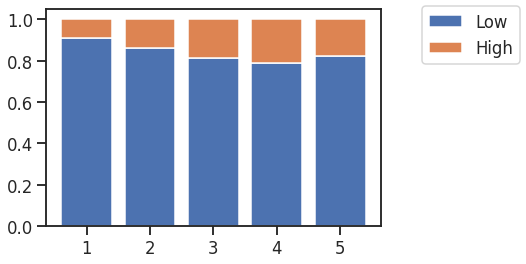

In [ ]:
plt.bar(prop_year_a_low['generation'], prop_year_a_low['dep_binary'], label='Low')
plt.bar(prop_year_a_high['generation'], prop_year_a_high['dep_binary'], bottom=prop_year_a_low['dep_binary'], label='High')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
silent = phase1_year_anxiety[phase1_year_anxiety["generation"]=="silent"]["ANXIOUS"].values
baby = phase1_year_anxiety[phase1_year_anxiety["generation"]=="baby"]["ANXIOUS"].values
genx = phase1_year_anxiety[phase1_year_anxiety["generation"]=="genx"]["ANXIOUS"].values
millenial = phase1_year_anxiety[phase1_year_anxiety["generation"]=="millenial"]["ANXIOUS"].values
genz= phase1_year_anxiety[phase1_year_anxiety["generation"]=="genz"]["ANXIOUS"].values

In [ ]:
stats.f_oneway(silent,baby,genx,millenial,genz)

In [ ]:
#phase1["anxiety_ternary"] = np.where(phase1["ANXIOUS"] == 1, "low anxiety",
                                     #np.where(phase1["ANXIOUS"].isin([2, 3]), "medium anxiety", "high anxiety"))

In [ ]:
phase1_cleaned=phase1[~phase1["ANXIOUS"].isin([-99, -88])]
phase1_cleaned_gov=phase1_cleaned[~phase1_cleaned["EST_ST"].isin([11])]
phase1_cleaned_gov["GOVPARTY"] = np.where(phase1_cleaned_gov["EST_ST"].isin([1,2,4,5,12,13,16,18,19,24,25,28,29,31,33,38,39,40,45,46,47,48,49,54,56]), "republican", "democratic")
phase1_cleaned_gov

In [ ]:
prop_anxiety_govR = phase1_cleaned_gov.groupby("ANXIOUS")["GOVPARTY"].apply(get_proportion, nums="republican").reset_index()
prop_anxiety_govR["name"]="republican"
prop_anxiety_govR
prop_anxiety_govD= phase1_cleaned_gov.groupby("ANXIOUS")["GOVPARTY"].apply(get_proportion, nums="democratic").reset_index()
prop_anxiety_govR["name"]="democratic"
prop_anxiety_govD

In [ ]:
plt.bar(prop_anxiety_govR['ANXIOUS'], prop_anxiety_govR['GOVPARTY'], label='Republican')
plt.bar(prop_anxiety_govD['ANXIOUS'], prop_anxiety_govD['GOVPARTY'], bottom=prop_anxiety_govR['GOVPARTY'], label='Democrat')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
phase1_cleaned_gov
democratic = phase1_cleaned_gov[phase1_cleaned_gov["GOVPARTY"] == "democratic"]["ANXIOUS"].values
republican = phase1_cleaned_gov[phase1_cleaned_gov["GOVPARTY"] == "republican"]["ANXIOUS"].values
stats.ttest_ind(democratic, republican)

In [ ]:
sns.histplot(x=democratic, color="blue")
sns.histplot(x=republican, color="red")
plt.show()

### Region



In [ ]:
phase1["region"] = np.where(phase1["EST_ST"].isin([23, 50, 44, 9, 36, 34, 42]), 1,
                            np.where(phase1["EST_ST"].isin([39, 26, 18, 55, 17, 27, 19, 29, 38, 46, 31, 20]), 2,
                                     np.where(phase1["EST_ST"].isin([10, 24, 51, 54, 21, 37, 45, 47, 13, 12, 1, 28, 5, 22, 48, 40]), 3, 4)))

In [ ]:
phase1_region_anx=phase1[~phase1["ANXIOUS"].isin([-99,-88])]

In [ ]:
northeast=phase1_region_anx[phase1_region_anx["region"]==1]["ANXIOUS"].values
midwest=phase1_region_anx[phase1_region_anx["region"]==2]["ANXIOUS"].values
south=phase1_region_anx[phase1_region_anx["region"]==3]["ANXIOUS"].values
west=phase1_region_anx[phase1_region_anx["region"]==4]["ANXIOUS"].values

In [ ]:
stats.f_oneway(northeast, midwest, south, west)

In [ ]:
phase1_region_dep=phase1[~phase1["DOWN"].isin([-99,-88])]
northeastd=phase1_region_dep[phase1_region_dep["region"]==1]["DOWN"].values
midwestd=phase1_region_dep[phase1_region_dep["region"]==2]["DOWN"].values
southd=phase1_region_dep[phase1_region_dep["region"]==3]["DOWN"].values
westd=phase1_region_dep[phase1_region_dep["region"]==4]["DOWN"].values

In [ ]:
stats.f_oneway(northeastd, midwestd, southd, westd)

### Two-way ANOVA

In [ ]:
model = ols('ANXIOUS ~ C(region) + C(EGENDER) + C(region):C(EGENDER)', data=phase1_region_anx).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq        df             F         PR(>F)
C(region)             7.341679e+02       3.0    224.947992  6.704727e-146
C(EGENDER)            2.136825e+04       1.0  19641.601622   0.000000e+00
C(region):C(EGENDER)  5.194514e+01       3.0     15.915915   2.410965e-10
Residual              1.078556e+06  991404.0           NaN            NaN

In [ ]:
model = ols('DOWN ~ C(region) + C(EGENDER) + C(region):C(EGENDER)', data=phase1_region_dep).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
model = ols('ANXIOUS ~ C(region) + C(generation) + C(region):C(generation)', data=phase1_year_anxiety).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
model = ols('DOWN ~ C(region) + C(generation) + C(region):C(generation)', data=phase1_year_dep).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
model = ols('ANXIOUS ~ C(race_recoded) + C(generation) + C(race_recoded):C(generation)', data=phase1_year_anxiety).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
model = ols('DOWN ~ C(race_recoded) + C(generation) + C(race_recoded):C(generation)', data=phase1_year_dep).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
model = ols('ANXIOUS ~ C(EGENDER) + C(generation) + C(EGENDER):C(generation)', data=phase1_year_anxiety).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
model = ols('DOWN ~ C(EGENDER) + C(generation) + C(EGENDER):C(generation)', data=phase1_year_dep).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
model = ols('DOWN ~ C(race_recoded) + C(region) + C(race_recoded):C(region)', data=phase1_region_dep).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
model = ols('ANXIOUS ~ C(race_recoded) + C(region) + C(race_recoded):C(region)', data=phase1_region_anx).fit()
sm.stats.anova_lm(model, typ=2)

## Phase 3

In [ ]:
phase3_cleaned=phase3[~phase3["ANXIOUS"].isin([-99, -88])]
phase3_cleaned["anxiety_binary"] = np.where(phase3_cleaned["ANXIOUS"].isin([1, 2]), 1, 2)
phase3_cleaned=phase3_cleaned[~phase3_cleaned["RECVDVACC"].isin([-99, -88])]

In [ ]:
prop_vac_no = phase3_cleaned.groupby("ANXIOUS")["RECVDVACC"].apply(get_proportion, nums=2).reset_index()
prop_vac_no["name"]="not recieved"
prop_vac_yes = phase3_cleaned.groupby("ANXIOUS")["RECVDVACC"].apply(get_proportion, nums=1).reset_index()
prop_vac_yes["name"]="recieved"
prop_vac_yes

In [ ]:
plt.bar(prop_vac_yes['ANXIOUS'], prop_vac_yes["RECVDVACC"], label='Recieved')
plt.bar(prop_vac_no['ANXIOUS'], prop_vac_no["RECVDVACC"], bottom=prop_vac_yes["RECVDVACC"], label='Not recieved')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
phase3_cleaned=phase3[~phase3["ANXIOUS"].isin([-99, -88])]
phase3_cleaned_dose=phase3_cleaned[~phase3_cleaned["DOSES"].isin([-99, -88])]

In [ ]:
prop_dose_no = phase3_cleaned_dose.groupby("ANXIOUS")["DOSES"].apply(get_proportion, nums=2).reset_index()
prop_dose_no["name"]="not planned"
prop_dose_yes = phase3_cleaned_dose.groupby("ANXIOUS")["DOSES"].apply(get_proportion, nums=1).reset_index()
prop_dose_yes["name"]="planned"
prop_dose_yes

In [ ]:
plt.bar(prop_dose_yes['ANXIOUS'], prop_dose_yes["DOSES"], label='Planned')
plt.bar(prop_dose_no['ANXIOUS'], prop_dose_no["DOSES"], bottom=prop_dose_yes["DOSES"], label='Not planned')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
phase3_cleaned_get=phase3_cleaned[~phase3_cleaned["GETVACC"].isin([-99, -88])]
phase3_cleaned_get["anxiety_binary"] = np.where(phase3_cleaned_get["ANXIOUS"].isin([1, 2]), 1, 2)
prop_getvacc_high=phase3_cleaned_get.groupby("GETVACC")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
prop_getvacc_high["name"]="high"
prop_getvacc_low=phase3_cleaned_get.groupby("GETVACC")["anxiety_binary"].apply(get_proportion, nums=1).reset_index()
prop_getvacc_low["name"]="low"

In [ ]:
plt.bar(prop_getvacc_low["GETVACC"], prop_getvacc_low['anxiety_binary'], label='Low')
plt.bar(prop_getvacc_high["GETVACC"], prop_getvacc_high['anxiety_binary'], bottom=prop_getvacc_low['anxiety_binary'], label='High')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
phase3_id_count = phase3.groupby("EST_ST")["SCRAM"].nunique().reset_index()

In [ ]:
plt.figure(figsize=(12, 3))
sns.barplot(x="EST_ST", y="SCRAM", data=phase3_id_count)
plt.xticks(rotation=90)
plt.xlabel("state")
plt.ylabel("number of unique IDs")
# plt.tight_layout()
plt.show()

In [ ]:
prop3_race1=phase3.groupby("EST_ST")["RRACE"].apply(get_proportion, nums=1).reset_index()
prop3_race1.columns=["state","proportion = 1"]
plt.figure(figsize=(12, 3))
sns.barplot(x="state", y="proportion = 1", data=prop3_race1)

In [ ]:
sns.countplot(x="RRACE", hue="EGENDER",  data=phase3, palette=sns.color_palette("Set2", phase3["EGENDER"].nunique()))
plt.xlabel("race")
plt.ylabel("number of respondents")
plt.show()

In [ ]:
sns.countplot(x="REGION", hue="RRACE",  data=phase3, palette=sns.color_palette("Set2", phase3["RRACE"].nunique()))
plt.xlabel("region")
plt.ylabel("number of respondents")
plt.show()

# Other

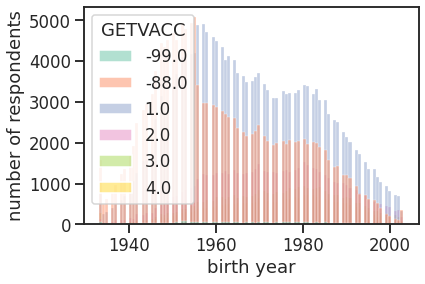

In [ ]:
sns.histplot(x="TBIRTH_YEAR", hue="GETVACC",  data=phase3, bins=100, palette=sns.color_palette("Set2", phase3["GETVACC"].nunique()))
plt.xlabel("birth year")
plt.ylabel("number of respondents")
plt.show()

In [ ]:
sns.histplot(x="TBIRTH_YEAR", hue="RECVDVACC",  data=phase3, bins=100, palette=sns.color_palette("Set2", phase3["RECVDVACC"].nunique()))
plt.xlabel("birth year")
plt.ylabel("number of respondents")
plt.show()

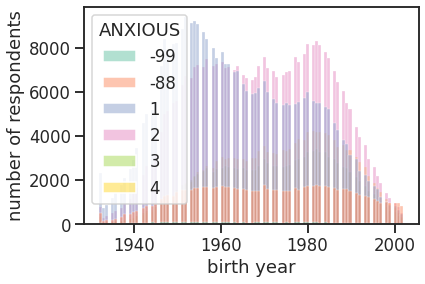

In [ ]:
sns.histplot(x="TBIRTH_YEAR", hue="ANXIOUS",  data=phase1, bins=100, palette=sns.color_palette("Set2", phase1["ANXIOUS"].nunique()))
plt.xlabel("birth year")
plt.ylabel("number of respondents")
plt.show()

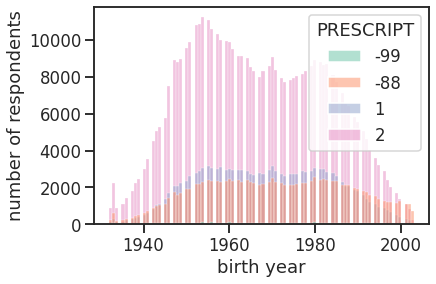

In [ ]:
sns.histplot(x="TBIRTH_YEAR", hue="PRESCRIPT",  data=phase3, bins=100, palette=sns.color_palette("Set2", phase3["PRESCRIPT"].nunique()))
plt.xlabel("birth year")
plt.ylabel("number of respondents")
plt.show()

In [ ]:
phase1["RRACE"].nunique()

In [ ]:
phase1["EST_ST"].nunique()

In [ ]:
phase2["EST_ST"].nunique()

In [ ]:
phase3["EST_ST"].nunique()

In [ ]:
phase3_1["EST_ST"].nunique()

In [ ]:
phase3_2["TBIRTH_YEAR"].min()

1933

# COVID-19 Rates

In [ ]:
history = pd.read_csv(f"{base_dir}/Data/all_states.csv")
history

date state    death  deathConfirmed  deathIncrease  \
0      2021-03-07    AK    305.0             NaN              0   
1      2021-03-07    AL  10148.0          7963.0             -1   
2      2021-03-07    AR   5319.0          4308.0             22   
3      2021-03-07    AS      0.0             NaN              0   
4      2021-03-07    AZ  16328.0         14403.0              5   
...           ...   ...      ...             ...            ...   
20775  2020-01-17    WA      NaN             NaN              0   
20776  2020-01-16    WA      NaN             NaN              0   
20777  2020-01-15    WA      NaN             NaN              0   
20778  2020-01-14    WA      NaN             NaN              0   
20779  2020-01-13    WA      NaN             NaN              0   

       deathProbable  hospitalized  hospitalizedCumulative  \
0                NaN        1293.0                  1293.0   
1             2185.0       45976.0                 45976.0   
2             1011.0       14926.0                 14926.0   
3                NaN           NaN                     NaN   
4             1925.0       57907.0                 57907.0   
...              ...           ...                     ...   
20775            NaN           NaN                     NaN   
20776            NaN           NaN                     NaN   
20777            NaN           NaN                     NaN   
20778            NaN           NaN                     NaN   
20779            NaN           NaN                     NaN   

       hospitalizedCurrently  hospitalizedIncrease  ...  totalTestResults  \
0                       33.0                     0  ...         1731628.0   
1                      494.0                     0  ...         2323788.0   
2                      335.0                    11  ...         2736442.0   
3                        NaN                     0  ...            2140.0   
4                      963.0                    44  ...         7908105.0   
...                      ...                   ...  ...               ...   
20775                    NaN                     0  ...               NaN   
20776                    NaN                     0  ...               NaN   
20777                    NaN                     0  ...               NaN   
20778                    NaN                     0  ...               NaN   
20779                    NaN                     0  ...               NaN   

       totalTestResultsIncrease  totalTestsAntibody  totalTestsAntigen  \
0                             0                 NaN                NaN   
1                          2347                 NaN                NaN   
2                          3380                 NaN                NaN   
3                             0                 NaN                NaN   
4                         45110            580569.0                NaN   
...                         ...                 ...                ...   
20775                         0                 NaN                NaN   
20776                         0                 NaN                NaN   
20777                         0                 NaN                NaN   
20778                         0                 NaN                NaN   
20779                         0                 NaN                NaN   

       totalTestsPeopleAntibody  totalTestsPeopleAntigen  \
0                           NaN                      NaN   
1                      119757.0                      NaN   
2                           NaN                 481311.0   
3                           NaN                      NaN   
4                      444089.0                      NaN   
...                         ...                      ...   
20775                       NaN                      NaN   
20776                       NaN                      NaN   
20777                       NaN                      NaN   
20778                       NaN                  

In [ ]:
history=history[~history['state'].isin(['AS','GU','MP','PR','VI'])]

In [ ]:
week_converter=pd.read_csv(f"{base_dir}/Data/week_convertor.csv")
week_converter

Week Number       Start         End
0             1  2020-04-23  2020-05-05
1             2  2020-05-07  2020-05-12
2             3  2020-05-14  2020-05-19
3             4  2020-05-21  2020-05-26
4             5  2020-05-28  2020-06-02
5             6  2020-06-04  2020-06-09
6             7  2020-06-11  2020-06-16
7             8  2020-06-18  2020-06-23
8             9  2020-06-25  2020-06-30
9            10  2020-07-02  2020-07-07
10           11  2020-07-09  2020-07-14
11           12  2020-07-16  2020-07-21
12           13  2020-08-19  2020-08-31
13           14  2020-09-02  2020-09-14
14           15  2020-09-16  2020-09-28
15           16  2020-09-30  2020-10-12
16           17  2020-10-14  2020-10-26
17           18  2020-10-28  2020-11-09
18           19  2020-11-11  2020-11-23
19           20  2020-11-25  2020-12-07
20           21  2020-12-09  2020-12-21
21           22  2021-01-06  2021-01-18
22           23  2021-01-20  2021-02-01
23           24  2021-02-03  2021-02-15
24           25  2021-02-17  2021-03-01
25           26  2021-03-03  2021-03-15
26           27  2021-03-17  2021-03-29
27           28  2021-04-14  2021-04-26
28           29  2021-04-28  2021-05-10
29           30  2021-05-12  2021-05-24
30           31  2021-05-26  2021-06-07
31           32  2021-06-09  2021-06-21
32           33  2021-06-23  2021-07-05
33           34  2021-07-21  2021-08-02
34           35  2021-08-04  2021-08-16
35           36  2021-08-18  2021-08-30
36           37  2021-09-01  2021-09-13
37           38  2021-09-15  2021-09-27
38           39  2021-09-29  2021-10-11

In [ ]:
plt.figure(figsize=(12, 3))
sns.barplot(x="state", y="positive", data=df)
plt.xticks(rotation=90)
plt.xlabel("state")
plt.ylabel("number of cases")
# plt.tight_layout()
plt.show()

NameError: ignored

<Figure size 864x216 with 0 Axes>

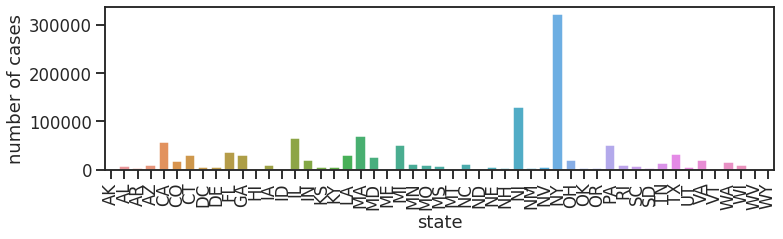

In [ ]:
plt.figure(figsize=(12, 3))
sns.barplot(x="state", y="positive", data=history[history['date'].isin(["2020-05-05"])])
plt.xticks(rotation=90)
plt.xlabel("state")
plt.ylabel("number of cases")
# plt.tight_layout()
plt.show()

In [ ]:
history["date"] = pd.to_datetime(history["date"])

In [ ]:
week_converter["Start"] = pd.to_datetime(week_converter["Start"])
week_converter["End"] = pd.to_datetime(week_converter["End"])

In [ ]:
week_dictionary = {}

for i, row in week_converter.iterrows():
    week_dictionary[row["Week Number"]] = (row["Start"], row["End"])

In [ ]:
history = history[history["date"] >= week_converter["Start"].min()]
history = history[history["date"] <= week_converter["End"].max()]

In [ ]:
week_history_list = []

for i, row in history.iterrows():
    week_number = 0
    history_date = row["date"]

    for week in week_dictionary:
        week_converter_start = week_dictionary[week][0]
        week_converter_end = week_dictionary[week][1]

        if history_date >= week_converter_start and history_date <= week_converter_end:
            week_number = week
            break


    week_history_list.append(week_number)

In [ ]:
history["week_number"] = week_history_list
history = history[history["week_number"] >= 1]

In [ ]:
history

date state    death  deathConfirmed  deathIncrease  deathProbable  \
0     2021-03-07    AK    305.0             NaN              0            NaN   
1     2021-03-07    AL  10148.0          7963.0             -1         2185.0   
2     2021-03-07    AR   5319.0          4308.0             22         1011.0   
4     2021-03-07    AZ  16328.0         14403.0              5         1925.0   
5     2021-03-07    CA  54124.0             NaN            258            NaN   
...          ...   ...      ...             ...            ...            ...   
17859 2020-04-23    VT     43.0             NaN              3            NaN   
17860 2020-04-23    WA    654.0             NaN              7            NaN   
17861 2020-04-23    WI    257.0             NaN             11            NaN   
17862 2020-04-23    WV     29.0             NaN              3            NaN   
17863 2020-04-23    WY      7.0             NaN              1            NaN   

       hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
0            1293.0                  1293.0                   33.0   
1           45976.0                 45976.0                  494.0   
2           14926.0                 14926.0                  335.0   
4           57907.0                 57907.0                  963.0   
5               NaN                     NaN                 4291.0   
...             ...                     ...                    ...   
17859           NaN                     NaN                   44.0   
17860           NaN                     NaN                  544.0   
17861        1318.0                  1318.0                  349.0   
17862           NaN                     NaN                  108.0   
17863          52.0                    52.0                    NaN   

       hospitalizedIncrease  ...  totalTestResultsIncrease  \
0                         0  ...                         0   
1                         0  ...                      2347   
2                        11  ...                      3380   
4                        44  ...                     45110   
5                         0  ...                    133186   
...                     ...  ...                       ...   
17859                     0  ...                       603   
17860                     0  ...                      4963   
17861                    16  ...                      2892   
17862                     0  ...                      1542   
17863                     0  ...                       269   

       totalTestsAntibody  totalTestsAntigen  totalTestsPeopleAntibody  \
0                     NaN                NaN                       NaN   
1                     NaN                NaN                  119757.0   
2                     NaN                NaN                       NaN   
4                580569.0                NaN                  444089.0   
5                     NaN                NaN                       NaN   
...                   ...                ...                       ...   
17859                 NaN                NaN                       NaN   
17860                 NaN                NaN                       NaN   
17861                 NaN                NaN                       NaN   
17862                 NaN                NaN                       NaN   
17863                 NaN                NaN                       NaN   

       totalTestsPeopleAntigen  totalTestsPeopleViral  \
0                          NaN                    NaN   
1                          NaN              2323788.0   
2                     481311.0                    NaN   
4                          NaN              3842945.0   
5                          NaN                    NaN   
...                        ...                    ...   
17859                      NaN                12062.0   
17860                      NaN               174468.0   
17861                      NaN                    N

## Covid Plots

In [ ]:
avg_n_cases=history.groupby("week_number")["negativeIncrease"].mean().reset_index()
avg_n_cases

week_number  negativeIncrease
0             1       1667.247360
1             2       2351.156863
2             3       2687.591503
3             4       2890.310458
4             5       3256.947712
5             6       3545.264706
6             7       3463.290850
7             8       3704.967320
8             9       4252.441176
9            10       4170.091503
10           11       4969.506536
11           12       4995.928105
12           13       4279.755656
13           14       4092.618401
14           15       4720.280543
15           16       4385.950226
16           17       4945.473605
17           18       5392.627451
18           19       6530.914027
19           20       4513.674208
20           21       6366.936652
21           22       5567.992459
22           23       5398.808446
23           24       4368.770739
24           25       3979.986425
25           26       3883.384314

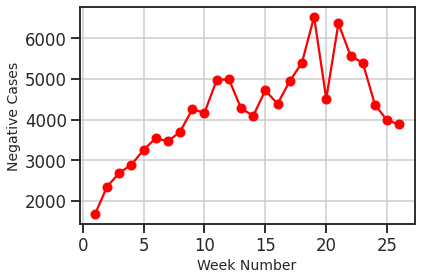

In [ ]:
plt.plot(avg_n_cases['week_number'], avg_n_cases['negativeIncrease'], color='red', marker='o')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Negative Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
high_anxiety_phases["avg_n_cases"]=avg_n_cases["negativeIncrease"]

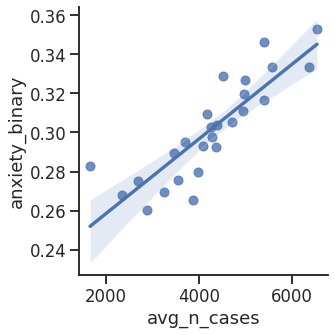

In [ ]:
sns.lmplot(x="avg_n_cases", y="anxiety_binary", data=high_anxiety_phases)

In [ ]:
model = sm.GLM.from_formula("anxiety_binary ~ avg_n_cases", data=high_anxiety_phases)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   26
Model:                            GLM   Df Residuals:                       24
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      0.00018088
Method:                          IRLS   Log-Likelihood:                 76.178
Date:                Tue, 05 Apr 2022   Deviance:                    0.0043411
Time:                        02:03:23   Pearson chi2:                  0.00434
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2201      0.010     21.448      0.000       0.200       0.240
avg_n_cases  1.913e-05   2.34e-06      8.189      0.000    1.46e-05    2.37e-05
===============================================================================
"""

In [ ]:
avg_p_cases=history.groupby("week_number")["positiveIncrease"].mean().reset_index()
avg_p_cases

week_number  positiveIncrease
0             1        553.883861
1             2        461.944444
2             3        449.633987
3             4        417.192810
4             5        430.029412
5             6        389.189542
6             7        435.382353
7             8        586.418301
8             9        833.669935
9            10        978.290850
10           11       1193.774510
11           12       1288.477124
12           13        807.668175
13           14        716.591252
14           15        829.914027
15           16        924.392157
16           17       1261.647059
17           18       2133.348416
18           19       3234.229261
19           20       3561.155354
20           21       4170.466063
21           22       4483.288084
22           23       3059.303167
23           24       1909.945701
24           25       1291.070890
25           26       1184.258824

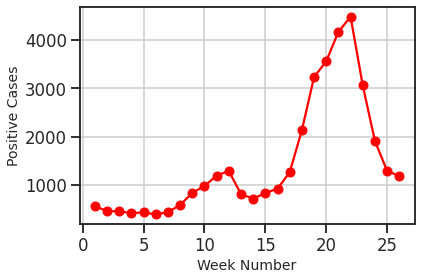

In [ ]:
plt.plot(avg_p_cases['week_number'], avg_p_cases['positiveIncrease'], color='red', marker='o')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Positive Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
avg_positive_cases=history.groupby("week_number")["positive"].mean().reset_index()
avg_positive_cases

week_number       positive
0             1   20488.971342
1             2   25816.702614
2             3   28955.588235
3             4   31992.614379
4             5   34848.013072
5             6   37701.071895
6             7   40564.728758
7             8   44129.127451
8             9   49274.702614
9            10   55918.192810
10           11   63725.454248
11           12   72683.434641
12           13  112204.435897
13           14  122842.610860
14           15  133583.105581
15           16  145555.892911
16           17  160646.918552
17           18  184039.292609
18           19  222618.562594
19           20  269453.782805
20           21  325814.021116
21           22  442196.449472
22           23  492662.981900
23           24  526542.927602
24           25  547117.232278
25           26  559503.301961

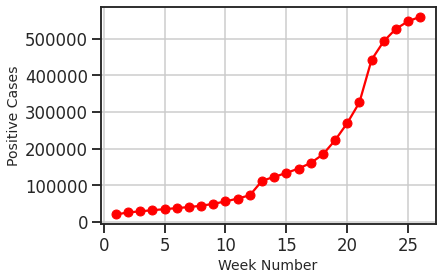

In [ ]:
plt.plot(avg_positive_cases['week_number'], avg_positive_cases['positive'], color='red', marker='o')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Positive Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
avg_current_hospitalizations=history.groupby("week_number")["hospitalizedCurrently"].mean().reset_index()
avg_current_hospitalizations

week_number  hospitalizedCurrently
0             1            1315.435897
1             2            1056.678832
2             3             938.728261
3             4             827.519573
4             5             756.269504
5             6             661.222222
6             7             595.569444
7             8             598.961806
8             9             685.454861
9            10             812.350694
10           11            1052.367347
11           12            1157.983333
12           13             752.803922
13           14             629.349925
14           15             573.119155
15           16             635.220877
16           17             766.203620
17           18             992.886878
18           19            1476.466063
19           20            1884.196078
20           21            2171.384615
21           22            2524.298643
22           23            2106.867270
23           24            1526.696833
24           25            1068.515837
25           26             835.305882

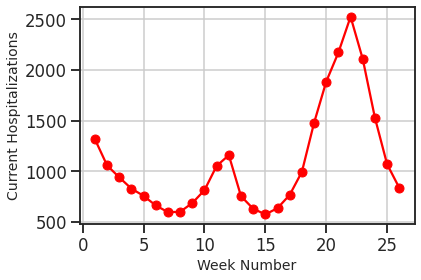

In [ ]:
plt.plot(avg_current_hospitalizations['week_number'], avg_current_hospitalizations['hospitalizedCurrently'], color='red', marker='o')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Current Hospitalizations', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
high_anxiety_phases["avg_current_hospitalizations"]=avg_current_hospitalizations["hospitalizedCurrently"]

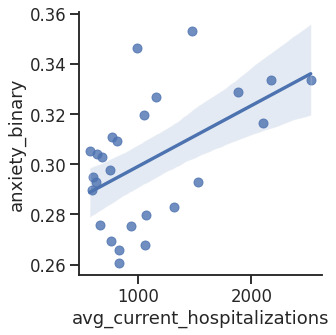

In [ ]:
sns.lmplot(x="avg_current_hospitalizations", y="anxiety_binary", data=high_anxiety_phases)

In [ ]:
model = sm.GLM.from_formula("anxiety_binary ~ avg_current_hospitalizations", data=high_anxiety_phases)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   26
Model:                            GLM   Df Residuals:                       24
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      0.00050563
Method:                          IRLS   Log-Likelihood:                 62.814
Date:                Tue, 05 Apr 2022   Deviance:                     0.012135
Time:                        02:03:36   Pearson chi2:                   0.0121
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.2749      0.010     27.330      0.000       0.255       0.295
avg_current_hospitalizations  2.423e-05   8.28e-06      2.928      0.003    8.01e-06    4.05e-05
================================================================================================
"""

In [ ]:
avg_total_hospitalizations=history.groupby("week_number")["hospitalized"].mean().reset_index()
avg_total_hospitalizations

week_number  hospitalized
0             1   1481.115196
1             2   2142.934010
2             3   2429.585859
3             4   2808.960976
4             5   3383.947619
5             6   3459.800926
6             7   3680.939815
7             8   3875.263889
8             9   4087.916667
9            10   4318.814815
10           11   4678.226852
11           12   5081.027778
12           13   7398.403846
13           14   7895.615385
14           15   8365.081197
15           16   8861.106838
16           17   9585.715517
17           18  10616.263736
18           19  11807.643956
19           20  13258.479121
20           21  14905.659341
21           22  18147.916484
22           23  19670.131868
23           24  20824.263736
24           25  21641.527473
25           26  22115.885714

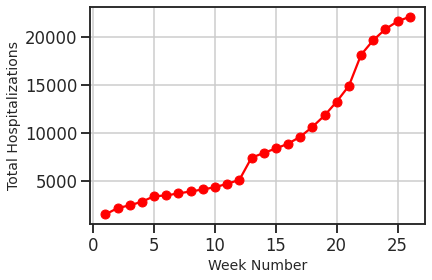

In [ ]:
plt.plot(avg_total_hospitalizations['week_number'], avg_total_hospitalizations['hospitalized'], color='red', marker='o')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Total Hospitalizations', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
avg_death=history.groupby("week_number")["death"].mean().reset_index()
avg_death

week_number         death
0             1   1118.998492
1             2   1485.741830
2             3   1677.235294
3             4   1833.147059
4             5   1964.617647
5             6   2076.578431
6             7   2176.584967
7             8   2258.307190
8             9   2332.866013
9            10   2402.336601
10           11   2491.725490
11           12   2593.372549
12           13   3340.393665
13           14   3568.571644
14           15   3778.184012
15           16   3970.918552
16           17   4166.215686
17           18   4398.684766
18           19   4710.407240
19           20   5147.582202
20           21   5786.496229
21           22   7265.951735
22           23   8128.838612
23           24   8983.564103
24           25   9630.743590
25           26  10000.345098

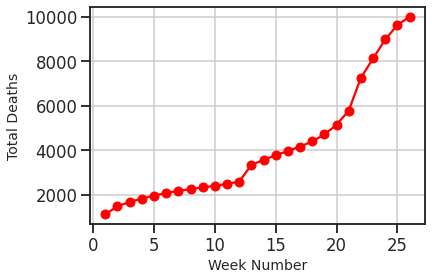

In [ ]:
plt.plot(avg_death['week_number'], avg_death['death'], color='red', marker='o')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
avg_neg_cases=history.groupby("week_number")["negative"].mean().reset_index()
avg_neg_cases

week_number      negative
0             1  6.963743e+04
1             2  1.015480e+05
2             3  1.301008e+05
3             4  1.635807e+05
4             5  1.973924e+05
5             6  2.366607e+05
6             7  2.742558e+05
7             8  3.156183e+05
8             9  3.596690e+05
9            10  4.070839e+05
10           11  4.570640e+05
11           12  5.137930e+05
12           13  7.935105e+05
13           14  8.858084e+05
14           15  9.835218e+05
15           16  1.098640e+06
16           17  1.224169e+06
17           18  1.343585e+06
18           19  1.476035e+06
19           20  1.634690e+06
20           21  1.792928e+06
21           22  2.048459e+06
22           23  2.180660e+06
23           24  2.294704e+06
24           25  2.388078e+06
25           26  2.458750e+06

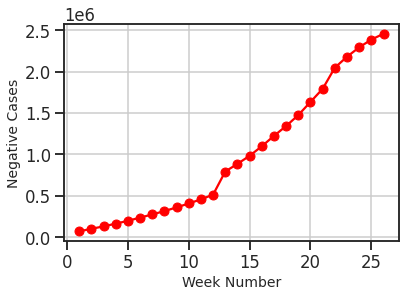

In [ ]:
plt.plot(avg_neg_cases['week_number'], avg_neg_cases['negative'], color='red', marker='o')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Negative Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
avg_totalTestResults=history.groupby("week_number")["totalTestResults"].mean().reset_index()
avg_totalTestResults

week_number  totalTestResults
0             1      1.266718e+05
1             2      1.843304e+05
2             3      2.338981e+05
3             4      2.913869e+05
4             5      3.505552e+05
5             6      4.175471e+05
6             7      4.851259e+05
7             8      5.605859e+05
8             9      6.488745e+05
9            10      7.454678e+05
10           11      8.512155e+05
11           12      9.695929e+05
12           13      1.587447e+06
13           14      1.815259e+06
14           15      2.065148e+06
15           16      2.350965e+06
16           17      2.665362e+06
17           18      3.017227e+06
18           19      3.440728e+06
19           20      3.920754e+06
20           21      4.423327e+06
21           22      5.402433e+06
22           23      5.921867e+06
23           24      6.382016e+06
24           25      6.780076e+06
25           26      7.067031e+06

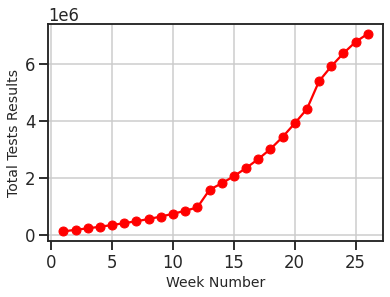

In [ ]:
plt.plot(avg_totalTestResults['week_number'], avg_totalTestResults['totalTestResults'], color='red', marker='o')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Total Tests Results', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
covid_phases = map_phases[map_phases["WEEK"]<=26]
covid_phases

SCRAM  WEEK  EST_ST  TBIRTH_YEAR  EGENDER  \
0        V010000001S10011099370111     1      47         1986        2   
1        V010000001S10011900470112     1       1         1955        1   
2        V010000001S18010744940111     1      26         1976        2   
3        V010000001S37010301340112     1       1         1964        1   
4        V010000001S37010480340111     1       1         1963        2   
...                            ...   ...     ...          ...      ...   
2246228  V269950006S14560958110021    26      56         1964        1   
2246229  V269950006S31560279200011    26      56         1985        2   
2246230  V269950006S31560573300021    26       6         1997        2   
2246231  V269950006S71560289300011    26      26         1992        2   
2246232  V269950006S73560654110011    26      56         1981        2   

         RHISPANIC  RRACE  ANXIOUS  WORRY  DOWN  INTEREST  week_number  
0                1      1        4      3     1         1            1  
1                1      1        3      4     4         4            1  
2                1      4        1      1     1         1            1  
3                1      1        4      4     4         4            1  
4                1      1        2      1     2         2            1  
...            ...    ...      ...    ...   ...       ...          ...  
2246228          1      1        2      1     1         1           26  
2246229          1      1        4      3     3         2           26  
2246230          2      1        2      3     3         3           26  
2246231          1      1        1      1     2         1           26  
2246232          1      1        3      3     3         2           26  

[2246233 rows x 12 columns]

In [ ]:
covid_phases=pd.concat([covid_phases[["SCRAM","WEEK", "EST_ST", "TBIRTH_YEAR", "EGENDER", "RHISPANIC", "RRACE", "ANXIOUS", "WORRY", "DOWN", "INTEREST", "week_number"]]],ignore_index=True, axis=0)

In [ ]:
covid_phases=covid_phases[~covid_phases["ANXIOUS"].isin([-99, -88])]

In [ ]:
covid_phases["anxiety_binary"] = np.where(covid_phases["ANXIOUS"].isin([1, 2]), 1, 2)

In [ ]:
covid_phases=covid_phases[~covid_phases["DOWN"].isin([-99, -88])]
covid_phases["dep_binary"] = np.where(covid_phases["DOWN"].isin([1, 2]), 1, 2)

In [ ]:
covid_high_a = covid_phases.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
covid_high_a["name"]="high"
covid_low_a=covid_phases.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=1).reset_index()
covid_low_a["name"]="low"

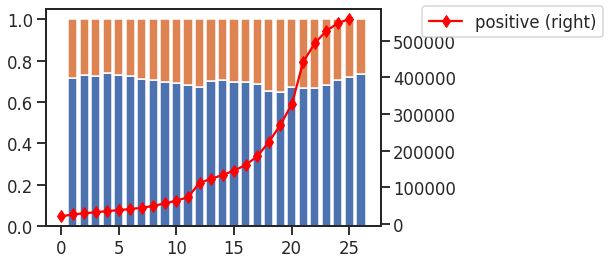

In [ ]:
plt.bar(covid_low_a['week_number'], covid_low_a['anxiety_binary'], label='Low')
plt.bar(covid_high_a['week_number'], covid_high_a['anxiety_binary'], bottom=covid_low_a['anxiety_binary'], label='High')
avg_positive_cases['positive'].plot(kind='line', marker='d', secondary_y=True, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.05))


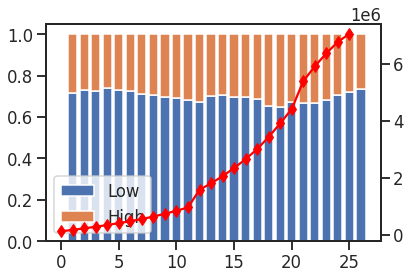

In [ ]:
plt.bar(covid_low_a['week_number'], covid_low_a['anxiety_binary'], label='Low')
plt.bar(covid_high_a['week_number'], covid_high_a['anxiety_binary'], bottom=covid_low_a['anxiety_binary'], label='High')
plt.legend(bbox_to_anchor=(1.1, 1.05))
avg_totalTestResults['totalTestResults'].plot(kind='line', marker='d', secondary_y=True, color='red')

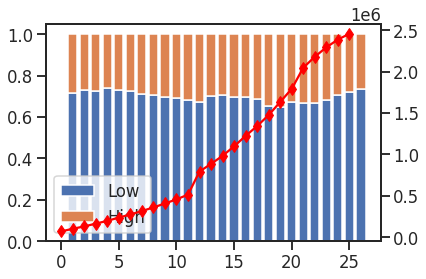

In [ ]:
plt.bar(covid_low_a['week_number'], covid_low_a['anxiety_binary'], label='Low')
plt.bar(covid_high_a['week_number'], covid_high_a['anxiety_binary'], bottom=covid_low_a['anxiety_binary'], label='High')
plt.legend(bbox_to_anchor=(1.1, 1.05))
avg_neg_cases['negative'].plot(kind='line', marker='d', secondary_y=True, color='red')

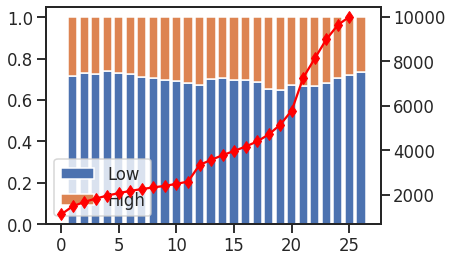

In [ ]:
plt.bar(covid_low_a['week_number'], covid_low_a['anxiety_binary'], label='Low')
plt.bar(covid_high_a['week_number'], covid_high_a['anxiety_binary'], bottom=covid_low_a['anxiety_binary'], label='High')
plt.legend(bbox_to_anchor=(1.1, 1.05))
avg_death['death'].plot(kind='line', marker='d', secondary_y=True, color='red')

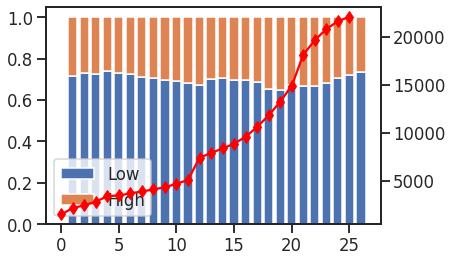

In [ ]:
plt.bar(covid_low_a['week_number'], covid_low_a['anxiety_binary'], label='Low')
plt.bar(covid_high_a['week_number'], covid_high_a['anxiety_binary'], bottom=covid_low_a['anxiety_binary'], label='High')
plt.legend(bbox_to_anchor=(1.1, 1.05))
avg_total_hospitalizations['hospitalized'].plot(kind='line', marker='d', secondary_y=True, color='red')

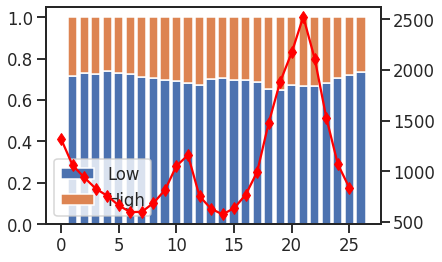

In [ ]:
plt.bar(covid_low_a['week_number'], covid_low_a['anxiety_binary'], label='Low')
plt.bar(covid_high_a['week_number'], covid_high_a['anxiety_binary'], bottom=covid_low_a['anxiety_binary'], label='High')
plt.legend(bbox_to_anchor=(1.1, 1.05))
avg_current_hospitalizations['hospitalizedCurrently'].plot(kind='line', marker='d', secondary_y=True, color='red')

In [ ]:
covid_high_d = covid_phases.groupby("week_number")["dep_binary"].apply(get_proportion, nums=2).reset_index()
covid_high_d["name"]="high"
covid_low_d=covid_phases.groupby("week_number")["dep_binary"].apply(get_proportion, nums=1).reset_index()
covid_low_d["name"]="low"

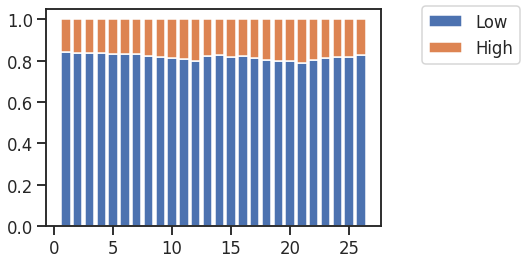

In [ ]:
plt.bar(covid_low_d['week_number'], covid_low_d['dep_binary'], label='Low')
plt.bar(covid_high_d['week_number'], covid_high_d['dep_binary'], bottom=covid_low_d['dep_binary'], label='High')
plt.legend(bbox_to_anchor=(1.1, 1.05))

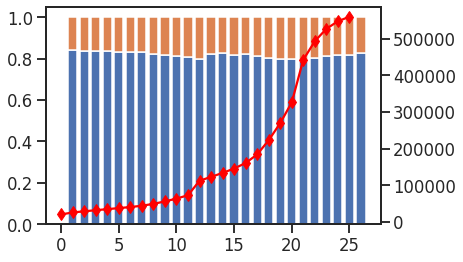

In [ ]:
plt.bar(covid_low_d['week_number'], covid_low_d['dep_binary'], label='Low')
plt.bar(covid_high_d['week_number'], covid_high_d['dep_binary'], bottom=covid_low_d['dep_binary'], label='High')
avg_positive_cases['positive'].plot(kind='line', marker='d', secondary_y=True, color='red')

In [ ]:
plt.bar(covid_low_d['week_number'], covid_low_d['dep_binary'], label='Low')
plt.bar(covid_high_d['week_number'], covid_high_d['dep_binary'], bottom=covid_low_d['dep_binary'], label='High')
avg_current_hospitalizations['hospitalizedCurrently'].plot(kind='line', marker='d', secondary_y=True, color='red')

In [ ]:
plt.bar(covid_low_d['week_number'], covid_low_d['dep_binary'], label='Low')
plt.bar(covid_high_d['week_number'], covid_high_d['dep_binary'], bottom=covid_low_d['dep_binary'], label='High')
avg_total_hospitalizations['hospitalized'].plot(kind='line', marker='d', secondary_y=True, color='red')

In [ ]:
plt.bar(covid_low_d['week_number'], covid_low_d['dep_binary'], label='Low')
plt.bar(covid_high_d['week_number'], covid_high_d['dep_binary'], bottom=covid_low_d['dep_binary'], label='High')
avg_totalTestResults['totalTestResults'].plot(kind='line', marker='d', secondary_y=True, color='red')

In [ ]:
plt.bar(covid_low_d['week_number'], covid_low_d['dep_binary'], label='Low')
plt.bar(covid_high_d['week_number'], covid_high_d['dep_binary'], bottom=covid_low_d['dep_binary'], label='High')
avg_neg_cases['negative'].plot(kind='line', marker='d', secondary_y=True, color='red')

In [ ]:
plt.bar(covid_low_d['week_number'], covid_low_d['dep_binary'], label='Low')
plt.bar(covid_high_d['week_number'], covid_high_d['dep_binary'], bottom=covid_low_d['dep_binary'], label='High')
avg_death['death'].plot(kind='line', marker='d', secondary_y=True, color='red')

In [ ]:
female_covid=covid_phases[covid_phases["EGENDER"].isin([2])]
male_covid=covid_phases[covid_phases["EGENDER"].isin([1])]

In [ ]:
female_covid_higha = female_covid.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
female_covid_higha["name"]="high"
female_covid_lowa=female_covid.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=1).reset_index()
female_covid_lowa["name"]="low"

In [ ]:
male_covid_higha = male_covid.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
male_covid_higha["name"]="high"
male_covid_lowa=male_covid.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=1).reset_index()
male_covid_lowa["name"]="low"

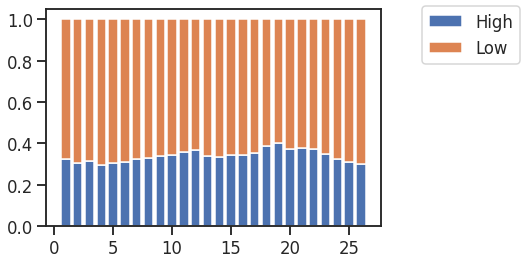

In [ ]:
plt.bar(female_covid_higha['week_number'], female_covid_higha['anxiety_binary'], label='High')
plt.bar(female_covid_lowa['week_number'], female_covid_lowa['anxiety_binary'], bottom=female_covid_higha['anxiety_binary'], label='Low')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
female_covid_df=female_covid.groupby('week_number')['ANXIOUS'].mean().reset_index()

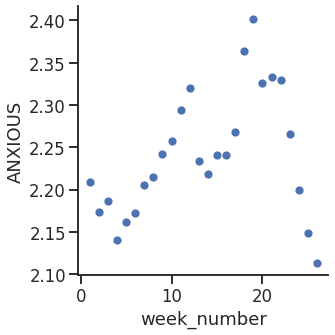

In [ ]:
sns.relplot(x="week_number", y="ANXIOUS", data=female_covid_df);

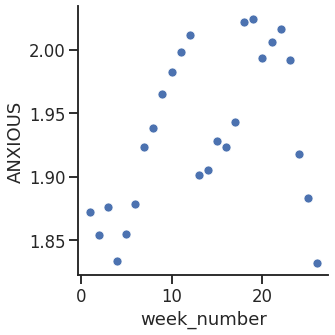

In [ ]:
male_covid_df=male_covid.groupby('week_number')['ANXIOUS'].mean().reset_index()
sns.relplot(x="week_number", y="ANXIOUS", data=male_covid_df);

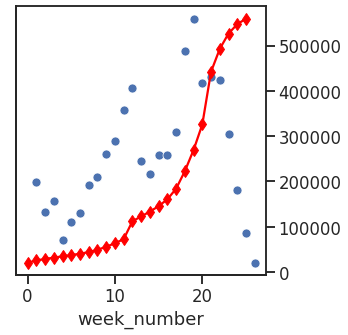

In [ ]:
sns.relplot(x="week_number", y="ANXIOUS", data=female_covid_df);
avg_positive_cases['positive'].plot(kind='line', marker='d', secondary_y=True, color='red')

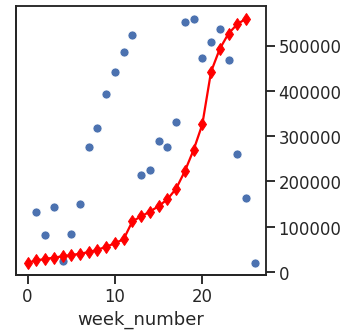

In [ ]:
sns.relplot(x="week_number", y="ANXIOUS", data=male_covid_df);
avg_positive_cases['positive'].plot(kind='line', marker='d', secondary_y=True, color='red')

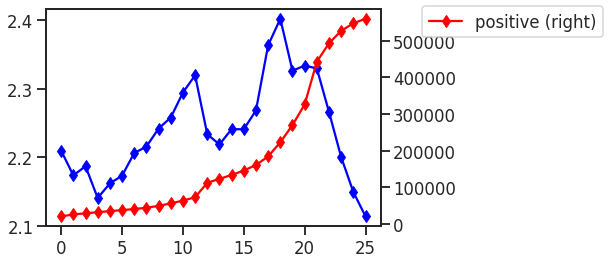

In [ ]:
female_covid_df['ANXIOUS'].plot(kind='line', marker='d', color='blue')
avg_positive_cases['positive'].plot(kind='line', marker='d', secondary_y=True, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.05))

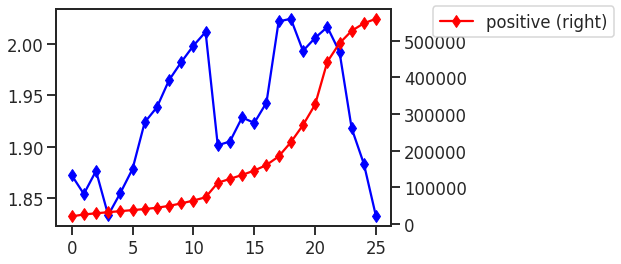

In [ ]:
male_covid_df['ANXIOUS'].plot(kind='line', marker='d',color='blue')
avg_positive_cases['positive'].plot(kind='line', marker='d', secondary_y=True, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.05))

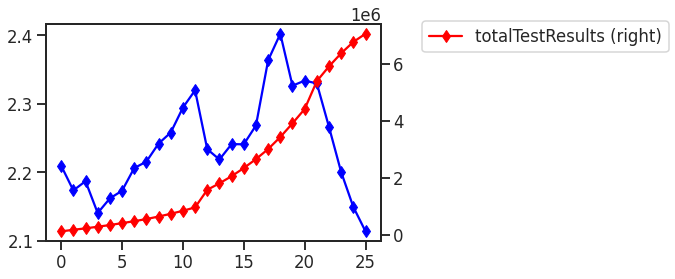

In [ ]:
female_covid_df['ANXIOUS'].plot(kind='line', marker='d', color='blue')
avg_totalTestResults['totalTestResults'].plot(kind='line', marker='d', secondary_y=True, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.05))

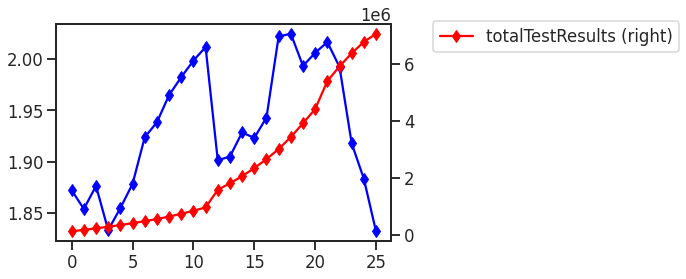

In [ ]:
male_covid_df['ANXIOUS'].plot(kind='line', marker='d', color='blue')
avg_totalTestResults['totalTestResults'].plot(kind='line', marker='d', secondary_y=True, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.05))

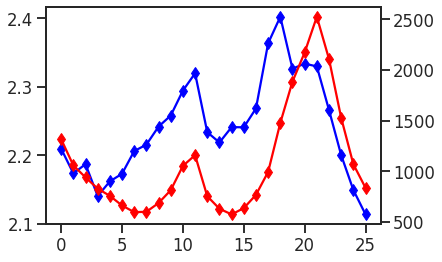

In [ ]:
female_covid_df['ANXIOUS'].plot(kind='line', marker='d', color='blue')
avg_current_hospitalizations['hospitalizedCurrently'].plot(kind='line', marker='d', secondary_y=True, color='red')

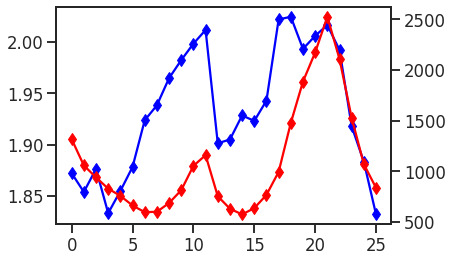

In [ ]:
male_covid_df['ANXIOUS'].plot(kind='line', marker='d', color='blue')
avg_current_hospitalizations['hospitalizedCurrently'].plot(kind='line', marker='d', secondary_y=True, color='red')

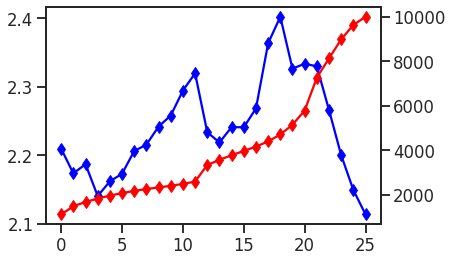

In [ ]:
female_covid_df['ANXIOUS'].plot(kind='line', marker='d', color='blue')
avg_death['death'].plot(kind='line', marker='d', secondary_y=True, color='red')

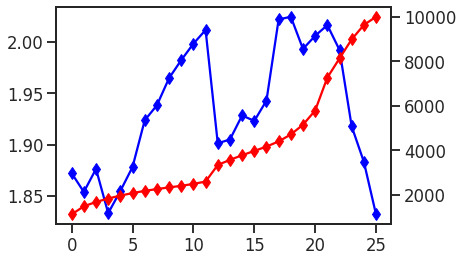

In [ ]:
male_covid_df['ANXIOUS'].plot(kind='line', marker='d', color='blue')
avg_death['death'].plot(kind='line', marker='d', secondary_y=True, color='red')

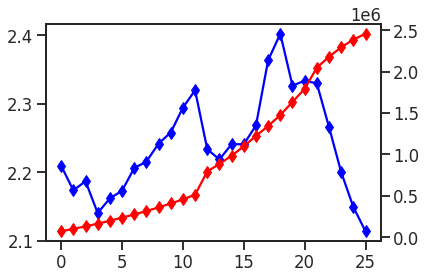

In [ ]:
female_covid_df['ANXIOUS'].plot(kind='line', marker='d', color='blue')
avg_neg_cases['negative'].plot(kind='line', marker='d', secondary_y=True, color='red')

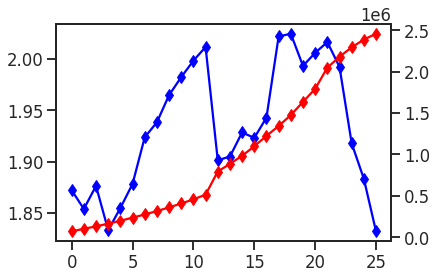

In [ ]:
male_covid_df['ANXIOUS'].plot(kind='line', marker='d', color='blue')
avg_neg_cases['negative'].plot(kind='line', marker='d', secondary_y=True, color='red')

In [ ]:
female_covid_df_d=female_covid.groupby('week_number')['DOWN'].mean().reset_index()
male_covid_df_d=male_covid.groupby('week_number')['DOWN'].mean().reset_index()

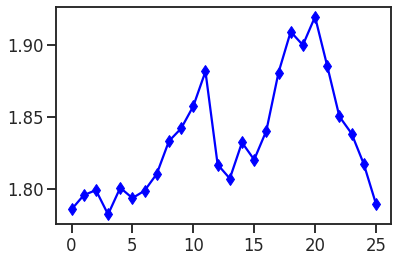

In [ ]:
female_covid_df_d['DOWN'].plot(kind='line', marker='d', color='blue')

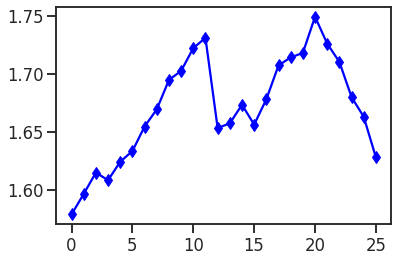

In [ ]:
male_covid_df_d['DOWN'].plot(kind='line', marker='d', color='blue')

In [ ]:
covid_phases["race_recoded"] = np.where(covid_phases["RHISPANIC"] == 2, 5, covid_phases["RRACE"])

In [ ]:
pd.crosstab(index=covid_phases['race_recoded'], columns=covid_phases['ANXIOUS'])

ANXIOUS            1       2       3       4
race_recoded                                
1             550036  514734  191864  249466
2              48975   45654   19617   22390
3              34233   32329    9335   10726
4              20832   23211   10894   15756
5              47916   60621   25388   33953

In [ ]:
pd.crosstab(index=covid_phases['race_recoded'], columns=covid_phases['DOWN'])

DOWN               1       2       3       4
race_recoded                                
1             780138  469138  129427  127397
2              66965   41076   15002   13593
3              44621   28340    7313    6349
4              30526   22579    8237    9351
5              71834   57513   19146   19385

In [ ]:
race1_covid=covid_phases[covid_phases["race_recoded"].isin([1])]
race2_covid=covid_phases[covid_phases["race_recoded"].isin([2])]
race3_covid=covid_phases[covid_phases["race_recoded"].isin([3])]
race4_covid=covid_phases[covid_phases["race_recoded"].isin([4])]
race5_covid=covid_phases[covid_phases["race_recoded"].isin([5])]

In [ ]:
race1_adf=race1_covid.groupby('week_number')['ANXIOUS'].mean().reset_index()
race2_adf=race2_covid.groupby('week_number')['ANXIOUS'].mean().reset_index()
race3_adf=race3_covid.groupby('week_number')['ANXIOUS'].mean().reset_index()
race4_adf=race4_covid.groupby('week_number')['ANXIOUS'].mean().reset_index()
race5_adf=race5_covid.groupby('week_number')['ANXIOUS'].mean().reset_index()

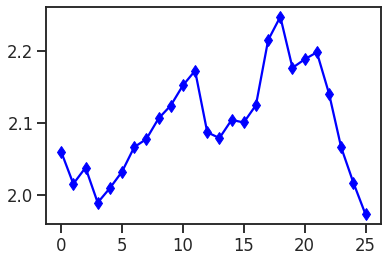

In [ ]:
race1_adf['ANXIOUS'].plot(kind='line', marker='d', color='blue')

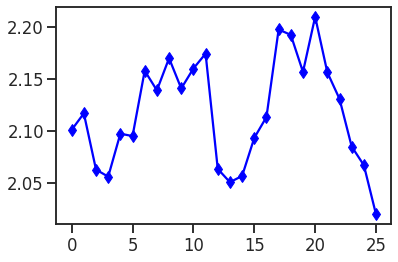

In [ ]:
race2_adf['ANXIOUS'].plot(kind='line', marker='d', color='blue')

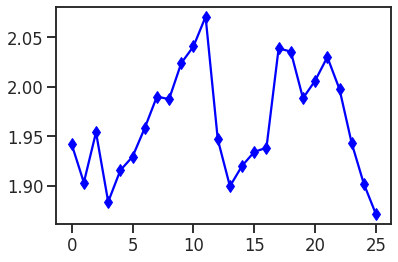

In [ ]:
race3_adf['ANXIOUS'].plot(kind='line', marker='d', color='blue')

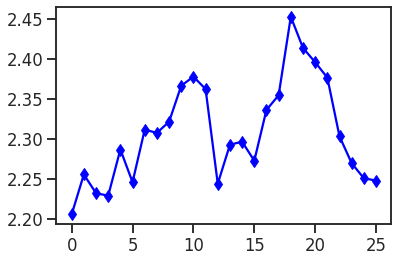

In [ ]:
race4_adf['ANXIOUS'].plot(kind='line', marker='d', color='blue')

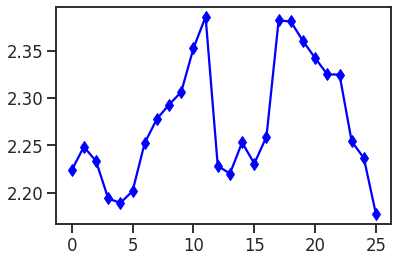

In [ ]:
race5_adf['ANXIOUS'].plot(kind='line', marker='d', color='blue')

In [ ]:
race1_ddf=race1_covid.groupby('week_number')['DOWN'].mean().reset_index()
race2_ddf=race2_covid.groupby('week_number')['DOWN'].mean().reset_index()
race3_ddf=race3_covid.groupby('week_number')['DOWN'].mean().reset_index()
race4_ddf=race4_covid.groupby('week_number')['DOWN'].mean().reset_index()
race5_ddf=race5_covid.groupby('week_number')['DOWN'].mean().reset_index()

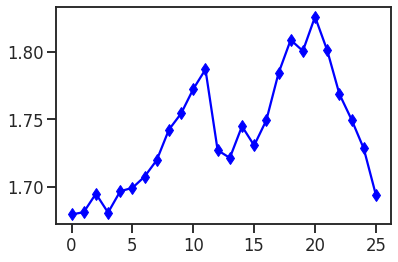

In [ ]:
race1_ddf['DOWN'].plot(kind='line', marker='d', color='blue')

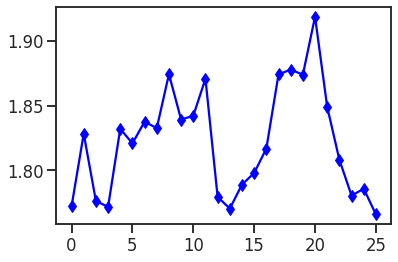

In [ ]:
race2_ddf['DOWN'].plot(kind='line', marker='d', color='blue')

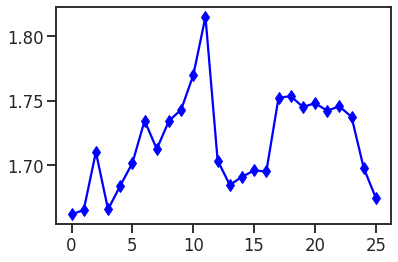

In [ ]:
race3_ddf['DOWN'].plot(kind='line', marker='d', color='blue')

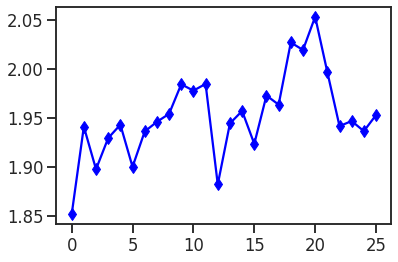

In [ ]:
race4_ddf['DOWN'].plot(kind='line', marker='d', color='blue')

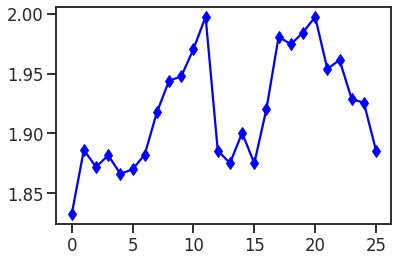

In [ ]:
race5_ddf['DOWN'].plot(kind='line', marker='d', color='blue')

In [ ]:
covid_phases["generation"] = np.where(covid_phases["TBIRTH_YEAR"].isin([1920,1945]), 1,
                                      np.where(covid_phases["TBIRTH_YEAR"].isin([1946,1964]), 2,
                                                np.where(covid_phases["TBIRTH_YEAR"].isin([1965,1979]),3,
                                                 np.where(covid_phases["TBIRTH_YEAR"].isin([1980,2000]), 4, 5))))

In [ ]:
gen1=covid_phases[covid_phases["generation"].isin([1])]
gen2=covid_phases[covid_phases["generation"].isin([2])]
gen3=covid_phases[covid_phases["generation"].isin([3])]
gen4=covid_phases[covid_phases["generation"].isin([4])]
gen5=covid_phases[covid_phases["generation"].isin([5])]

In [ ]:
gen1_adf=gen1.groupby('week_number')['ANXIOUS'].mean().reset_index()
gen2_adf=gen2.groupby('week_number')['ANXIOUS'].mean().reset_index()
gen3_adf=gen3.groupby('week_number')['ANXIOUS'].mean().reset_index()
gen4_adf=gen4.groupby('week_number')['ANXIOUS'].mean().reset_index()
gen5_adf=gen5.groupby('week_number')['ANXIOUS'].mean().reset_index()

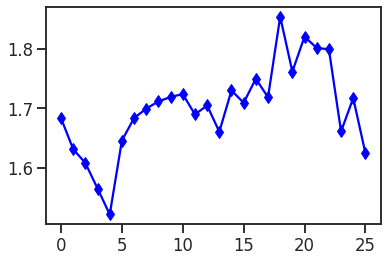

In [ ]:
gen1_adf['ANXIOUS'].plot(kind='line', marker='d', color='blue')

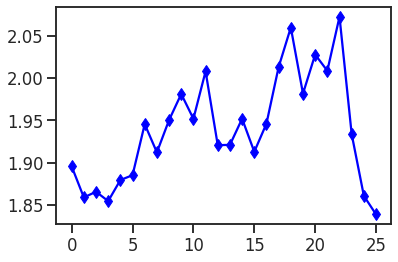

In [ ]:
gen2_adf['ANXIOUS'].plot(kind='line', marker='d', color='blue')

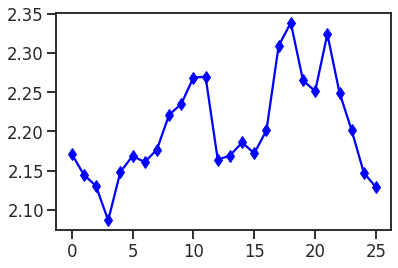

In [ ]:
gen3_adf['ANXIOUS'].plot(kind='line', marker='d', color='blue')

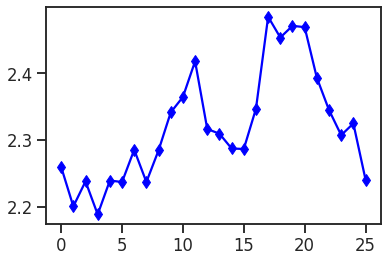

In [ ]:
gen4_adf['ANXIOUS'].plot(kind='line', marker='d', color='blue')

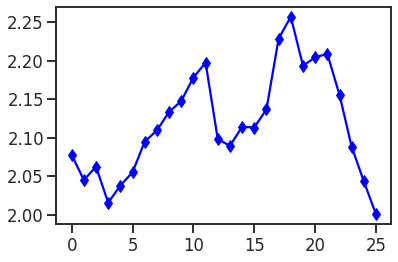

In [ ]:
gen5_adf['ANXIOUS'].plot(kind='line', marker='d', color='blue')

# Vaccination

In [ ]:
vaccination= pd.read_csv(f"{base_dir}/Data/owid-covid-data.csv")

In [ ]:
vaccination["date"] = pd.to_datetime(vaccination["date"])

In [ ]:
vaccination=vaccination[vaccination['iso_code'].isin(['USA'])]
vaccination

iso_code      continent       location       date  total_cases  \
146768      USA  North America  United States 2020-01-22          1.0   
146769      USA  North America  United States 2020-01-23          1.0   
146770      USA  North America  United States 2020-01-24          2.0   
146771      USA  North America  United States 2020-01-25          2.0   
146772      USA  North America  United States 2020-01-26          5.0   
...         ...            ...            ...        ...          ...   
147490      USA  North America  United States 2022-01-13   64062060.0   
147491      USA  North America  United States 2022-01-14   64920670.0   
147492      USA  North America  United States 2022-01-15   65445434.0   
147493      USA  North America  United States 2022-01-16   65703875.0   
147494      USA  North America  United States 2022-01-17   66529280.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
146768        NaN                 NaN           NaN         NaN   
146769        0.0                 NaN           NaN         NaN   
146770        1.0                 NaN           NaN         NaN   
146771        0.0                 NaN           NaN         NaN   
146772        3.0                 NaN           NaN         NaN   
...           ...                 ...           ...         ...   
147490   776455.0          786468.286      847273.0      1881.0   
147491   858610.0          787218.571      849580.0      2307.0   
147492   524764.0          807854.571      850383.0       803.0   
147493   258441.0          777452.857      850931.0       548.0   
147494   825405.0          700451.000      852055.0      1124.0   

        new_deaths_smoothed  ...  female_smokers  male_smokers  \
146768                  NaN  ...            19.1          24.6   
146769                  NaN  ...            19.1          24.6   
146770                  NaN  ...            19.1          24.6   
146771                  NaN  ...            19.1          24.6   
146772                  NaN  ...            19.1          24.6   
...                     ...  ...             ...           ...   
147490             1696.000  ...            19.1          24.6   
147491             1703.143  ...            19.1          24.6   
147492             1719.143  ...            19.1          24.6   
147493             1737.571  ...            19.1          24.6   
147494             1632.571  ...            19.1          24.6   

        handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
146768                     NaN                        2.77            78.86   
146769                     NaN                        2.77            78.86   
146770                     NaN                        2.77            78.86   
146771                     NaN                        2.77            78.86   
146772                     NaN                        2.77            78.86   
...                        ...                         ...              ...   
147490                     NaN                        2.77            78.86   
147491                     NaN                        2.77            78.86   
147492                     NaN                        2.77            78.86   
147493                     NaN                        2.77            78.86   
147494                     NaN                        2.77            78.86   

        human_development_index  excess_mortality_cumulative_absolute  \
146768                    0.926                                   NaN   
146769                    0.926                                   NaN   
146770                    0.926                                   NaN   
146771                    0.926                                   NaN   
146772                    0.926                               -8925.0   
...                         ...                                   ...   
147490                    0.926                                   NaN   

In [ ]:
vaccination = vaccination[vaccination["date"] >= week_converter["Start"].min()]
vaccination = vaccination[vaccination["date"] <= week_converter["End"].max()]

In [ ]:
week_vac_list = []

for i, row in vaccination.iterrows():
    week_number = 0
    vaccination_date = row["date"]

    for week in week_dictionary:
        week_converter_start = week_dictionary[week][0]
        week_converter_end = week_dictionary[week][1]

        if vaccination_date >= week_converter_start and vaccination_date <= week_converter_end:
            week_number = week
            break


    week_vac_list.append(week_number)

In [ ]:
vaccination["week_number"] = week_vac_list
vaccination = vaccination[vaccination["week_number"] >= 1]

In [ ]:
avg_new_vaccinations=vaccination.groupby("week_number")["new_vaccinations"].mean().reset_index()
avg_new_vaccinations

week_number  new_vaccinations
0             1               NaN
1             2               NaN
2             3               NaN
3             4               NaN
4             5               NaN
5             6               NaN
6             7               NaN
7             8               NaN
8             9               NaN
9            10               NaN
10           11               NaN
11           12               NaN
12           13               NaN
13           14               NaN
14           15               NaN
15           16               NaN
16           17               NaN
17           18               NaN
18           19               NaN
19           20               NaN
20           21      1.961014e+05
21           22      9.407365e+05
22           23      1.375079e+06
23           24      1.746481e+06
24           25      1.892021e+06
25           26      2.514697e+06
26           27      2.791908e+06
27           28      2.780112e+06
28           29      2.114324e+06
29           30      1.762422e+06
30           31      1.006162e+06
31           32      8.358997e+05
32           33      5.221509e+05
33           34      6.082301e+05
34           35      7.190046e+05
35           36      8.514922e+05
36           37      7.134712e+05
37           38      6.904305e+05
38           39      8.708602e+05

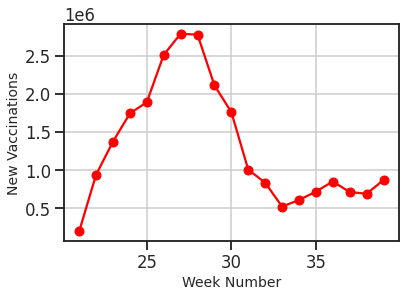

In [ ]:
plt.plot(avg_new_vaccinations['week_number'], avg_new_vaccinations['new_vaccinations'], color='red', marker='o')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('New Vaccinations', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
avg_positive_rate=vaccination.groupby("week_number")["positive_rate"].mean().reset_index()
avg_positive_rate

week_number  positive_rate
0             1       0.119554
1             2       0.076883
2             3       0.057967
3             4       0.053600
4             5       0.044733
5             6       0.040367
6             7       0.038550
7             8       0.043733
8             9       0.055317
9            10       0.064800
10           11       0.067133
11           12       0.070350
12           13       0.050492
13           14       0.045762
14           15       0.043523
15           16       0.043369
16           17       0.053200
17           18       0.073300
18           19       0.093954
19           20       0.103931
20           21       0.120285
21           22       0.132085
22           23       0.099669
23           24       0.076131
24           25       0.056415
25           26       0.045631
26           27       0.047154
27           28       0.051000
28           29       0.040500
29           30       0.031577
30           31       0.023877
31           32       0.019431
32           33       0.021277
33           34       0.075177
34           35       0.100585
35           36       0.102954
36           37       0.097946
37           38       0.081069
38           39       0.065554

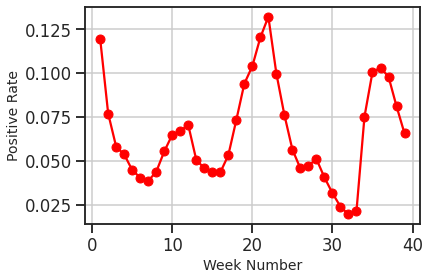

In [ ]:
plt.plot(avg_positive_rate['week_number'], avg_positive_rate['positive_rate'], color='red', marker='o')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Positive Rate', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
avg_positive_cases=vaccination.groupby("week_number")["new_cases"].mean().reset_index()
avg_positive_cases

week_number      new_cases
0             1   27826.307692
1             2   23400.500000
2             3   22880.000000
3             4   21370.666667
4             5   21361.333333
5             6   20172.666667
6             7   22410.500000
7             8   31168.000000
8             9   43022.166667
9            10   51668.333333
10           11   62451.666667
11           12   66555.000000
12           13   41590.692308
13           14   37513.307692
14           15   42782.000000
15           16   47709.923077
16           17   66542.307692
17           18  108125.461538
18           19  168710.461538
19           20  185442.307692
20           21  217840.230769
21           22  230205.307692
22           23  157359.538462
23           24   97930.384615
24           25   67843.230769
25           26   56494.000000
26           27   60411.230769
27           28   60057.000000
28           29   43922.307692
29           30   28122.538462
30           31   16130.153846
31           32   12647.692308
32           33   12560.076923
33           34   74100.000000
34           35  129232.846154
35           36  155332.153846
36           37  154012.769231
37           38  127410.538462
38           39   94644.230769

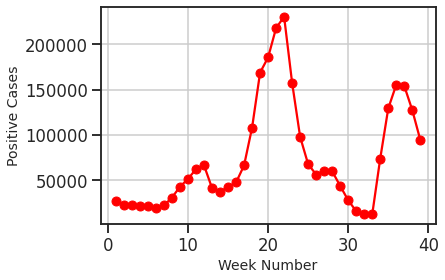

In [ ]:
plt.plot(avg_positive_cases['week_number'], avg_positive_cases['new_cases'], color='red', marker='o')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Positive Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
avg_death=vaccination.groupby("week_number")["new_deaths"].mean().reset_index()
avg_death

week_number   new_deaths
0             1  1882.076923
1             2  1463.166667
2             3  1356.500000
3             4   894.333333
4             5   922.000000
5             6   733.833333
6             7   649.333333
7             8   555.166667
8             9   486.500000
9            10   592.166667
10           11   734.166667
11           12   809.833333
12           13   908.076923
13           14   759.000000
14           15   733.307692
15           16   717.384615
16           17   801.615385
17           18   971.307692
18           19  1402.769231
19           20  1941.846154
20           21  2678.538462
21           22  3267.846154
22           23  3210.307692
23           24  2625.384615
24           25  2001.615385
25           26  1368.692308
26           27   994.692308
27           28   709.000000
28           29   683.384615
29           30   561.692308
30           31   534.846154
31           32   319.615385
32           33   249.923077
33           34   341.000000
34           35   635.000000
35           36  1233.692308
36           37  1687.692308
37           38  2066.461538
38           39  1664.692308

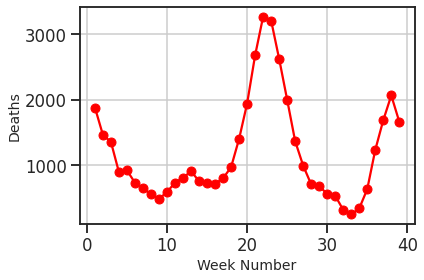

In [ ]:
plt.plot(avg_death['week_number'], avg_death['new_deaths'], color='red', marker='o')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Deaths', fontsize=14)
plt.grid(True)
plt.show()

## General Anxiety

In [ ]:
phases=map_phases


In [ ]:
phases=phases[~phases["ANXIOUS"].isin([-99,-88])]

In [ ]:
phases["anxiety_binary"] = np.where(phases["ANXIOUS"].isin([1, 2]), 1, 2)

In [ ]:
phases=phases[~phases["DOWN"].isin([-99,-88])]
phases["dep_binary"] = np.where(phases["DOWN"].isin([1, 2]), 1, 2)

In [ ]:
high_anxiety_phases = phases.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
high_anxiety_phases

week_number  anxiety_binary
0             1        0.282830
1             2        0.267810
2             3        0.275267
3             4        0.260596
4             5        0.269410
5             6        0.275767
6             7        0.289665
7             8        0.295009
8             9        0.302872
9            10        0.309397
10           11        0.319497
11           12        0.326834
12           13        0.297573
13           14        0.293026
14           15        0.305180
15           16        0.303878
16           17        0.310884
17           18        0.346491
18           19        0.352904
19           20        0.328874
20           21        0.333568
21           22        0.333505
22           23        0.316623
23           24        0.292718
24           25        0.279923
25           26        0.265635
26           27        0.250435
27           28        0.225214
28           29        0.218010
29           30        0.215028
30           31        0.205335
31           32        0.210381
32           33        0.203690
33           34        0.216896
34           35        0.223489
35           36        0.241450
36           37        0.240848
37           38        0.234933
38           39        0.226156

In [ ]:
high_anxiety_phases["avg_positive_cases"]=avg_positive_cases['new_cases']
high_anxiety_phases

week_number  anxiety_binary  avg_positive_cases
0             1        0.282830        27826.307692
1             2        0.267810        23400.500000
2             3        0.275267        22880.000000
3             4        0.260596        21370.666667
4             5        0.269410        21361.333333
5             6        0.275767        20172.666667
6             7        0.289665        22410.500000
7             8        0.295009        31168.000000
8             9        0.302872        43022.166667
9            10        0.309397        51668.333333
10           11        0.319497        62451.666667
11           12        0.326834        66555.000000
12           13        0.297573        41590.692308
13           14        0.293026        37513.307692
14           15        0.305180        42782.000000
15           16        0.303878        47709.923077
16           17        0.310884        66542.307692
17           18        0.346491       108125.461538
18           19        0.352904       168710.461538
19           20        0.328874       185442.307692
20           21        0.333568       217840.230769
21           22        0.333505       230205.307692
22           23        0.316623       157359.538462
23           24        0.292718        97930.384615
24           25        0.279923        67843.230769
25           26        0.265635        56494.000000
26           27        0.250435        60411.230769
27           28        0.225214        60057.000000
28           29        0.218010        43922.307692
29           30        0.215028        28122.538462
30           31        0.205335        16130.153846
31           32        0.210381        12647.692308
32           33        0.203690        12560.076923
33           34        0.216896        74100.000000
34           35        0.223489       129232.846154
35           36        0.241450       155332.153846
36           37        0.240848       154012.769231
37           38        0.234933       127410.538462
38           39        0.226156        94644.230769

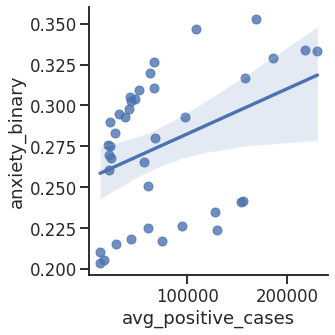

In [ ]:
sns.lmplot(x="avg_positive_cases", y="anxiety_binary", data=high_anxiety_phases)

In [ ]:
model_high_anxiety = sm.GLM.from_formula("anxiety_binary ~ avg_positive_cases", data=high_anxiety_phases)
result = model_high_anxiety.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0016377
Method:                          IRLS   Log-Likelihood:                 70.770
Date:                Tue, 05 Apr 2022   Deviance:                     0.060594
Time:                        02:17:37   Pearson chi2:                   0.0606
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2550      0.010     24.375      0.000       0.234       0.275
avg_positive_cases  2.761e-07    1.1e-07      2.508      0.012    6.03e-08    4.92e-07
======================================================================================
"""

In [ ]:
high_anxiety_phases["avg_deaths"]=avg_death['new_deaths']
high_anxiety_phases

week_number  anxiety_binary  avg_positive_cases   avg_deaths
0             1        0.282830        27826.307692  1882.076923
1             2        0.267810        23400.500000  1463.166667
2             3        0.275267        22880.000000  1356.500000
3             4        0.260596        21370.666667   894.333333
4             5        0.269410        21361.333333   922.000000
5             6        0.275767        20172.666667   733.833333
6             7        0.289665        22410.500000   649.333333
7             8        0.295009        31168.000000   555.166667
8             9        0.302872        43022.166667   486.500000
9            10        0.309397        51668.333333   592.166667
10           11        0.319497        62451.666667   734.166667
11           12        0.326834        66555.000000   809.833333
12           13        0.297573        41590.692308   908.076923
13           14        0.293026        37513.307692   759.000000
14           15        0.305180        42782.000000   733.307692
15           16        0.303878        47709.923077   717.384615
16           17        0.310884        66542.307692   801.615385
17           18        0.346491       108125.461538   971.307692
18           19        0.352904       168710.461538  1402.769231
19           20        0.328874       185442.307692  1941.846154
20           21        0.333568       217840.230769  2678.538462
21           22        0.333505       230205.307692  3267.846154
22           23        0.316623       157359.538462  3210.307692
23           24        0.292718        97930.384615  2625.384615
24           25        0.279923        67843.230769  2001.615385
25           26        0.265635        56494.000000  1368.692308
26           27        0.250435        60411.230769   994.692308
27           28        0.225214        60057.000000   709.000000
28           29        0.218010        43922.307692   683.384615
29           30        0.215028        28122.538462   561.692308
30           31        0.205335        16130.153846   534.846154
31           32        0.210381        12647.692308   319.615385
32           33        0.203690        12560.076923   249.923077
33           34        0.216896        74100.000000   341.000000
34           35        0.223489       129232.846154   635.000000
35           36        0.241450       155332.153846  1233.692308
36           37        0.240848       154012.769231  1687.692308
37           38        0.234933       127410.538462  2066.461538
38           39        0.226156        94644.230769  1664.692308

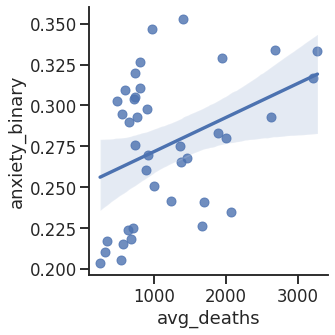

In [ ]:
sns.lmplot(x="avg_deaths", y="anxiety_binary", data=high_anxiety_phases)

In [ ]:
model_deaths = sm.GLM.from_formula("anxiety_binary ~ avg_deaths", data=high_anxiety_phases)
result = model_deaths.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0016449
Method:                          IRLS   Log-Likelihood:                 70.684
Date:                Tue, 05 Apr 2022   Deviance:                     0.060863
Time:                        02:17:42   Pearson chi2:                   0.0609
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2509      0.012     21.022      0.000       0.227       0.274
avg_deaths  2.089e-05   8.46e-06      2.470      0.014    4.31e-06    3.75e-05
==============================================================================
"""

In [ ]:
high_anxiety_phases["avg_new_vaccinations"]=avg_new_vaccinations['new_vaccinations']
high_anxiety_phases

week_number  anxiety_binary  avg_new_vaccinations
0             1        0.282830                   NaN
1             2        0.267810                   NaN
2             3        0.275267                   NaN
3             4        0.260596                   NaN
4             5        0.269410                   NaN
5             6        0.275767                   NaN
6             7        0.289665                   NaN
7             8        0.295009                   NaN
8             9        0.302872                   NaN
9            10        0.309397                   NaN
10           11        0.319497                   NaN
11           12        0.326834                   NaN
12           13        0.297573                   NaN
13           14        0.293026                   NaN
14           15        0.305180                   NaN
15           16        0.303878                   NaN
16           17        0.310884                   NaN
17           18        0.346491                   NaN
18           19        0.352904                   NaN
19           20        0.328874                   NaN
20           21        0.333568          1.961014e+05
21           22        0.333505          9.407365e+05
22           23        0.316623          1.375079e+06
23           24        0.292718          1.746481e+06
24           25        0.279923          1.892021e+06
25           26        0.265635          2.514697e+06
26           27        0.250435          2.791908e+06
27           28        0.225214          2.780112e+06
28           29        0.218010          2.114324e+06
29           30        0.215028          1.762422e+06
30           31        0.205335          1.006162e+06
31           32        0.210381          8.358997e+05
32           33        0.203690          5.221509e+05
33           34        0.216896          6.082301e+05
34           35        0.223489          7.190046e+05
35           36        0.241450          8.514922e+05
36           37        0.240848          7.134712e+05
37           38        0.234933          6.904305e+05
38           39        0.226156          8.708602e+05

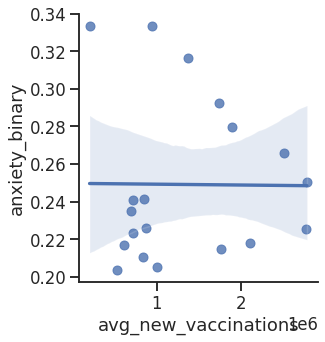

In [ ]:
sns.lmplot(x="avg_new_vaccinations", y="anxiety_binary", data=high_anxiety_phases)

In [ ]:
model_vac = sm.GLM.from_formula("anxiety_binary ~ avg_new_vaccinations", data=high_anxiety_phases)
result = model_vac.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   19
Model:                            GLM   Df Residuals:                       17
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0019215
Method:                          IRLS   Log-Likelihood:                 33.516
Date:                Tue, 05 Apr 2022   Deviance:                     0.032665
Time:                        11:05:38   Pearson chi2:                   0.0327
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2497      0.020     12.662      0.000       0.211       0.288
avg_new_vaccinations -4.416e-10   1.29e-08     -0.034      0.973   -2.58e-08    2.49e-08
========================================================================================
"""

In [ ]:
vaccination_anxiety=high_anxiety_phases[~high_anxiety_phases["avg_new_vaccinations"].isin(["NaN"])]
vaccination_anxiety

week_number  anxiety_binary  avg_positive_cases   avg_deaths  \
0             1        0.282830        27826.307692  1882.076923   
1             2        0.267810        23400.500000  1463.166667   
2             3        0.275267        22880.000000  1356.500000   
3             4        0.260596        21370.666667   894.333333   
4             5        0.269410        21361.333333   922.000000   
5             6        0.275767        20172.666667   733.833333   
6             7        0.289665        22410.500000   649.333333   
7             8        0.295009        31168.000000   555.166667   
8             9        0.302872        43022.166667   486.500000   
9            10        0.309397        51668.333333   592.166667   
10           11        0.319497        62451.666667   734.166667   
11           12        0.326834        66555.000000   809.833333   
12           13        0.297573        41590.692308   908.076923   
13           14        0.293026        37513.307692   759.000000   
14           15        0.305180        42782.000000   733.307692   
15           16        0.303878        47709.923077   717.384615   
16           17        0.310884        66542.307692   801.615385   
17           18        0.346491       108125.461538   971.307692   
18           19        0.352904       168710.461538  1402.769231   
19           20        0.328874       185442.307692  1941.846154   
20           21        0.333568       217840.230769  2678.538462   
21           22        0.333505       230205.307692  3267.846154   
22           23        0.316623       157359.538462  3210.307692   
23           24        0.292718        97930.384615  2625.384615   
24           25        0.279923        67843.230769  2001.615385   
25           26        0.265635        56494.000000  1368.692308   
26           27        0.250435        60411.230769   994.692308   
27           28        0.225214        60057.000000   709.000000   
28           29        0.218010        43922.307692   683.384615   
29           30        0.215028        28122.538462   561.692308   
30           31        0.205335        16130.153846   534.846154   
31           32        0.210381        12647.692308   319.615385   
32           33        0.203690        12560.076923   249.923077   
33           34        0.216896        74100.000000   341.000000   
34           35        0.223489       129232.846154   635.000000   
35           36        0.241450       155332.153846  1233.692308   
36           37        0.240848       154012.769231  1687.692308   
37           38        0.234933       127410.538462  2066.461538   
38           39        0.226156        94644.230769  1664.692308   

    avg_new_vaccinations  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6                    NaN  
7                    NaN  
8                    NaN  
9                    NaN  
10                   NaN  
11                   NaN  
12                   NaN  
13                   NaN  
14                   NaN  
15                   NaN  
16                   NaN  
17                   NaN  
18                   NaN  
19                   NaN  
20          1.961014e+05  
21          9.407365e+05  
22          1.375079e+06  
23          1.746481e+06  
24          1.892021e+06  
25          2.514697e+06  
26          2.791908e+06  
27          2.780112e+06  
28          2.114324e+06  
29          1.762422e+06  
30          1.006162e+06  
31          8.358997e+05  
32          5.221509e+05  
33          6.082301e+05  
34          7.190046e+05  
35          8.514922e+05  
36          7.134712e+05  
37          6.904305e+05  
38          8.708602e+05

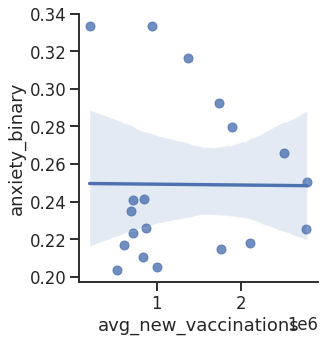

In [ ]:
sns.lmplot(x="avg_new_vaccinations", y="anxiety_binary", data=vaccination_anxiety)

In [ ]:
model = sm.GLM.from_formula("anxiety_binary ~ avg_new_vaccinations", data=high_anxiety_phases)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   19
Model:                            GLM   Df Residuals:                       17
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0019215
Method:                          IRLS   Log-Likelihood:                 33.516
Date:                Tue, 05 Apr 2022   Deviance:                     0.032665
Time:                        02:17:52   Pearson chi2:                   0.0327
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2497      0.020     12.662      0.000       0.211       0.288
avg_new_vaccinations -4.416e-10   1.29e-08     -0.034      0.973   -2.58e-08    2.49e-08
========================================================================================
"""

In [ ]:
high_anxiety_phases

week_number  anxiety_binary  avg_positive_cases   avg_deaths  \
0             1        0.282830        27826.307692  1882.076923   
1             2        0.267810        23400.500000  1463.166667   
2             3        0.275267        22880.000000  1356.500000   
3             4        0.260596        21370.666667   894.333333   
4             5        0.269410        21361.333333   922.000000   
5             6        0.275767        20172.666667   733.833333   
6             7        0.289665        22410.500000   649.333333   
7             8        0.295009        31168.000000   555.166667   
8             9        0.302872        43022.166667   486.500000   
9            10        0.309397        51668.333333   592.166667   
10           11        0.319497        62451.666667   734.166667   
11           12        0.326834        66555.000000   809.833333   
12           13        0.297573        41590.692308   908.076923   
13           14        0.293026        37513.307692   759.000000   
14           15        0.305180        42782.000000   733.307692   
15           16        0.303878        47709.923077   717.384615   
16           17        0.310884        66542.307692   801.615385   
17           18        0.346491       108125.461538   971.307692   
18           19        0.352904       168710.461538  1402.769231   
19           20        0.328874       185442.307692  1941.846154   
20           21        0.333568       217840.230769  2678.538462   
21           22        0.333505       230205.307692  3267.846154   
22           23        0.316623       157359.538462  3210.307692   
23           24        0.292718        97930.384615  2625.384615   
24           25        0.279923        67843.230769  2001.615385   
25           26        0.265635        56494.000000  1368.692308   
26           27        0.250435        60411.230769   994.692308   
27           28        0.225214        60057.000000   709.000000   
28           29        0.218010        43922.307692   683.384615   
29           30        0.215028        28122.538462   561.692308   
30           31        0.205335        16130.153846   534.846154   
31           32        0.210381        12647.692308   319.615385   
32           33        0.203690        12560.076923   249.923077   
33           34        0.216896        74100.000000   341.000000   
34           35        0.223489       129232.846154   635.000000   
35           36        0.241450       155332.153846  1233.692308   
36           37        0.240848       154012.769231  1687.692308   
37           38        0.234933       127410.538462  2066.461538   
38           39        0.226156        94644.230769  1664.692308   

    avg_new_vaccinations  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6                    NaN  
7                    NaN  
8                    NaN  
9                    NaN  
10                   NaN  
11                   NaN  
12                   NaN  
13                   NaN  
14                   NaN  
15                   NaN  
16                   NaN  
17                   NaN  
18                   NaN  
19                   NaN  
20          1.961014e+05  
21          9.407365e+05  
22          1.375079e+06  
23          1.746481e+06  
24          1.892021e+06  
25          2.514697e+06  
26          2.791908e+06  
27          2.780112e+06  
28          2.114324e+06  
29          1.762422e+06  
30          1.006162e+06  
31          8.358997e+05  
32          5.221509e+05  
33          6.082301e+05  
34          7.190046e+05  
35          8.514922e+05  
36          7.134712e+05  
37          6.904305e+05  
38          8.708602e+05

## General Depression

In [ ]:
high_depression_phases = phases.groupby("week_number")["dep_binary"].apply(get_proportion, nums=2).reset_index()

In [ ]:
high_depression_phases["avg_positive_cases"]=avg_positive_cases['new_cases']
high_depression_phases["avg_deaths"]=avg_death['new_deaths']
high_depression_phases["avg_new_vaccinations"]=avg_new_vaccinations['new_vaccinations']
high_depression_phases["avg_n_cases"]=avg_n_cases['negativeIncrease']
high_depression_phases['avg_current_hospitalizations']=avg_current_hospitalizations['hospitalizedCurrently']

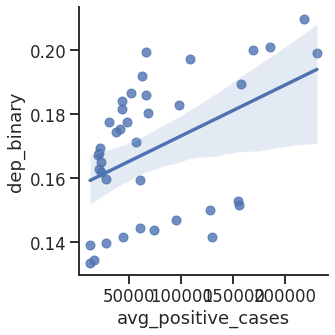

In [ ]:
sns.lmplot(x="avg_positive_cases", y="dep_binary", data=high_depression_phases)

In [ ]:
model = sm.GLM.from_formula("dep_binary ~ avg_positive_cases", data=high_depression_phases)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             dep_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      0.00037839
Method:                          IRLS   Log-Likelihood:                 99.340
Date:                Tue, 05 Apr 2022   Deviance:                     0.014000
Time:                        02:18:03   Pearson chi2:                   0.0140
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1573      0.005     31.284      0.000       0.147       0.167
avg_positive_cases  1.597e-07   5.29e-08      3.018      0.003     5.6e-08    2.63e-07
======================================================================================
"""

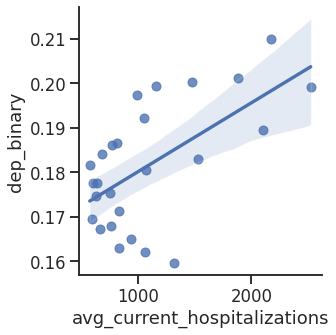

In [ ]:
sns.lmplot(x="avg_current_hospitalizations", y="dep_binary", data=high_depression_phases)

In [ ]:
model = sm.GLM.from_formula("dep_binary ~ avg_current_hospitalizations", data=high_depression_phases)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             dep_binary   No. Observations:                   26
Model:                            GLM   Df Residuals:                       24
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      0.00012974
Method:                          IRLS   Log-Likelihood:                 80.498
Date:                Tue, 05 Apr 2022   Deviance:                    0.0031137
Time:                        02:18:06   Pearson chi2:                  0.00311
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.1646      0.005     32.314      0.000       0.155       0.175
avg_current_hospitalizations  1.548e-05   4.19e-06      3.693      0.000    7.27e-06    2.37e-05
================================================================================================
"""

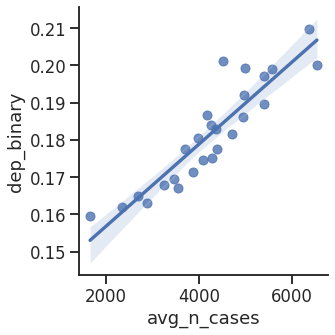

In [ ]:
sns.lmplot(x="avg_n_cases", y="dep_binary", data=high_depression_phases)

In [ ]:
model = sm.GLM.from_formula("dep_binary ~ avg_n_cases", data=high_depression_phases)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             dep_binary   No. Observations:                   26
Model:                            GLM   Df Residuals:                       24
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      3.4681e-05
Method:                          IRLS   Log-Likelihood:                 97.649
Date:                Tue, 05 Apr 2022   Deviance:                   0.00083233
Time:                        02:18:09   Pearson chi2:                 0.000832
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1346      0.004     29.951      0.000       0.126       0.143
avg_n_cases  1.106e-05   1.02e-06     10.807      0.000    9.05e-06    1.31e-05
===============================================================================
"""

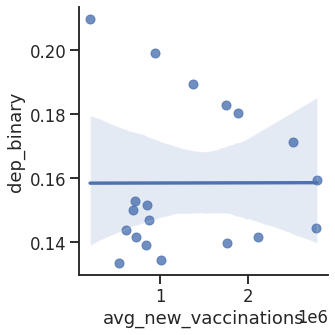

In [ ]:
sns.lmplot(x="avg_new_vaccinations", y="dep_binary", data=high_depression_phases)

In [ ]:
model = sm.GLM.from_formula("dep_binary ~ avg_new_vaccinations", data=high_depression_phases)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             dep_binary   No. Observations:                   19
Model:                            GLM   Df Residuals:                       17
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      0.00057108
Method:                          IRLS   Log-Likelihood:                 45.043
Date:                Tue, 05 Apr 2022   Deviance:                    0.0097084
Time:                        02:18:12   Pearson chi2:                  0.00971
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1585      0.011     14.736      0.000       0.137       0.180
avg_new_vaccinations  5.756e-11   7.05e-09      0.008      0.993   -1.38e-08    1.39e-08
========================================================================================
"""

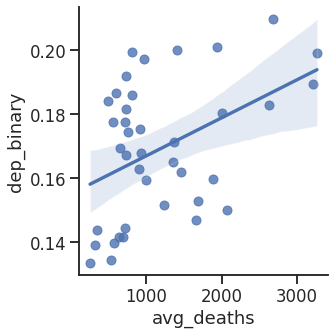

In [ ]:
sns.lmplot(x="avg_deaths", y="dep_binary", data=high_depression_phases)

In [ ]:
model = sm.GLM.from_formula("dep_binary ~ avg_deaths", data=high_depression_phases)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             dep_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      0.00038398
Method:                          IRLS   Log-Likelihood:                 99.054
Date:                Tue, 05 Apr 2022   Deviance:                     0.014207
Time:                        02:18:16   Pearson chi2:                   0.0142
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1552      0.006     26.914      0.000       0.144       0.166
avg_deaths  1.187e-05   4.09e-06      2.904      0.004    3.86e-06    1.99e-05
==============================================================================
"""

## Gender Anxiety

In [ ]:
female_phases=phases[phases["EGENDER"].isin([2])]
female_phases

SCRAM  WEEK  EST_ST  TBIRTH_YEAR  EGENDER  \
0        V010000001S10011099370111     1      47         1986        2   
2        V010000001S18010744940111     1      26         1976        2   
4        V010000001S37010480340111     1       1         1963        2   
5        V010000001S37010662140111     1       1         1976        2   
6        V010000001S51010245800111     1       1         1983        2   
...                            ...   ...     ...          ...      ...   
3131695  V399950006S12560033010012    39      56         1968        2   
3131698  V399950006S31560840200012    39      56         1973        2   
3131700  V399950006S50560830100012    39      46         1975        2   
3131702  V399950006S92560082500012    39      56         1944        2   
3131703  V399950006S92560347110022    39      27         1958        2   

         RHISPANIC  RRACE  ANXIOUS  WORRY  DOWN  INTEREST  week_number  \
0                1      1        4      3     1         1            1   
2                1      4        1      1     1         1            1   
4                1      1        2      1     2         2            1   
5                1      1        3      2     2         2            1   
6                1      2        1      1     1         1            1   
...            ...    ...      ...    ...   ...       ...          ...   
3131695          1      1        2      2     1         2           39   
3131698          1      1        2      2     2         1           39   
3131700          1      1        1      1     1         1           39   
3131702          1      1        2      3     3         2           39   
3131703          1      1        1      1     1         1           39   

         anxiety_binary  dep_binary  
0                     2           1  
2                     1           1  
4                     1           1  
5                     2           1  
6                     1           1  
...                 ...         ...  
3131695               1           1  
3131698               1           1  
3131700               1           1  
3131702               1           2  
3131703               1           1  

[1614088 rows x 14 columns]

In [ ]:
female_high_anxiety = female_phases.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
female_high_anxiety

week_number  anxiety_binary
0             1        0.326536
1             2        0.307873
2             3        0.314273
3             4        0.297474
4             5        0.307143
5             6        0.311868
6             7        0.323444
7             8        0.327615
8             9        0.337436
9            10        0.342791
10           11        0.356924
11           12        0.366839
12           13        0.340519
13           14        0.333582
14           15        0.345430
15           16        0.345240
16           17        0.351670
17           18        0.389953
18           19        0.401402
19           20        0.372923
20           21        0.375696
21           22        0.373928
22           23        0.350344
23           24        0.325814
24           25        0.311243
25           26        0.298931
26           27        0.280196
27           28        0.259295
28           29        0.250105
29           30        0.245146
30           31        0.236231
31           32        0.240594
32           33        0.232435
33           34        0.246065
34           35        0.258614
35           36        0.280442
36           37        0.277196
37           38        0.269209
38           39        0.262672

In [ ]:
male_phases=phases[phases["EGENDER"].isin([1])]
male_phases

SCRAM  WEEK  EST_ST  TBIRTH_YEAR  EGENDER  \
1        V010000001S10011900470112     1       1         1955        1   
3        V010000001S37010301340112     1       1         1964        1   
7        V010000001S71011275880113     1       1         1961        1   
10       V010000001S79010103170113     1       1         1989        1   
12       V010000002S01021474150113     1       2         1954        1   
...                            ...   ...     ...          ...      ...   
3131693  V399950005S97550081800012    39      55         1956        1   
3131696  V399950006S12560254200012    39       8         1983        1   
3131697  V399950006S12560750300022    39      56         1939        1   
3131699  V399950006S50560307700022    39      56         1941        1   
3131704  V399950006S92560770500022    39      56         1952        1   

         RHISPANIC  RRACE  ANXIOUS  WORRY  DOWN  INTEREST  week_number  \
1                1      1        3      4     4         4            1   
3                1      1        4      4     4         4            1   
7                1      1        1      1     1         1            1   
10               1      1        2      1     2         2            1   
12               1      1        2      2     2         2            1   
...            ...    ...      ...    ...   ...       ...          ...   
3131693          1      1        1      1     1         1           39   
3131696          1      1        3      3     3         2           39   
3131697          1      1        1      1     1         1           39   
3131699          1      1        1      1     1         1           39   
3131704          1      1        1      1     1         1           39   

         anxiety_binary  dep_binary  
1                     2           2  
3                     2           2  
7                     1           1  
10                    1           1  
12                    1           1  
...                 ...         ...  
3131693               1           1  
3131696               2           2  
3131697               1           1  
3131699               1           1  
3131704               1           1  

[1105780 rows x 14 columns]

In [ ]:
male_high_anxiety = male_phases.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
male_high_anxiety

week_number  anxiety_binary
0             1        0.215932
1             2        0.210925
2             3        0.219919
3             4        0.209197
4             5        0.214931
5             6        0.222670
6             7        0.239637
7             8        0.245717
8             9        0.251502
9            10        0.260449
10           11        0.264645
11           12        0.268154
12           13        0.236341
13           14        0.235925
14           15        0.247790
15           16        0.245378
16           17        0.252459
17           18        0.282634
18           19        0.277687
19           20        0.264229
20           21        0.270498
21           22        0.271615
22           23        0.266074
23           24        0.244220
24           25        0.233508
25           26        0.217131
26           27        0.207329
27           28        0.175292
28           29        0.171895
29           30        0.170790
30           31        0.160901
31           32        0.166623
32           33        0.162060
33           34        0.173839
34           35        0.171599
35           36        0.183185
36           37        0.187621
37           38        0.184975
38           39        0.174285

In [ ]:
female_high_anxiety["avg_positive_cases"]=avg_positive_cases['new_cases']
female_high_anxiety["avg_deaths"]=avg_death['new_deaths']
female_high_anxiety["avg_new_vaccinations"]=avg_new_vaccinations['new_vaccinations']
female_high_anxiety["avg_n_cases"]=avg_n_cases['negativeIncrease']
female_high_anxiety['avg_current_hospitalizations']=avg_current_hospitalizations['hospitalizedCurrently']

In [ ]:
male_high_anxiety["avg_positive_cases"]=avg_positive_cases['new_cases']
male_high_anxiety["avg_deaths"]=avg_death['new_deaths']
male_high_anxiety["avg_new_vaccinations"]=avg_new_vaccinations['new_vaccinations']
male_high_anxiety["avg_n_cases"]=avg_n_cases['negativeIncrease']
male_high_anxiety['avg_current_hospitalizations']=avg_current_hospitalizations['hospitalizedCurrently']

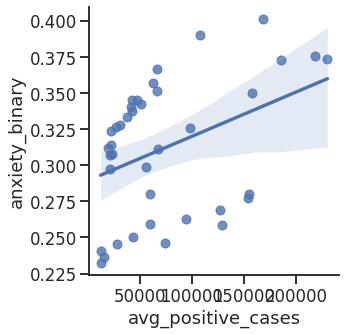

In [ ]:
sns.lmplot(x="avg_positive_cases", y="anxiety_binary", data=female_high_anxiety)

In [ ]:
model = sm.GLM.from_formula("anxiety_binary ~ avg_positive_cases", data=female_high_anxiety)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0018978
Method:                          IRLS   Log-Likelihood:                 67.895
Date:                Tue, 05 Apr 2022   Deviance:                     0.070220
Time:                        02:18:42   Pearson chi2:                   0.0702
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2893      0.011     25.687      0.000       0.267       0.311
avg_positive_cases  3.072e-07   1.19e-07      2.592      0.010    7.49e-08     5.4e-07
======================================================================================
"""

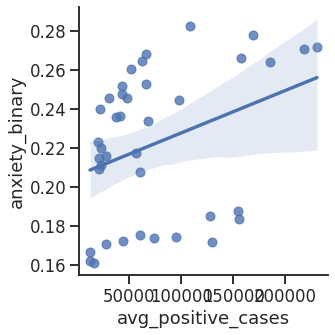

In [ ]:
sns.lmplot(x="avg_positive_cases", y="anxiety_binary", data=male_high_anxiety)

In [ ]:
model = sm.GLM.from_formula("anxiety_binary ~ avg_positive_cases", data=male_high_anxiety)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0013175
Method:                          IRLS   Log-Likelihood:                 75.012
Date:                Tue, 05 Apr 2022   Deviance:                     0.048749
Time:                        02:18:45   Pearson chi2:                   0.0487
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2058      0.009     21.931      0.000       0.187       0.224
avg_positive_cases  2.181e-07   9.88e-08      2.208      0.027    2.45e-08    4.12e-07
======================================================================================
"""

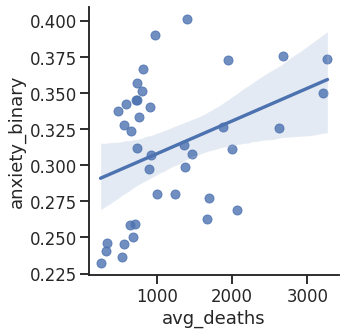

In [ ]:
sns.lmplot(x="avg_deaths", y="anxiety_binary", data=female_high_anxiety)

In [ ]:
model = sm.GLM.from_formula("anxiety_binary ~ avg_deaths", data=female_high_anxiety)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0019237
Method:                          IRLS   Log-Likelihood:                 67.631
Date:                Tue, 05 Apr 2022   Deviance:                     0.071177
Time:                        02:18:47   Pearson chi2:                   0.0712
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2854      0.013     22.114      0.000       0.260       0.311
avg_deaths  2.266e-05   9.15e-06      2.476      0.013    4.72e-06    4.06e-05
==============================================================================
"""

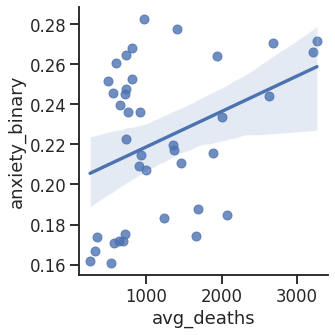

In [ ]:
sns.lmplot(x="avg_deaths", y="anxiety_binary", data=male_high_anxiety)

In [ ]:
model = sm.GLM.from_formula("anxiety_binary ~ avg_deaths", data=male_high_anxiety)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0012980
Method:                          IRLS   Log-Likelihood:                 75.302
Date:                Wed, 26 Jan 2022   Deviance:                     0.048028
Time:                        22:37:53   Pearson chi2:                   0.0480
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2012      0.011     18.978      0.000       0.180       0.222
avg_deaths  1.763e-05   7.52e-06      2.346      0.019     2.9e-06    3.24e-05
==============================================================================
"""

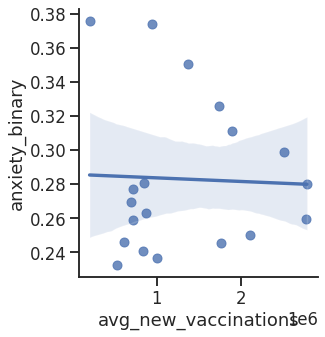

In [ ]:
sns.lmplot(x="avg_new_vaccinations", y="anxiety_binary", data=female_high_anxiety)

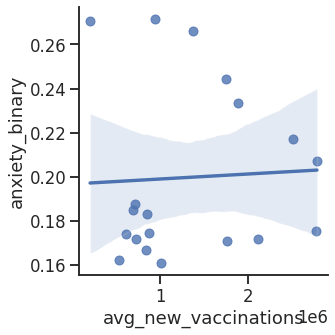

In [ ]:
sns.lmplot(x="avg_new_vaccinations", y="anxiety_binary", data=male_high_anxiety)

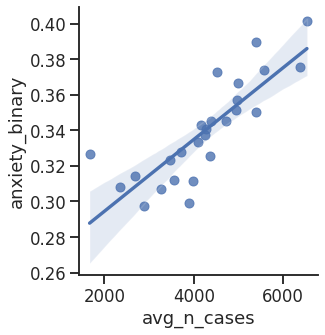

In [ ]:
sns.lmplot(x="avg_n_cases", y="anxiety_binary", data=female_high_anxiety)

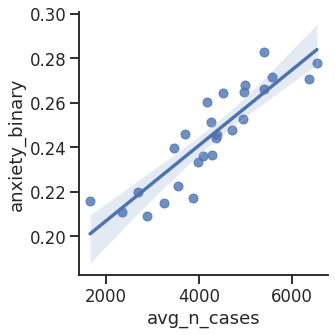

In [ ]:
sns.lmplot(x="avg_n_cases", y="anxiety_binary", data=male_high_anxiety)

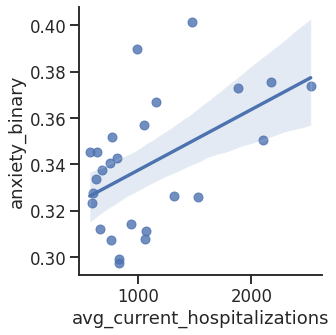

In [ ]:
sns.lmplot(x="avg_current_hospitalizations", y="anxiety_binary", data=female_high_anxiety)

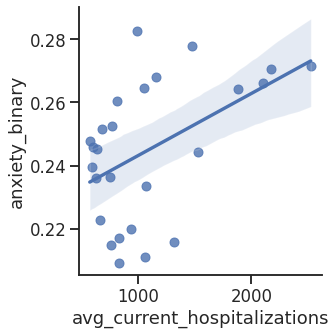

In [ ]:
sns.lmplot(x="avg_current_hospitalizations", y="anxiety_binary", data=male_high_anxiety)

## Race Anxiety



In [ ]:
phases["race_recoded"]=np.where(phases["RHISPANIC"] == 2, 5, phases["RRACE"])

In [ ]:
race1_anxiety=phases[phases["race_recoded"].isin([1])]
race2_anxiety=phases[phases["race_recoded"].isin([2])]
race3_anxiety=phases[phases["race_recoded"].isin([3])]
race4_anxiety=phases[phases["race_recoded"].isin([4])]
race5_anxiety=phases[phases["race_recoded"].isin([5])]

In [ ]:
high_anxiety_race1 = race1_anxiety.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
high_anxiety_race2 = race2_anxiety.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
high_anxiety_race3 = race3_anxiety.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
high_anxiety_race4 = race4_anxiety.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()
high_anxiety_race5 = race5_anxiety.groupby("week_number")["anxiety_binary"].apply(get_proportion, nums=2).reset_index()

In [ ]:
def relationshipDf (df):
  df["avg_positive_cases"]=avg_positive_cases['new_cases']
  df["avg_deaths"]=avg_death['new_deaths']
  df["avg_new_vaccinations"]=avg_new_vaccinations['new_vaccinations']
  df["avg_n_cases"]=avg_n_cases['negativeIncrease']
  df['avg_current_hospitalizations']=avg_current_hospitalizations['hospitalizedCurrently']

In [ ]:
relationshipDf(high_anxiety_race1)
relationshipDf(high_anxiety_race2)
relationshipDf(high_anxiety_race3)
relationshipDf(high_anxiety_race4)
relationshipDf(high_anxiety_race5)

In [ ]:
high_anxiety_race1

week_number  anxiety_binary  avg_positive_cases   avg_deaths  \
0             1        0.276277        27826.307692  1882.076923   
1             2        0.257032        23400.500000  1463.166667   
2             3        0.267343        22880.000000  1356.500000   
3             4        0.252476        21370.666667   894.333333   
4             5        0.259889        21361.333333   922.000000   
5             6        0.267904        20172.666667   733.833333   
6             7        0.280068        22410.500000   649.333333   
7             8        0.285405        31168.000000   555.166667   
8             9        0.294010        43022.166667   486.500000   
9            10        0.301158        51668.333333   592.166667   
10           11        0.311042        62451.666667   734.166667   
11           12        0.319431        66555.000000   809.833333   
12           13        0.294356        41590.692308   908.076923   
13           14        0.289674        37513.307692   759.000000   
14           15        0.302467        42782.000000   733.307692   
15           16        0.300960        47709.923077   717.384615   
16           17        0.307609        66542.307692   801.615385   
17           18        0.343353       108125.461538   971.307692   
18           19        0.350409       168710.461538  1402.769231   
19           20        0.323096       185442.307692  1941.846154   
20           21        0.328871       217840.230769  2678.538462   
21           22        0.330746       230205.307692  3267.846154   
22           23        0.310792       157359.538462  3210.307692   
23           24        0.286381        97930.384615  2625.384615   
24           25        0.270781        67843.230769  2001.615385   
25           26        0.257739        56494.000000  1368.692308   
26           27        0.241213        60411.230769   994.692308   
27           28        0.216436        60057.000000   709.000000   
28           29        0.210995        43922.307692   683.384615   
29           30        0.205887        28122.538462   561.692308   
30           31        0.196013        16130.153846   534.846154   
31           32        0.200472        12647.692308   319.615385   
32           33        0.192114        12560.076923   249.923077   
33           34        0.208884        74100.000000   341.000000   
34           35        0.215789       129232.846154   635.000000   
35           36        0.237216       155332.153846  1233.692308   
36           37        0.236041       154012.769231  1687.692308   
37           38        0.230137       127410.538462  2066.461538   
38           39        0.220854        94644.230769  1664.692308   

    avg_new_vaccinations  avg_n_cases  avg_current_hospitalizations  
0                    NaN  1667.247360                   1315.435897  
1                    NaN  2351.156863                   1056.678832  
2                    NaN  2687.591503                    938.728261  
3                    NaN  2890.310458                    827.519573  
4                    NaN  3256.947712                    756.269504  
5                    NaN  3545.264706                    661.222222  
6                    NaN  3463.290850                    595.569444  
7                    NaN  3704.967320                    598.961806  
8                    NaN  4252.441176                    685.454861  
9                    NaN  4170.091503                    812.350694  
10                   NaN  4969.506536                   1052.367347  
11                   NaN  4995.928105                   1157.983333  
12                   NaN  4279.755656                    752.803922  
13                   NaN  4092.618401                    629.349925  
14                   NaN  4720.280543                    573.119155  
15                   NaN  4385.950226                    635.220877  
16                   NaN  4945.473605                    766.203620  
17                   Na

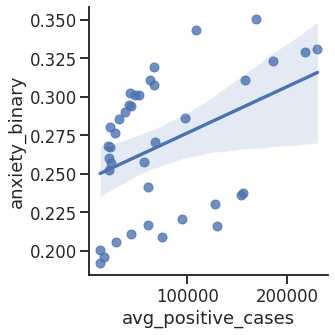

In [ ]:
sns.lmplot(x="avg_positive_cases", y="anxiety_binary", data=high_anxiety_race1)

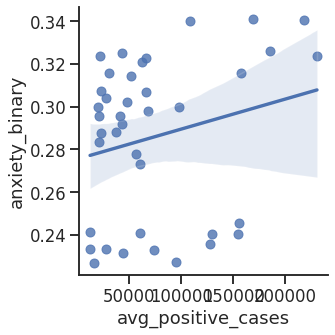

In [ ]:
sns.lmplot(x="avg_positive_cases", y="anxiety_binary", data=high_anxiety_race2)

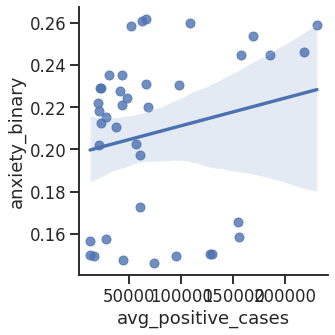

In [ ]:
sns.lmplot(x="avg_positive_cases", y="anxiety_binary", data=high_anxiety_race3)

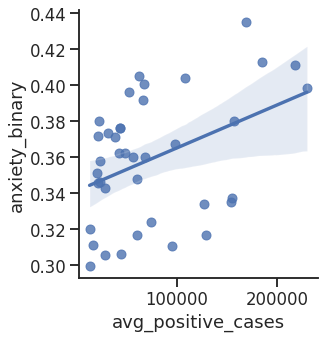

In [ ]:
sns.lmplot(x="avg_positive_cases", y="anxiety_binary", data=high_anxiety_race4)

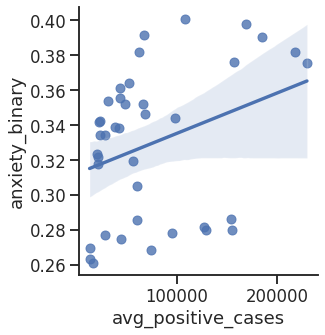

In [ ]:
sns.lmplot(x="avg_positive_cases", y="anxiety_binary", data=high_anxiety_race5)

In [ ]:
model = sm.GLM.from_formula("anxiety_binary ~ avg_positive_cases", data=high_anxiety_race1)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0017086
Method:                          IRLS   Log-Likelihood:                 69.944
Date:                Thu, 27 Jan 2022   Deviance:                     0.063218
Time:                        00:58:11   Pearson chi2:                   0.0632
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2463      0.011     23.051      0.000       0.225       0.267
avg_positive_cases  3.011e-07   1.12e-07      2.677      0.007    8.07e-08    5.21e-07
======================================================================================
"""

In [ ]:
model = sm.GLM.from_formula("anxiety_binary ~ avg_positive_cases", data=high_anxiety_race2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0013660
Method:                          IRLS   Log-Likelihood:                 74.307
Date:                Thu, 27 Jan 2022   Deviance:                     0.050543
Time:                        00:58:14   Pearson chi2:                   0.0505
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2754      0.010     28.822      0.000       0.257       0.294
avg_positive_cases  1.409e-07   1.01e-07      1.401      0.161   -5.62e-08    3.38e-07
======================================================================================
"""

In [ ]:
model = sm.GLM.from_formula("anxiety_binary ~ avg_positive_cases", data=high_anxiety_race3)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0015466
Method:                          IRLS   Log-Likelihood:                 71.886
Date:                Thu, 27 Jan 2022   Deviance:                     0.057225
Time:                        00:58:19   Pearson chi2:                   0.0572
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1981      0.010     19.489      0.000       0.178       0.218
avg_positive_cases  1.314e-07   1.07e-07      1.228      0.220   -7.83e-08    3.41e-07
======================================================================================
"""

In [ ]:
model = sm.GLM.from_formula("anxiety_binary ~ avg_positive_cases", data=high_anxiety_race4)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0010391
Method:                          IRLS   Log-Likelihood:                 79.642
Date:                Thu, 27 Jan 2022   Deviance:                     0.038445
Time:                        00:58:18   Pearson chi2:                   0.0384
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3412      0.008     40.949      0.000       0.325       0.358
avg_positive_cases  2.383e-07   8.77e-08      2.717      0.007    6.64e-08     4.1e-07
======================================================================================
"""

In [ ]:
model = sm.GLM.from_formula("anxiety_binary ~ avg_positive_cases", data=high_anxiety_race5)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         anxiety_binary   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0016781
Method:                          IRLS   Log-Likelihood:                 70.294
Date:                Thu, 27 Jan 2022   Deviance:                     0.062091
Time:                        00:58:17   Pearson chi2:                   0.0621
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3123      0.011     29.488      0.000       0.292       0.333
avg_positive_cases  2.301e-07   1.11e-07      2.064      0.039    1.16e-08    4.49e-07
======================================================================================
"""

# GeoPandas

In [ ]:
map = f"{base_dir}/Data/s_11au16/s_11au16.shp"
usa = gpd.read_file(map)

In [ ]:
usa = usa.iloc[:-1, :]

In [ ]:
usa = usa[~usa["NAME"].isin(["Northern Marianas", "Virgin Islands", "Guam", "Puerto Rico", "American Samoa", "Hawaii", "Alaska"])]

In [ ]:
usa

STATE  ...                                           geometry
1     AL  ...  MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...
2     AR  ...  POLYGON ((-91.62986 36.49921, -91.62849 36.499...
4     AZ  ...  POLYGON ((-110.49090 37.00361, -110.48750 37.0...
5     CA  ...  MULTIPOLYGON (((-118.42620 32.79973, -118.4263...
6     CO  ...  POLYGON ((-106.87560 41.00301, -106.85850 41.0...
7     CT  ...  MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ...
8     DC  ...  MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ...
9     DE  ...  MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ...
10    FL  ...  MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ...
11    GA  ...  MULTIPOLYGON (((-81.49619 30.73234, -81.49648 ...
13    IA  ...  MULTIPOLYGON (((-96.51620 43.04041, -96.51900 ...
14    ID  ...  POLYGON ((-116.06000 49.00081, -116.04919 49.0...
15    IL  ...  POLYGON ((-90.64000 42.50841, -90.63660 42.508...
16    IN  ...  POLYGON ((-86.08849 41.76071, -86.06750 41.760...
17    KS  ...  POLYGON ((-101.87420 40.00311, -101.86520 40.0...
18    KY  ...  MULTIPOLYGON (((-89.48360 36.50021, -89.48499 ...
19    LA  ...  MULTIPOLYGON (((-89.41367 28.92076, -89.41422 ...
20    MA  ...  MULTIPOLYGON (((-70.81094 41.26176, -70.81018 ...
21    ME  ...  MULTIPOLYGON (((-70.42468 43.36591, -70.42200 ...
22    MI  ...  MULTIPOLYGON (((-83.43458 41.73714, -83.43464 ...
23    MN  ...  MULTIPOLYGON (((-92.20329 46.70404, -92.20239 ...
24    MS  ...  MULTIPOLYGON (((-88.62128 30.35913, -88.62421 ...
25    MT  ...  POLYGON ((-114.32130 49.00081, -114.26040 49.0...
26    NC  ...  MULTIPOLYGON (((-77.50814 34.45068, -77.50844 ...
27    ND  ...  POLYGON ((-97.23270 48.99921, -97.23390 48.996...
28    NE  ...  POLYGON ((-103.96180 43.00156, -103.96079 43.0...
29    NH  ...  POLYGON ((-71.08420 45.30531, -71.08210 45.288...
30    NJ  ...  MULTIPOLYGON (((-74.90399 38.95216, -74.90373 ...
31    NM  ...  POLYGON ((-108.37560 36.99951, -108.35719 36.9...
32    NV  ...  POLYGON ((-114.81620 42.00201, -114.80900 42.0...
33    NY  ...  MULTIPOLYGON (((-73.72681 40.59421, -73.72669 ...
34    OH  ...  MULTIPOLYGON (((-82.65704 41.43713, -82.65740 ...
35    OK  ...  POLYGON ((-100.08950 37.00231, -100.05299 37.0...
36    OR  ...  MULTIPOLYGON (((-124.21268 42.00535, -124.2131...
37    PA  ...  MULTIPOLYGON (((-79.76220 42.26891, -79.76200 ...
39    RI  ...  MULTIPOLYGON (((-71.56863 41.22551, -71.56779 ...
40    SD  ...  POLYGON ((-102.64259 45.94541, -102.63840 45.9...
41    TN  ...  POLYGON ((-88.04480 36.67801, -88.02460 36.677...
42    TX  ...  MULTIPOLYGON (((-97.19970 25.99932, -97.19998 ...
43    UT  ...  POLYGON ((-111.04929 42.00161, -111.04680 42.0...
44    VA  ...  MULTIPOLYGON (((-77.92809 39.19681, -77.92400 ...
46    VT  ...  POLYGON ((-72.83210 45.01641, -72.82570 45.016...
47    WA  ...  MULTIPOLYGON (((-123.34106 46.15892, -123.3413...
48    WI  ...  MULTIPOLYGON (((-87.81677 42.59232, -87.81697 ...
49    WV  ...  POLYGON ((-80.52020 40.63791, -80.51900 40.634...
50    WY  ...  POLYGON ((-109.10339 45.00591, -109.08920 45.0...
51    MO  ...  POLYGON ((-91.72970 40.61361, -91.72010 40.601...
52    SC  ...  MULTIPOLYGON (((-82.38064 35.20132, -82.37949 ...
55    MD  ...  MULTIPOLYGON (((-75.88359 37.90867, -75.88402 ...

[49 rows x 6 columns]

In [ ]:
map_phases=pd.concat([phase1[["SCRAM","WEEK", "EST_ST", "TBIRTH_YEAR", "EGENDER", "RHISPANIC", "RRACE", "ANXIOUS", "WORRY", "DOWN", "INTEREST", "week_number"]], phase2[["SCRAM","WEEK", "EST_ST", "TBIRTH_YEAR", "EGENDER", "RHISPANIC", "RRACE", "ANXIOUS", "WORRY", "DOWN", "INTEREST", "week_number"]]],ignore_index=True, axis=0)

In [ ]:
phase3_2['EGENDER']=phase3_2['EGENID_BIRTH']

In [ ]:
map_phases=pd.concat([map_phases, phase3[["SCRAM","WEEK", "EST_ST", "TBIRTH_YEAR", "EGENDER", "RHISPANIC", "RRACE", "ANXIOUS", "WORRY", "DOWN", "INTEREST", "week_number"]], phase3_1[["SCRAM","WEEK", "EST_ST", "TBIRTH_YEAR", "EGENDER", "RHISPANIC", "RRACE", "ANXIOUS", "WORRY", "DOWN", "INTEREST", "week_number"]], phase3_2[["SCRAM","WEEK", "EST_ST", "TBIRTH_YEAR", "EGENDER", "RHISPANIC", "RRACE", "ANXIOUS", "WORRY", "DOWN", "INTEREST", "week_number"]]],ignore_index=True, axis=0)

In [ ]:
state_dictionary=pd.read_csv(f"{base_dir}/Data/state_dictionary.csv")
state_dictionary=state_dictionary[state_dictionary["EST_ST"]<57]
state_dictionary=state_dictionary.rename(columns={'Name': "NAME"})
state_dictionary

EST_ST                  NAME
0      1.0               Alabama
1      2.0                Alaska
2      3.0                   NaN
3      4.0               Arizona
4      5.0              Arkansas
5      6.0            California
6      7.0                   NaN
7      8.0              Colorado
8      9.0            Conneticut
9     10.0              Delaware
10    11.0  District of Columbia
11    12.0               Florida
12    13.0               Georgia
13    14.0                   NaN
14    15.0                Hawaii
15    16.0                 Idaho
16    17.0              Illinois
17    18.0               Indiana
18    19.0                  Iowa
19    20.0                Kansas
20    21.0              Kentucky
21    22.0              Lousiana
22    23.0                 Maine
23    24.0              Maryland
24    25.0         Massachusetts
25    26.0              Michigan
26    27.0             Minnesota
27    28.0           Mississippi
28    29.0              Missouri
29    30.0               Montana
30    31.0              Nebraska
31    32.0                Nevada
32    33.0         New Hampshire
33    34.0            New Jersey
34    35.0            New Mexico
35    36.0              New York
36    37.0        North Carolina
37    38.0          North Dakota
38    39.0                  Ohio
39    40.0              Oklahoma
40    41.0                Oregon
41    42.0          Pennsylvania
42    43.0                   NaN
43    44.0          Rhode Island
44    45.0        South Carolina
45    46.0          South Dakota
46    47.0             Tennessee
47    48.0                 Texas
48    49.0                  Utah
49    50.0               Vermont
50    51.0              Virginia
51    52.0                   NaN
52    53.0            Washington
53    54.0         West Virginia
54    55.0             Wisconsin
55    56.0               Wyoming

In [ ]:
usa_with_states = usa.merge(state_dictionary, on="NAME")
usa_with_states

STATE                  NAME FIPS        LON       LAT  \
0     AL               Alabama   01  -86.82676  32.79354   
1     AR              Arkansas   05  -92.43920  34.89977   
2     AZ               Arizona   04 -111.66457  34.29323   
3     CA            California   06 -119.60818  37.24537   
4     CO              Colorado   08 -105.54783  38.99855   
5     DC  District of Columbia   11  -77.01464  38.90932   
6     DE              Delaware   10  -75.50592  38.99559   
7     FL               Florida   12  -82.50934  28.67402   
8     GA               Georgia   13  -83.44848  32.65155   
9     IA                  Iowa   19  -93.50003  42.07463   
10    ID                 Idaho   16 -114.65933  44.38907   
11    IL              Illinois   17  -89.19838  40.06501   
12    IN               Indiana   18  -86.27548  39.90801   
13    KS                Kansas   20  -98.38019  38.48471   
14    KY              Kentucky   21  -85.29046  37.52668   
15    MA         Massachusetts   25  -71.81423  42.25788   
16    ME                 Maine   23  -69.22999  45.38046   
17    MI              Michigan   26  -85.43675  44.34717   
18    MN             Minnesota   27  -94.31357  46.31189   
19    MS           Mississippi   28  -89.66553  32.75201   
20    MT               Montana   30 -109.64507  47.03350   
21    NC        North Carolina   37  -79.37865  35.54369   
22    ND          North Dakota   38 -100.46935  47.44626   
23    NE              Nebraska   31  -99.81058  41.52709   
24    NH         New Hampshire   33  -71.57754  43.68556   
25    NJ            New Jersey   34  -74.66876  40.20049   
26    NM            New Mexico   35 -106.10837  34.42137   
27    NV                Nevada   32 -116.65539  39.35648   
28    NY              New York   36  -75.51491  42.94796   
29    OH                  Ohio   39  -82.79002  40.29120   
30    OK              Oklahoma   40  -97.50819  35.58345   
31    OR                Oregon   41 -120.55232  43.93589   
32    PA          Pennsylvania   42  -77.79930  40.87368   
33    RI          Rhode Island   44  -71.55579  41.67544   
34    SD          South Dakota   46 -100.23048  44.43614   
35    TN             Tennessee   47  -86.34332  35.84299   
36    TX                 Texas   48  -99.35939  31.49422   
37    UT                  Utah   49 -111.67822  39.32379   
38    VA              Virginia   51  -78.82957  37.51637   
39    VT               Vermont   50  -72.66273  44.07511   
40    WA            Washington   53 -120.43997  47.38076   
41    WI             Wisconsin   55  -90.01144  44.63725   
42    WV         West Virginia   54  -80.61372  38.64259   
43    WY               Wyoming   56 -107.55144  42.99963   
44    MO              Missouri   29  -92.38554  38.32080   
45    SC        South Carolina   45  -80.89899  33.93574   
46    MD              Maryland   24  -76.78588  39.04533   

                                             geometry  EST_ST  
0   MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...     1.0  
1   POLYGON ((-91.62986 36.49921, -91.62849 36.499...     5.0  
2   POLYGON ((-110.49090 37.00361, -110.48750 37.0...     4.0  
3   MULTIPOLYGON (((-118.42620 32.79973, -118.4263...     6.0  
4   POLYGON ((-106.87560 41.00301, -106.85850 41.0...     8.0  
5   MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ...    11.0  
6   MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ...    10.0  
7   MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ...    12.0  
8   MULTIPOLYGON (((-81.49619 30.73234, -81.49648 ...    13.0  
9   MULTIPOLYGON (((-96.51620 43.04041, -96.51900 ...    19.0  
10  POLYGON ((-116.06000 49.00081, -116.04919 49.0...    16.0  
11  POLYGON ((-90.64000 42.50841, -90.63660 42.508...    17.0  
12  POLYGON ((-86.08849 41.76071, -86.06750 41.760...    18.0  
13  POLYGON ((-101.87420 40.00311, -101.86520 40.0...    20.0  
14  MULTIPOLYGON (((-89.48360 36.50021, -89.48499 ...    21.0  
15  MULTIPOLYGON (((-70.81094 41.26176, -70.81018 ...    25.0  
16  MULTIPOLYGON (((-70.42468 43.3

In [ ]:
map_phases=map_phases[~map_phases["ANXIOUS"].isin([-99,-88])]

In [ ]:
map_phases=map_phases[~map_phases["DOWN"].isin([-99,-88])]

In [ ]:
map_anxiety=map_phases.groupby("EST_ST")["ANXIOUS"].mean().reset_index()
map_anxiety

EST_ST   ANXIOUS
0        1  2.017696
1        2  2.059780
2        4  2.029080
3        5  2.076227
4        6  2.121580
5        8  2.068721
6        9  2.044923
7       10  1.971541
8       11  2.102314
9       12  2.040015
10      13  2.029882
11      15  1.979213
12      16  1.993918
13      17  2.083955
14      18  2.030955
15      19  1.961671
16      20  2.005222
17      21  2.077261
18      22  2.128451
19      23  2.049600
20      24  2.018833
21      25  2.066153
22      26  2.005818
23      27  1.983295
24      28  2.054069
25      29  2.038898
26      30  1.998627
27      31  1.945044
28      32  2.084775
29      33  1.967921
30      34  2.050503
31      35  2.097910
32      36  2.125154
33      37  2.015554
34      38  1.881412
35      39  2.025109
36      40  2.089645
37      41  2.208701
38      42  2.064762
39      44  2.041582
40      45  1.964974
41      46  1.903593
42      47  2.048990
43      48  2.048851
44      49  2.027212
45      50  2.038552
46      51  1.984570
47      53  2.099842
48      54  2.086498
49      55  1.981608
50      56  1.948463

In [ ]:
usa_with_data = usa_with_states.merge(map_anxiety, on="EST_ST")
usa_with_data = usa_with_data.to_crs(epsg=3857)

In [ ]:
usa_with_data.head()

STATE        NAME FIPS        LON       LAT  \
0    AL     Alabama   01  -86.82676  32.79354   
1    AR    Arkansas   05  -92.43920  34.89977   
2    AZ     Arizona   04 -111.66457  34.29323   
3    CA  California   06 -119.60818  37.24537   
4    CO    Colorado   08 -105.54783  38.99855   

                                            geometry  EST_ST   ANXIOUS  
0  MULTIPOLYGON (((-9808372.292 3536874.059, -980...     1.0  2.017696  
1  POLYGON ((-10200189.806 4369531.410, -10200037...     5.0  2.076227  
2  POLYGON ((-12299790.517 4439610.338, -12299411...     4.0  2.029080  
3  MULTIPOLYGON (((-13183144.615 3868750.879, -13...     6.0  2.121580  
4  POLYGON ((-11897336.824 5012786.181, -11895433...     8.0  2.068721

(-14210290.93088609, -7131036.8177457, 2640830.4762060214, 6517226.2272781925)

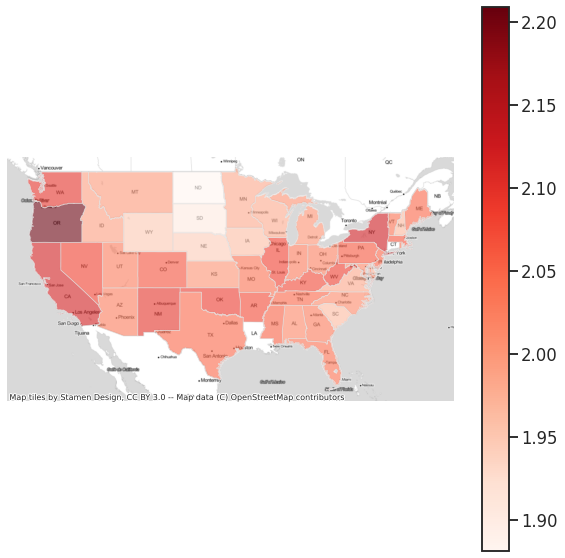

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
usa_with_data.plot(column="ANXIOUS", cmap="Reds", linewidth=0.9, ax=ax, edgecolor='0.9', alpha=0.6, legend=True)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) # see https://contextily.readthedocs.io/en/latest/providers_deepdive.html
ax.axis("off")

In [ ]:
map_depression=map_phases.groupby("EST_ST")["DOWN"].mean().reset_index()
map_depression

EST_ST      DOWN
0        1  1.749770
1        2  1.732962
2        4  1.735393
3        5  1.790300
4        6  1.791294
5        8  1.721909
6        9  1.696381
7       10  1.670586
8       11  1.717813
9       12  1.730814
10      13  1.720890
11      15  1.703480
12      16  1.688907
13      17  1.742734
14      18  1.732356
15      19  1.666860
16      20  1.701466
17      21  1.773391
18      22  1.832463
19      23  1.686931
20      24  1.694564
21      25  1.691023
22      26  1.701786
23      27  1.635378
24      28  1.799530
25      29  1.727216
26      30  1.676549
27      31  1.665898
28      32  1.801077
29      33  1.647746
30      34  1.717531
31      35  1.789356
32      36  1.773736
33      37  1.690676
34      38  1.614590
35      39  1.726436
36      40  1.786680
37      41  1.836420
38      42  1.735211
39      44  1.688167
40      45  1.680117
41      46  1.617037
42      47  1.751188
43      48  1.747181
44      49  1.712579
45      50  1.690702
46      51  1.672079
47      53  1.756034
48      54  1.808479
49      55  1.667979
50      56  1.681249

In [ ]:
usa_with_data_d = usa_with_states.merge(map_depression, on="EST_ST")
usa_with_data_d = usa_with_data_d.to_crs(epsg=3857)

(-14210290.93088609, -7131036.8177457, 2640830.4762060214, 6517226.2272781925)

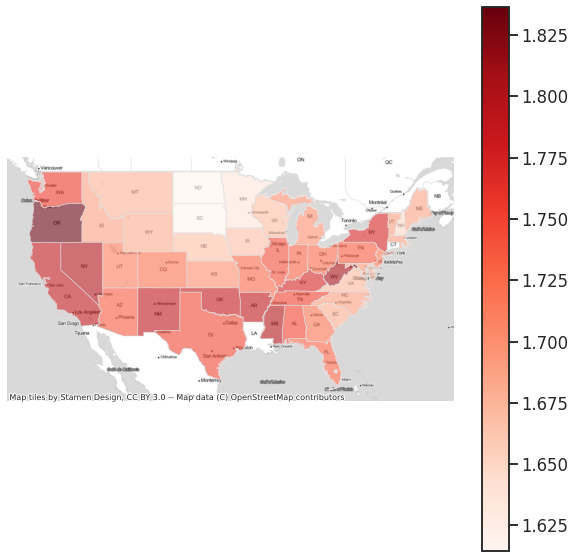

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
usa_with_data_d.plot(column="DOWN", cmap="Reds", linewidth=0.9, ax=ax, edgecolor='0.9', alpha=0.6, legend=True)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) # see https://contextily.readthedocs.io/en/latest/providers_deepdive.html
ax.axis("off")

# Machine Learning

In [ ]:
machine_data=map_phases
machine_data

SCRAM  WEEK  EST_ST  TBIRTH_YEAR  EGENDER  \
0        V010000001S10011099370111     1      47         1986        2   
1        V010000001S10011900470112     1       1         1955        1   
2        V010000001S18010744940111     1      26         1976        2   
3        V010000001S37010301340112     1       1         1964        1   
4        V010000001S37010480340111     1       1         1963        2   
...                            ...   ...     ...          ...      ...   
3131700  V399950006S50560830100012    39      46         1975        2   
3131701  V399950006S52560539010022    39      56         1975        2   
3131702  V399950006S92560082500012    39      56         1944        2   
3131703  V399950006S92560347110022    39      27         1958        2   
3131704  V399950006S92560770500022    39      56         1952        1   

         RHISPANIC  RRACE  ANXIOUS  WORRY  DOWN  INTEREST  week_number  
0                1      1        4      3     1         1            1  
1                1      1        3      4     4         4            1  
2                1      4        1      1     1         1            1  
3                1      1        4      4     4         4            1  
4                1      1        2      1     2         2            1  
...            ...    ...      ...    ...   ...       ...          ...  
3131700          1      1        1      1     1         1           39  
3131701          2      1      -88    -88   -88       -88           39  
3131702          1      1        2      3     3         2           39  
3131703          1      1        1      1     1         1           39  
3131704          1      1        1      1     1         1           39  

[3131705 rows x 12 columns]

In [ ]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

In [ ]:
machine_data=machine_data[~machine_data["DOWN"].isin([-99, -88])]
machine_data=machine_data[~machine_data["ANXIOUS"].isin([-99, -88])]
machine_data

SCRAM  WEEK  EST_ST  TBIRTH_YEAR  EGENDER  \
0        V010000001S10011099370111     1      47         1986        2   
1        V010000001S10011900470112     1       1         1955        1   
2        V010000001S18010744940111     1      26         1976        2   
3        V010000001S37010301340112     1       1         1964        1   
4        V010000001S37010480340111     1       1         1963        2   
...                            ...   ...     ...          ...      ...   
3131699  V399950006S50560307700022    39      56         1941        1   
3131700  V399950006S50560830100012    39      46         1975        2   
3131702  V399950006S92560082500012    39      56         1944        2   
3131703  V399950006S92560347110022    39      27         1958        2   
3131704  V399950006S92560770500022    39      56         1952        1   

         RHISPANIC  RRACE  ANXIOUS  WORRY  DOWN  INTEREST  week_number  
0                1      1        4      3     1         1            1  
1                1      1        3      4     4         4            1  
2                1      4        1      1     1         1            1  
3                1      1        4      4     4         4            1  
4                1      1        2      1     2         2            1  
...            ...    ...      ...    ...   ...       ...          ...  
3131699          1      1        1      1     1         1           39  
3131700          1      1        1      1     1         1           39  
3131702          1      1        2      3     3         2           39  
3131703          1      1        1      1     1         1           39  
3131704          1      1        1      1     1         1           39  

[2719868 rows x 12 columns]

In [ ]:
machine_data["anxiety_binary"] = np.where(machine_data["ANXIOUS"].isin([1, 2]), 0, 1)
machine_data["depression_binary"] = np.where(machine_data["DOWN"].isin([1, 2]), 0, 1)
machine_data["race_recoded"] = np.where(machine_data["RHISPANIC"] == 2, 5, machine_data["RRACE"])
machine_data

SCRAM  WEEK  EST_ST  TBIRTH_YEAR  EGENDER  \
0        V010000001S10011099370111     1      47         1986        2   
1        V010000001S10011900470112     1       1         1955        1   
2        V010000001S18010744940111     1      26         1976        2   
3        V010000001S37010301340112     1       1         1964        1   
4        V010000001S37010480340111     1       1         1963        2   
...                            ...   ...     ...          ...      ...   
3131699  V399950006S50560307700022    39      56         1941        1   
3131700  V399950006S50560830100012    39      46         1975        2   
3131702  V399950006S92560082500012    39      56         1944        2   
3131703  V399950006S92560347110022    39      27         1958        2   
3131704  V399950006S92560770500022    39      56         1952        1   

         RHISPANIC  RRACE  ANXIOUS  WORRY  DOWN  INTEREST  week_number  \
0                1      1        4      3     1         1            1   
1                1      1        3      4     4         4            1   
2                1      4        1      1     1         1            1   
3                1      1        4      4     4         4            1   
4                1      1        2      1     2         2            1   
...            ...    ...      ...    ...   ...       ...          ...   
3131699          1      1        1      1     1         1           39   
3131700          1      1        1      1     1         1           39   
3131702          1      1        2      3     3         2           39   
3131703          1      1        1      1     1         1           39   
3131704          1      1        1      1     1         1           39   

         anxiety_binary  depression_binary  race_recoded  
0                     1                  0             1  
1                     1                  1             1  
2                     0                  0             4  
3                     1                  1             1  
4                     0                  0             1  
...                 ...                ...           ...  
3131699               0                  0             1  
3131700               0                  0             1  
3131702               0                  1             1  
3131703               0                  0             1  
3131704               0                  0             1  

[2719868 rows x 15 columns]

In [ ]:
machine_data["region"] = np.where(machine_data["EST_ST"].isin([23, 50, 44, 9, 36, 34, 42]), 1,
                            np.where(machine_data["EST_ST"].isin([39, 26, 18, 55, 17, 27, 19, 29, 38, 46, 31, 20]), 2,
                                     np.where(machine_data["EST_ST"].isin([10, 24, 51, 54, 21, 37, 45, 47, 13, 12, 1, 28, 5, 22, 48, 40]), 3, 4)))

In [ ]:
machine_data["generation"] = np.where(machine_data["TBIRTH_YEAR"].isin([1920,1945]), 1,
                                      np.where(machine_data["TBIRTH_YEAR"].isin([1946,1964]), 2,
                                                np.where(machine_data["TBIRTH_YEAR"].isin([1965,1979]),3,
                                                 np.where(machine_data["TBIRTH_YEAR"].isin([1980,2000]), 4, 5))))



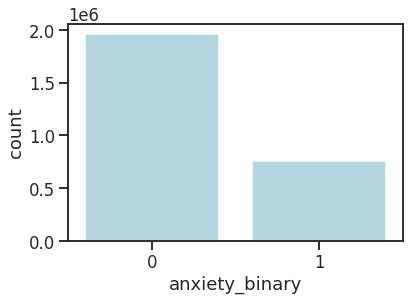

In [ ]:
sns.countplot(x="anxiety_binary", data=machine_data, color="lightblue")
plt.show()

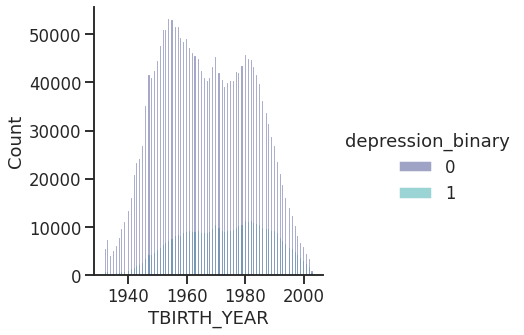

In [ ]:
sns.displot(x="TBIRTH_YEAR", data=machine_data, hue="depression_binary", palette=sns.color_palette("mako", 2))
plt.show()

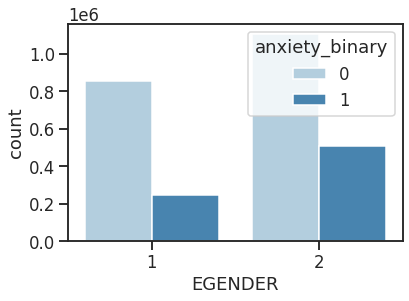

In [ ]:
sns.countplot(x="EGENDER", data=machine_data, palette=sns.color_palette("Blues", 2), hue="anxiety_binary")
plt.show()

In [ ]:
machine_data_anx=machine_data[["DOWN","EST_ST","EGENDER","anxiety_binary","race_recoded","region","generation"]].copy()
machine_data_anx

DOWN  EST_ST  EGENDER  anxiety_binary  race_recoded  region  \
0           1      47        2               1             1       3   
1           4       1        1               1             1       3   
2           1      26        2               0             4       2   
3           4       1        1               1             1       3   
4           2       1        2               0             1       3   
...       ...     ...      ...             ...           ...     ...   
3131699     1      56        1               0             1       4   
3131700     1      46        2               0             1       2   
3131702     3      56        2               0             1       4   
3131703     1      27        2               0             1       2   
3131704     1      56        1               0             1       4   

         generation  
0                 5  
1                 5  
2                 5  
3                 2  
4                 5  
...             ...  
3131699           5  
3131700           5  
3131702           5  
3131703           5  
3131704           5  

[2719868 rows x 7 columns]

In [ ]:
machine_data.groupby("anxiety_binary")["TBIRTH_YEAR"].median()
machine_data.groupby(["anxiety_binary"])["EGENDER"].value_counts()
machine_data["anxiety_binary"].nunique()

2

In [ ]:
Y = machine_data_anx[["anxiety_binary"]]
X = machine_data_anx.loc[:, machine_data_anx.columns != "anxiety_binary"]
X

DOWN  EST_ST  EGENDER  race_recoded  region  generation
0           1      47        2             1       3           5
1           4       1        1             1       3           5
2           1      26        2             4       2           5
3           4       1        1             1       3           2
4           2       1        2             1       3           5
...       ...     ...      ...           ...     ...         ...
3131699     1      56        1             1       4           5
3131700     1      46        2             1       2           5
3131702     3      56        2             1       4           5
3131703     1      27        2             1       2           5
3131704     1      56        1             1       4           5

[2719868 rows x 6 columns]

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=1)

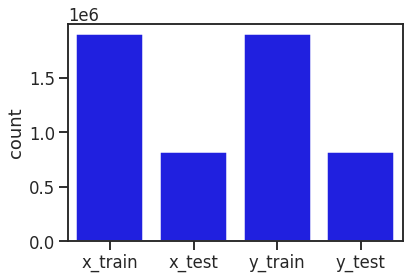

In [ ]:
sns.barplot(x=["x_train", "x_test", "y_train", "y_test"],
            y=[len(x_train), len(x_test), len(y_train), len(y_test)],
           color="blue")
plt.ylabel("count")
plt.show()

In [ ]:
y_test["anxiety_binary"].value_counts(normalize=True)
y_train["anxiety_binary"].value_counts(normalize=True)

0    0.721325
1    0.278675
Name: anxiety_binary, dtype: float64

In [ ]:
logit = LogisticRegression(solver="lbfgs", max_iter=10000)

In [ ]:
x_train.values

array([[ 2, 53,  2,  1,  4,  5],
       [ 1, 51,  2,  1,  3,  5],
       [ 2, 41,  1,  1,  4,  3],
       ...,
       [ 1, 13,  1,  1,  3,  5],
       [ 1, 15,  1,  1,  4,  5],
       [ 2, 35,  2,  1,  4,  5]])

In [ ]:
logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = logit.predict(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

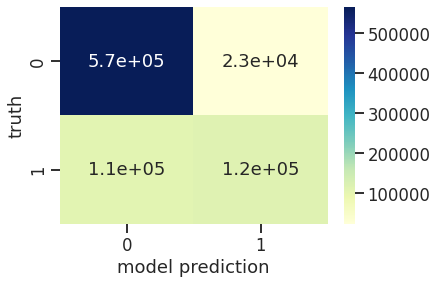

In [ ]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.8367507760787587

## neural network

In [ ]:
Y = machine_data_anx[["anxiety_binary"]].values
X = machine_data_anx.drop("anxiety_binary", axis=1).values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20,  validation_split=0.2, batch_size=32, verbose=1)


Epoch 1/20
47598/47598 [==============================] - 102s 2ms/step - loss: 0.3926 - accuracy: 0.8371 - val_loss: 0.3928 - val_accuracy: 0.8365
Epoch 2/20
47598/47598 [==============================] - 93s 2ms/step - loss: 0.3924 - accuracy: 0.8371 - val_loss: 0.3931 - val_accuracy: 0.8365
Epoch 3/20
47598/47598 [==============================] - 102s 2ms/step - loss: 0.3924 - accuracy: 0.8371 - val_loss: 0.3930 - val_accuracy: 0.8365
Epoch 4/20
47598/47598 [==============================] - 102s 2ms/step - loss: 0.3923 - accuracy: 0.8371 - val_loss: 0.3930 - val_accuracy: 0.8365
Epoch 5/20
47598/47598 [==============================] - 102s 2ms/step - loss: 0.3922 - accuracy: 0.8371 - val_loss: 0.3928 - val_accuracy: 0.8365
Epoch 6/20
47598/47598 [==============================] - 101s 2ms/step - loss: 0.3922 - accuracy: 0.8371 - val_loss: 0.3927 - val_accuracy: 0.8365
Epoch 7/20
47598/47598 [==============================] - 95s 2ms/step - loss: 0.3921 - accuracy: 0.8371 - val_lo

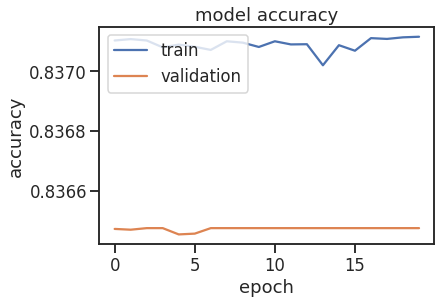

In [ ]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

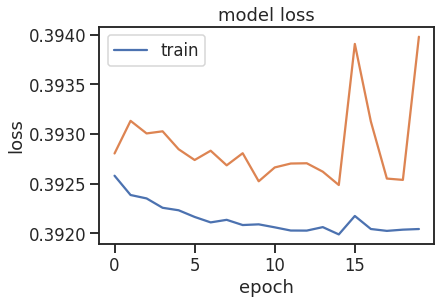

In [ ]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.3941323161125183, 0.8364934325218201]

In [ ]:
predictions = model.predict(x_test)
predictions.round(1)

array([[0. ],
       [0.1],
       [0.3],
       ...,
       [0.1],
       [0.3],
       [0.1]], dtype=float32)

In [ ]:
np.rint(predictions)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(predictions))

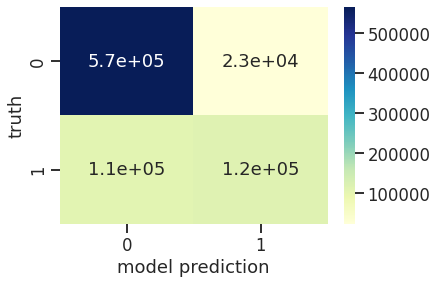

In [ ]:
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [ ]:
!pip install shap


     |████████████████████████████████| 564 kB 17.5 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.KernelExplainer(model.predict, shap.sample(x_train, 100))
shap_values = explainer.shap_values(x_test, nsamples=100)

  0%|          | 0/815961 [00:00<?, ?it/s]

In [ ]:
shap.initjs()

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:],
                pd.DataFrame(x_test).iloc[0,:])

In [ ]:
shap.force_plot(explainer.expected_value[2], shap_values[2], x_test)

In [ ]:
shap.summary_plot(shap_values, X)

## Depression Machine Learning

In [ ]:
machine_data_dep=machine_data[["ANXIOUS","EST_ST","EGENDER","depression_binary","race_recoded","region","generation"]].copy()
machine_data_dep

WEEK  ANXIOUS  EST_ST  EGENDER  depression_binary  race_recoded  \
0           1        4      47        2                  0             1   
1           1        3       1        1                  1             1   
2           1        1      26        2                  0             4   
3           1        4       1        1                  1             1   
4           1        2       1        2                  0             1   
...       ...      ...     ...      ...                ...           ...   
3131699    39        1      56        1                  0             1   
3131700    39        1      46        2                  0             1   
3131702    39        2      56        2                  1             1   
3131703    39        1      27        2                  0             1   
3131704    39        1      56        1                  0             1   

         region  generation  
0             3           5  
1             3           5  
2             2           5  
3             3           2  
4             3           5  
...         ...         ...  
3131699       4           5  
3131700       2           5  
3131702       4           5  
3131703       2           5  
3131704       4           5  

[2719868 rows x 8 columns]

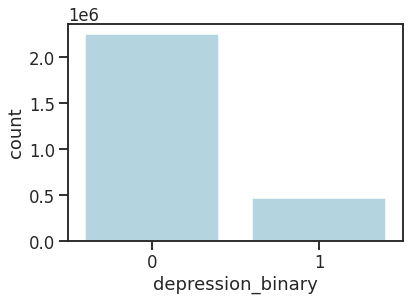

In [ ]:
sns.countplot(x="depression_binary", data=machine_data, color="lightblue")
plt.show()

In [ ]:
Y = machine_data_dep[["depression_binary"]]
X = machine_data_dep.loc[:, machine_data_dep.columns != "depression_binary"]
X

WEEK  ANXIOUS  EST_ST  EGENDER  race_recoded  region  generation
0           1        4      47        2             1       3           5
1           1        3       1        1             1       3           5
2           1        1      26        2             4       2           5
3           1        4       1        1             1       3           2
4           1        2       1        2             1       3           5
...       ...      ...     ...      ...           ...     ...         ...
3131699    39        1      56        1             1       4           5
3131700    39        1      46        2             1       2           5
3131702    39        2      56        2             1       4           5
3131703    39        1      27        2             1       2           5
3131704    39        1      56        1             1       4           5

[2719868 rows x 7 columns]

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=1)


In [ ]:
y_test["depression_binary"].value_counts(normalize=True)
y_train["depression_binary"].value_counts(normalize=True)

0    0.829429
1    0.170571
Name: depression_binary, dtype: float64

In [ ]:
logit = LogisticRegression(solver="lbfgs", max_iter=10000)

In [ ]:
x_train.values

array([[14,  3, 41, ...,  1,  4,  5],
       [ 5,  4, 25, ...,  1,  4,  3],
       [30,  1,  1, ...,  1,  3,  5],
       ...,
       [24,  2, 31, ...,  1,  2,  2],
       [ 9,  4,  6, ...,  5,  4,  5],
       [33,  2, 12, ...,  5,  3,  5]])

In [ ]:
logit.fit(x_train.values, y_train.values.reshape(-1,))

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = logit.predict(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 1, ..., 0, 0, 0])

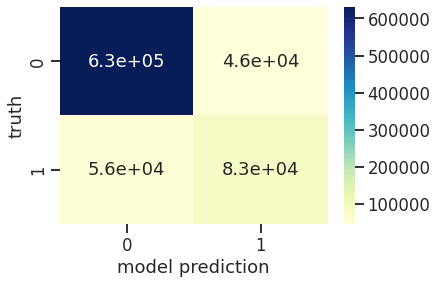

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.8752452629476164

In [ ]:
x_test["true"] = y_test["depression_binary"]
x_test["predicted"] = y_pred

In [ ]:
x_test["correct"] = np.where(x_test["true"] == x_test["predicted"], True, False)

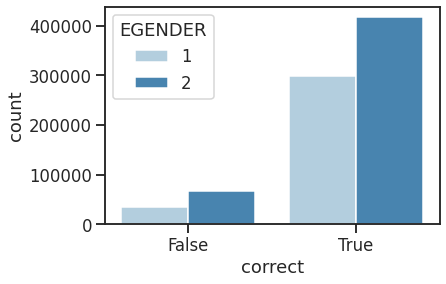

In [ ]:
sns.countplot(x="correct", data=x_test, hue="EGENDER", palette=sns.color_palette("Blues", 2))
plt.show()

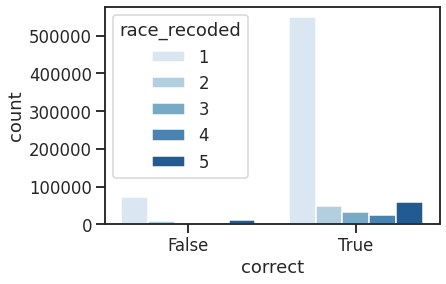

In [ ]:
sns.countplot(x="correct", data=x_test, hue="race_recoded", palette=sns.color_palette("Blues", 5))
plt.show()

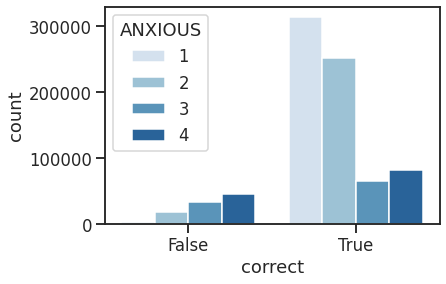

In [ ]:
sns.countplot(x="correct", data=x_test, hue="ANXIOUS", palette=sns.color_palette("Blues", 4))
plt.show()

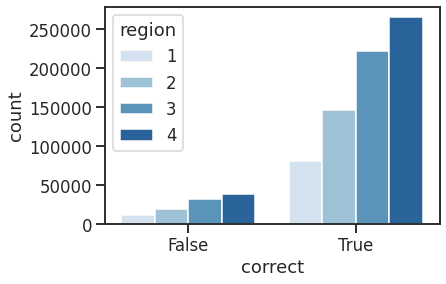

In [ ]:
sns.countplot(x="correct", data=x_test, hue="region", palette=sns.color_palette("Blues", 4))
plt.show()

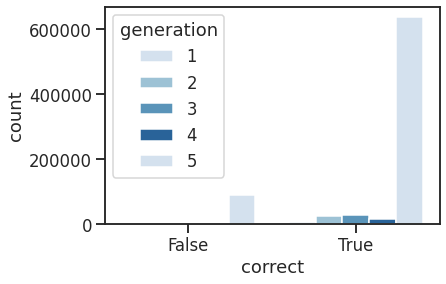

In [ ]:
sns.countplot(x="correct", data=x_test, hue="generation", palette=sns.color_palette("Blues", 4))
plt.show()

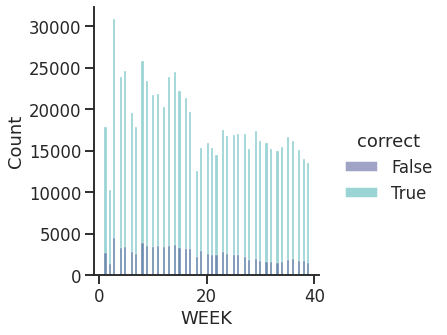

In [ ]:
sns.displot(x="WEEK", hue="correct", data=x_test, palette=sns.color_palette("mako", 2))
plt.show()

dep neural network

In [ ]:
Y = machine_data_dep[["depression_binary"]].values
X = machine_data_dep.drop("depression_binary", axis=1).values
X

array([[ 1,  4, 47, ...,  1,  3,  5],
       [ 1,  3,  1, ...,  1,  3,  5],
       [ 1,  1, 26, ...,  4,  2,  5],
       ...,
       [39,  2, 56, ...,  1,  4,  5],
       [39,  1, 27, ...,  1,  2,  5],
       [39,  1, 56, ...,  1,  4,  5]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=15,  validation_split=0.2, batch_size=10, verbose=1)

Epoch 1/15
54398/54398 [==============================] - 120s 2ms/step - loss: 0.2958 - accuracy: 0.8729 - val_loss: 0.2896 - val_accuracy: 0.8748
Epoch 2/15
54398/54398 [==============================] - 119s 2ms/step - loss: 0.2898 - accuracy: 0.8752 - val_loss: 0.2897 - val_accuracy: 0.8748
Epoch 3/15
54398/54398 [==============================] - 125s 2ms/step - loss: 0.2895 - accuracy: 0.8754 - val_loss: 0.2896 - val_accuracy: 0.8748
Epoch 4/15
54398/54398 [==============================] - 121s 2ms/step - loss: 0.2892 - accuracy: 0.8754 - val_loss: 0.2896 - val_accuracy: 0.8749
Epoch 5/15
54398/54398 [==============================] - 111s 2ms/step - loss: 0.2891 - accuracy: 0.8754 - val_loss: 0.2906 - val_accuracy: 0.8749
Epoch 6/15
54398/54398 [==============================] - 116s 2ms/step - loss: 0.2890 - accuracy: 0.8754 - val_loss: 0.2897 - val_accuracy: 0.8749
Epoch 7/15
54398/54398 [==============================] - 111s 2ms/step - loss: 0.2888 - accuracy: 0.8754 - val_

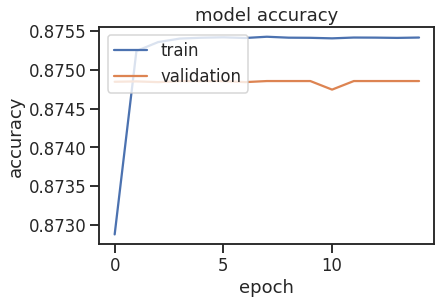

In [ ]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

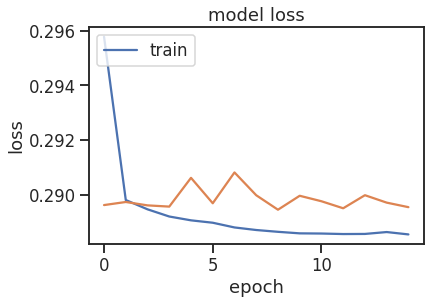

In [ ]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.28853335976600647, 0.8756172060966492]

In [ ]:
predictions = model.predict(x_test)
predictions.round(1)

array([[0.3],
       [0. ],
       [0.7],
       ...,
       [0.1],
       [0.1],
       [0.4]], dtype=float32)

In [ ]:
np.rint(predictions)

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(predictions))

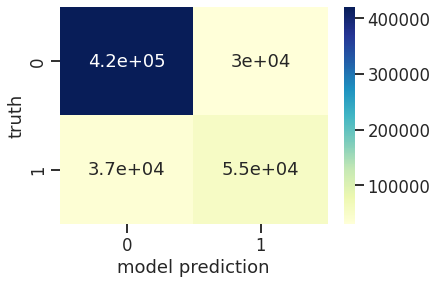

In [ ]:
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()